In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.5'

In [3]:
dataFileName = 'new_daegu_20210712.csv'

In [4]:
tempData = np.loadtxt(dataFileName, delimiter=',')

In [5]:
tempData.shape

(3680, 5)

## 최고, 최저 기온 Top 10 구해보자!!

In [10]:
def getTop10Temp( tData ) :
    highTempTop10 = {}
    lowTempTop10 = {}
    
    for i in range(10) :
        maxTempIndex = np.argmax(tData[:, 4])
        highestTemp =tData[maxTempIndex, 4]
        highestTempDate = tData[maxTempIndex, 0].astype(np.int)
        
        tData = np.delete(tData, maxTempIndex, axis=0) #최고 기온의 데이터 행을 삭제하라
        
        minTempIndex = np.argmin(tData[:, 3])
        lowestTemp = tData[minTempIndex, 3]
        lowestTempDate = tData[minTempIndex, 0].astype(np.int)
        
        tData = np.delete(tData, minTempIndex, axis=0) #최저 기온의 데이터 행을 삭제
        
        highTempTop10[highestTempDate] = highestTemp
        lowTempTop10[lowestTempDate] = lowestTemp
        
    return highTempTop10, lowTempTop10

    

In [11]:
hTempTop10, lTempTop10 = getTop10Temp( tempData )

In [12]:
hTempTop10

{20180727: 39.2,
 20180804: 38.7,
 20180724: 38.6,
 20180720: 38.5,
 20170722: 38.4,
 20150806: 38.3,
 20160813: 38.1,
 20180723: 38.0,
 20180726: 38.0,
 20130812: 37.9}

In [13]:
lTempTop10

{20180127: -13.9,
 20210108: -13.6,
 20160124: -13.0,
 20180126: -13.0,
 20130208: -12.5,
 20120202: -12.4,
 20180125: -12.4,
 20210107: -12.4,
 20180124: -12.3,
 20130104: -11.6}

## 10년간 각 연도별 최고 기온, 최저 기온, 최고 평균 기온, 최저 평균 기온을 구해보세요.

In [14]:
tempData[:, 0] // 10000

array([2011., 2011., 2011., ..., 2021., 2021., 2021.])

In [15]:
for i in range(2011, 2022):
    codition = tempData[: , 0] // 10000 == i

In [16]:
codition

array([False, False, False, ...,  True,  True,  True])

In [17]:
tempData[0, 0]

20110612.0

In [18]:
tempData[0,0] / 10000

2011.0612

In [19]:
tempData[0, 0] // 10000

2011.0

In [20]:
tempData[0,0] // 10000 == 2011

True

In [21]:
tempData[:, 0] // 10000 == 2011

array([ True,  True,  True, ..., False, False, False])

In [22]:
def getYearStatistics(tData) :
    yStat = {}
    for year in range(2011, 2022) : 
        conditionIndex = tData[:, 0] // 10000 == year
        yearData = tData[ conditionIndex ]  # 불리언 인덱싱
        maxTemp = np.max( yearData[ :, 4])
        minTemp = np.min( yearData[ :, 3])
        maxAvgTemp = np.max( yearData[:, 2])
        minAvgTemp = np.min( yearData[:, 2])
        
        yStat[year] = maxTemp, minTemp, maxAvgTemp, minAvgTemp
        
    return yStat    

In [23]:
yStats = getYearStatistics(tempData)

In [24]:
yStats

{2011: (35.5, -6.8, 29.4, -2.8),
 2012: (37.2, -12.4, 32.3, -8.7),
 2013: (37.9, -12.5, 32.9, -7.8),
 2014: (37.5, -7.4, 31.0, -4.7),
 2015: (38.3, -8.9, 31.3, -3.9),
 2016: (38.1, -13.0, 32.4, -10.2),
 2017: (38.4, -10.2, 31.8, -4.8),
 2018: (39.2, -13.9, 33.1, -9.4),
 2019: (36.9, -7.2, 31.6, -2.5),
 2020: (37.0, -10.3, 31.4, -5.6),
 2021: (33.9, -13.6, 27.8, -10.4)}

## 배열 나누기

In [25]:
a = np.arange(24)

In [26]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

# split

In [27]:
np.split(a, 2)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])]

In [28]:
np.split(a, 3)

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15]),
 array([16, 17, 18, 19, 20, 21, 22, 23])]

In [29]:
b = a.reshape(6,-100)

In [30]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [31]:
np.split(b, 2)

[array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]), array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])]

In [32]:
np.split(b, 2, axis = 1)

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13],
        [16, 17],
        [20, 21]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15],
        [18, 19],
        [22, 23]])]

In [33]:
np.hsplit(a, 2) # axis = 0 고정

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])]

In [34]:
np.hsplit(b, 2) # axis = 1

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13],
        [16, 17],
        [20, 21]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15],
        [18, 19],
        [22, 23]])]

In [36]:
np.vsplit(b, 2) # axis = 0

[array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]), array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])]

In [38]:
np.vsplit(b, 3)

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]), array([[16, 17, 18, 19],
        [20, 21, 22, 23]])]

In [40]:
np.split(a, 4)

[array([0, 1, 2, 3, 4, 5]),
 array([ 6,  7,  8,  9, 10, 11]),
 array([12, 13, 14, 15, 16, 17]),
 array([18, 19, 20, 21, 22, 23])]

In [41]:
np.split(a, [3, 5])

[array([0, 1, 2]),
 array([3, 4]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23])]

In [42]:
np.split(a, [3, 6, 9])

[array([0, 1, 2]),
 array([3, 4, 5]),
 array([6, 7, 8]),
 array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])]

## 배열 합치기

In [43]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [44]:
x, y, z = np.split(a, 3)

In [45]:
x

array([0, 1, 2, 3, 4, 5, 6, 7])

In [46]:
y

array([ 8,  9, 10, 11, 12, 13, 14, 15])

In [47]:
z

array([16, 17, 18, 19, 20, 21, 22, 23])

## hstack 


In [49]:
np.hstack( (x, y) )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [50]:
np.vstack( (x,y) )

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

### 난수 생성

In [54]:
np.random.randint(10)

6

In [55]:
for i in range(6):
    print( np.random.randint(1,7) )

2
3
3
5
4
1


In [56]:
np.random.seed(42)

In [57]:
for i in range(6):
    print( np.random.randint(1,7) )

4
5
3
5
5
2


## rand()
0~1 실수값 (1포함하지 않음)

In [58]:
a = np.random.rand( 5, 5 )

In [59]:
a

array([[0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
       [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041]])

## randn()
평균 0,  표준편차가 1

In [60]:
a = np.random.randn( 5, 5 )

In [61]:
a

array([[-1.15099358,  0.37569802, -0.60063869, -0.29169375, -0.60170661],
       [ 1.85227818, -0.01349722, -1.05771093,  0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012, -1.32818605,  0.19686124,  0.73846658],
       [ 0.17136828, -0.11564828, -0.3011037 , -1.47852199, -0.71984421],
       [-0.46063877,  1.05712223,  0.34361829, -1.76304016,  0.32408397]])

In [62]:
a.mean()

-0.278913296666792

In [63]:
a.std()

0.9116303046924518

### PANDAS

In [65]:
import pandas as pd

## Series

1차원 배열 : 여러가지 다른 데이터 타입 가질 수 있음.
리스트, 튜플, 딕셔러니..등등으로 생성이 가능

In [66]:
h = ( 'AA', '2021-07-13', 1234, 3.14159)

In [67]:
type(h)

tuple

In [68]:
s = pd.Series(h)

In [69]:
s

0            AA
1    2021-07-13
2          1234
3       3.14159
dtype: object

In [70]:
type(s)

pandas.core.series.Series

In [71]:
s[0]

'AA'

In [73]:
s[1]

'2021-07-13'

In [74]:
s[3]

3.14159

In [75]:
type(s[0])

str

In [76]:
type(s[2])

int

In [77]:
type(s[3])

float

In [78]:
d = { 'name' : '윤종희', 'id': 202100101, 'grade': 4.3}

In [79]:
d

{'name': '윤종희', 'id': 202100101, 'grade': 4.3}

In [80]:
ds = pd.Series(d)

In [81]:
ds

name           윤종희
id       202100101
grade          4.3
dtype: object

In [82]:
ds['name']

'윤종희'

In [83]:
ds['id']

202100101

In [84]:
ds['grade']

4.3

In [85]:
ds[0]

'윤종희'

In [86]:
ds[2]

4.3

In [87]:
ds[:2]

name          윤종희
id      202100101
dtype: object

In [88]:
h

('AA', '2021-07-13', 1234, 3.14159)

In [89]:
s2 = pd.Series(h, index = [ 'name', 'date', 'score', 'grade'])

In [90]:
s2

name             AA
date     2021-07-13
score          1234
grade       3.14159
dtype: object

In [91]:
s2['score']

1234

In [92]:
s2[ [1,2] ]

date     2021-07-13
score          1234
dtype: object

In [93]:
s2

name             AA
date     2021-07-13
score          1234
grade       3.14159
dtype: object

In [94]:
s2[ [0,2] ]

name       AA
score    1234
dtype: object

In [95]:
s2[ ['name', 'grade']]

name          AA
grade    3.14159
dtype: object

### DataFrame
2차원 배열
: 보통 같은 크기의 리스트를 가진 딕셔러리로부터 생성됨.


In [97]:
data = {
    'name' : ['윤종희', '홍길동', '임꺽정'],
    'birth' : ['2020-01-02', '1880-07-21', '1910-11-02'],
    'point' : [100,90,60],
    'rate' : [1.2, 0.8, 0.6]  
}

In [98]:
df = pd.DataFrame(data)

In [99]:
type(df)

pandas.core.frame.DataFrame

In [100]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

In [101]:
df

name       birth  point  rate
0  윤종희  2020-01-02    100   1.2
1  홍길동  1880-07-21     90   0.8
2  임꺽정  1910-11-02     60   0.6

In [103]:
df['name']

0    윤종희
1    홍길동
2    임꺽정
Name: name, dtype: object

In [104]:
type( df[ 'name' ])

pandas.core.series.Series

In [105]:
df

name       birth  point  rate
0  윤종희  2020-01-02    100   1.2
1  홍길동  1880-07-21     90   0.8
2  임꺽정  1910-11-02     60   0.6

In [106]:
df[ 'addr' ] = '몰라'

In [107]:
df

name       birth  point  rate addr
0  윤종희  2020-01-02    100   1.2   몰라
1  홍길동  1880-07-21     90   0.8   몰라
2  임꺽정  1910-11-02     60   0.6   몰라

In [108]:
df[ 'id' ] = [20200101, 19900203, 20010506]

In [109]:
df

name       birth  point  rate addr        id
0  윤종희  2020-01-02    100   1.2   몰라  20200101
1  홍길동  1880-07-21     90   0.8   몰라  19900203
2  임꺽정  1910-11-02     60   0.6   몰라  20010506

In [110]:
df[ 'id2' ] = 1000

In [111]:
df

name       birth  point  rate addr        id   id2
0  윤종희  2020-01-02    100   1.2   몰라  20200101  1000
1  홍길동  1880-07-21     90   0.8   몰라  19900203  1000
2  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

## 행 인덱스를 변경 (row index)

In [112]:
df.index = ['one', 'two', 'three']

In [113]:
df

name       birth  point  rate addr        id   id2
one    윤종희  2020-01-02    100   1.2   몰라  20200101  1000
two    홍길동  1880-07-21     90   0.8   몰라  19900203  1000
three  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

# 특정 컬럼을 인덱스로 지정하기

In [114]:
df2 = df.set_index( ['id'] )

In [115]:
df2

name       birth  point  rate addr   id2
id                                               
20200101  윤종희  2020-01-02    100   1.2   몰라  1000
19900203  홍길동  1880-07-21     90   0.8   몰라  1000
20010506  임꺽정  1910-11-02     60   0.6   몰라  1000

In [116]:
df

name       birth  point  rate addr        id   id2
one    윤종희  2020-01-02    100   1.2   몰라  20200101  1000
two    홍길동  1880-07-21     90   0.8   몰라  19900203  1000
three  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

In [117]:
df['birth']

one      2020-01-02
two      1880-07-21
three    1910-11-02
Name: birth, dtype: object

In [118]:
df['birth']['two']

'1880-07-21'

In [120]:
df['birth'][0]

'2020-01-02'

# row data를 가져오기

In [121]:
df

name       birth  point  rate addr        id   id2
one    윤종희  2020-01-02    100   1.2   몰라  20200101  1000
two    홍길동  1880-07-21     90   0.8   몰라  19900203  1000
three  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

In [122]:
df.loc['three']

name            임꺽정
birth    1910-11-02
point            60
rate            0.6
addr             몰라
id         20010506
id2            1000
Name: three, dtype: object

In [123]:
type( df.loc['three'])

pandas.core.series.Series

In [124]:
df.loc[ 'three' ]['id']

20010506

In [125]:
df.loc[ 'three', 'id']

20010506

In [126]:
df

name       birth  point  rate addr        id   id2
one    윤종희  2020-01-02    100   1.2   몰라  20200101  1000
two    홍길동  1880-07-21     90   0.8   몰라  19900203  1000
three  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

In [127]:
df['birth']

one      2020-01-02
two      1880-07-21
three    1910-11-02
Name: birth, dtype: object

In [128]:
df.loc[ : , 'birth' ]

one      2020-01-02
two      1880-07-21
three    1910-11-02
Name: birth, dtype: object

In [129]:
df.loc[ 'two': , 'birth']

two      1880-07-21
three    1910-11-02
Name: birth, dtype: object

In [130]:
df.loc[ 'two': ]

name       birth  point  rate addr        id   id2
two    홍길동  1880-07-21     90   0.8   몰라  19900203  1000
three  임꺽정  1910-11-02     60   0.6   몰라  20010506  1000

## 열을 삭제

In [131]:
del df['id2']

In [132]:
df

name       birth  point  rate addr        id
one    윤종희  2020-01-02    100   1.2   몰라  20200101
two    홍길동  1880-07-21     90   0.8   몰라  19900203
three  임꺽정  1910-11-02     60   0.6   몰라  20010506

In [133]:
df.drop( 'addr' , axis=1)

name       birth  point  rate        id
one    윤종희  2020-01-02    100   1.2  20200101
two    홍길동  1880-07-21     90   0.8  19900203
three  임꺽정  1910-11-02     60   0.6  20010506

In [134]:
df

name       birth  point  rate addr        id
one    윤종희  2020-01-02    100   1.2   몰라  20200101
two    홍길동  1880-07-21     90   0.8   몰라  19900203
three  임꺽정  1910-11-02     60   0.6   몰라  20010506

In [135]:
df.drop( 'addr' , axis=1, inplace=True)

In [136]:
df

name       birth  point  rate        id
one    윤종희  2020-01-02    100   1.2  20200101
two    홍길동  1880-07-21     90   0.8  19900203
three  임꺽정  1910-11-02     60   0.6  20010506

## 행 삭제

In [137]:
df.drop( 'two' , axis = 0 )

name       birth  point  rate        id
one    윤종희  2020-01-02    100   1.2  20200101
three  임꺽정  1910-11-02     60   0.6  20010506

In [140]:
df.drop('two', inplace = True)

In [141]:
df

name       birth  point  rate        id
one    윤종희  2020-01-02    100   1.2  20200101
three  임꺽정  1910-11-02     60   0.6  20010506

In [142]:
df.iloc[ 0 ]

name            윤종희
birth    2020-01-02
point           100
rate            1.2
id         20200101
Name: one, dtype: object

In [143]:
df.iloc [ 0:]

name       birth  point  rate        id
one    윤종희  2020-01-02    100   1.2  20200101
three  임꺽정  1910-11-02     60   0.6  20010506

### CSV -> DataFrame

In [145]:
casts = pd.read_csv( 'cast.csv' )

In [146]:
casts

title  year                        name     type  \
0                Closet Monster  2015                    Buffy #1    actor   
1               Suuri illusioni  1985                      Homo $    actor   
2           Battle of the Sexes  2017                     $hutter    actor   
3          Secret in Their Eyes  2015                     $hutter    actor   
4                    Steve Jobs  2015                     $hutter    actor   
...                         ...   ...                         ...      ...   
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
0                      Buffy 4  31.0  
1                       Guests  22.0  
2              Bobby Riggs Fan  10.0  
3              2002 Dodger Fan   NaN  
4      1988 Opera House Patron   NaN  
...                        ...   ...  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   NaN  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   NaN  
75000             Laundry Girl  25.0  

[75001 rows x 6 columns]

In [147]:
len( casts )

75001

In [148]:
casts.head()

title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN

In [149]:
casts.head(15)

title  year  \
0                                      Closet Monster  2015   
1                                     Suuri illusioni  1985   
2                                 Battle of the Sexes  2017   
3                                Secret in Their Eyes  2015   
4                                          Steve Jobs  2015   
5                              Straight Outta Compton  2015   
6                              Straight Outta Compton  2015   
7                                      For Thy Love 2  2009   
8   Lapis, Ballpen at Diploma, a True to Life Journey  2014   
9                                        Desire (III)  2014   
10                            When the Man Went South  2014   
11                            Little Angel (Angelita)  2015   
12                                         Mixing Nia  1998   
13                                   The Replacements  2000   
14                               All Out Dysfunktion!  2016   

                          name   type  \
0                     Buffy #1  actor   
1                       Homo $  actor   
2                      $hutter  actor   
3                      $hutter  actor   
4                      $hutter  actor   
5                      $hutter  actor   
6                      $hutter  actor   
7                 Bee Moe $lim  actor   
8    Jori ' Danilo' Jurado Jr.  actor   
9             Syaiful 'Ariffin  actor   
10          Taipaleti 'Atu'ake  actor   
11  Michael 'babeepower' Viera  actor   
12  Michael 'babeepower' Viera  actor   
13           Steven 'Bear'Boyd  actor   
14       Kirlew 'bliss' Vilbon  actor   

                                  character     n  
0                                   Buffy 4  31.0  
1                                    Guests  22.0  
2                           Bobby Riggs Fan  10.0  
3                           2002 Dodger Fan   NaN  
4                   1988 Opera House Patron   NaN  
5                               Club Patron   NaN  
6                                   Dopeman   NaN  
7                                    Thug 1   NaN  
8                             Jaime (young)   9.0  
9    Actor Playing Eteocles from 'Antigone'   NaN  
10                   Two Palms - Ua'i Paame   8.0  
11                                    Chico   9.0  
12                                   Rapper   NaN  
13  Defensive Tackle - Washington Sentinels   NaN  
14                                    Bliss   NaN

In [150]:
casts.tail()

title  year                        name     type  \
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   NaN  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   NaN  
75000             Laundry Girl  25.0

In [151]:
casts.tail(8)

title  year                        name     type  \
74993       I teliki apopliromi  2013         Mara Anastasopoulou  actress   
74994                180 moires  2010     Penelope Anastasopoulou  actress   
74995          Ama de se thelei  2009     Penelope Anastasopoulou  actress   
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
74993          Marina's friend   NaN  
74994                   Korina   6.0  
74995                  Dimitra   1.0  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   NaN  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   NaN  
75000             Laundry Girl  25.0

In [152]:
titles = pd.read_csv('titles.csv')

In [153]:
len(titles)

50000

In [154]:
titles.tail()

title  year
49995                 Rebel  1970
49996               Suzanne  1996
49997                 Bomba  2013
49998  Aao Jao Ghar Tumhara  1984
49999            Mrs. Munck  1995

In [155]:
t = titles[ 'title' ]

In [156]:
type(t)

pandas.core.series.Series

In [157]:
t

0                 The Rising Son
1        The Thousand Plane Raid
2               Crucea de piatra
3                        Country
4                     Gaiking II
                  ...           
49995                      Rebel
49996                    Suzanne
49997                      Bomba
49998       Aao Jao Ghar Tumhara
49999                 Mrs. Munck
Name: title, Length: 50000, dtype: object

In [158]:
titles.iloc[200:220]

title  year
200                              Fat Girls  2006
201                         Esther's Diary  2010
202                        Paraisong gubat  1986
203                              Una noche  2012
204                           Dust to Dust  1994
205                        Law and Lawless  1932
206                     Prick Up Your Ears  1987
207                           Magic Hour 3  2011
208  Bonjour... Je m'appelle Maxime Renard  2008
209                                  Pater  2011
210                              Dom vetra  2011
211                  Entre chiens et loups  2002
212                           Tierra Santa  1969
213                        Next to No Time  1958
214                               Sky High  2005
215                           Somos novios  1969
216                                Hellyys  1972
217                   Koritsia gia tsibima  1985
218                                Desiree  2015
219                        Sarisin tehlike  1980

# 2000년 이후에 개봉한 영화는??

Boolean indexing : 행을 선택..
Fancy indexing : 열을 선택..

In [159]:
after2000 = titles[  titles['year']>2000   ]

In [160]:
after2000

title  year
4                          Gaiking II  2011
5                         Medusa (IV)  2015
6      The Fresh Air Will Do You Good  2008
8                          L'outsider  2016
9              Do Outro Lado do Mundo  2008
...                               ...   ...
49984          No quiero ser recuerdo  2014
49989                         Vincere  2009
49990                         Junebug  2005
49993                  Corruption.Gov  2010
49997                           Bomba  2013

[22498 rows x 2 columns]

In [161]:
titles['year']

0        1990
1        1969
2        1993
3        2000
4        2011
         ... 
49995    1970
49996    1996
49997    2013
49998    1984
49999    1995
Name: year, Length: 50000, dtype: int64

In [162]:
titles['year']>2000

0        False
1        False
2        False
3        False
4         True
         ...  
49995    False
49996    False
49997     True
49998    False
49999    False
Name: year, Length: 50000, dtype: bool

In [164]:
casts[ ['title', 'n'] ] #fancy indexing

title     n
0                Closet Monster  31.0
1               Suuri illusioni  22.0
2           Battle of the Sexes  10.0
3          Secret in Their Eyes   NaN
4                    Steve Jobs   NaN
...                         ...   ...
74996  Mia fora kai ena... moro  11.0
74997         The Magician King   NaN
74998        Festival of Lights  20.0
74999                Toxic Tutu   NaN
75000           Fugitive Pieces  25.0

[75001 rows x 2 columns]

# 2000년대에 개봉한 영화는? (2000~ 2009)

In [167]:
movies2000 = titles[ (titles['year'] >= 2000) & (titles['year'] <2010) ]

In [168]:
movies2000.shape

(8330, 2)

In [169]:
movies2000

title  year
3                             Country  2000
6      The Fresh Air Will Do You Good  2008
9              Do Outro Lado do Mundo  2008
15                         Panic Room  2002
21                     Passenger Side  2009
...                               ...   ...
49948                            Kuka  2007
49971              Dei gau tin cheung  2001
49980                 Tocatta & Fugue  2007
49989                         Vincere  2009
49990                         Junebug  2005

[8330 rows x 2 columns]

In [171]:
t = titles

In [172]:
t

title  year
0               The Rising Son  1990
1      The Thousand Plane Raid  1969
2             Crucea de piatra  1993
3                      Country  2000
4                   Gaiking II  2011
...                        ...   ...
49995                    Rebel  1970
49996                  Suzanne  1996
49997                    Bomba  2013
49998     Aao Jao Ghar Tumhara  1984
49999               Mrs. Munck  1995

[50000 rows x 2 columns]

In [173]:
macbeth = t[   t['title'] == 'Macbeth'    ]

In [174]:
macbeth

title  year
4226   Macbeth  1913
9322   Macbeth  2006
11722  Macbeth  2013
17166  Macbeth  1997
25847  Macbeth  1998

In [175]:
macbeth.sort_index(ascending=False)

title  year
25847  Macbeth  1998
17166  Macbeth  1997
11722  Macbeth  2013
9322   Macbeth  2006
4226   Macbeth  1913

In [176]:
macbeth.sort_values('year')

title  year
4226   Macbeth  1913
17166  Macbeth  1997
25847  Macbeth  1998
9322   Macbeth  2006
11722  Macbeth  2013

In [177]:
movies2000 = movies2000.sort_values( 'year' )

In [178]:
movies2000.head(20)

title  year
3                      Country  2000
29819    Princes et princesses  2000
29772                  Juliane  2000
29685             The In Crowd  2000
29518  Im Land der Dinosaurier  2000
29514            Chala Bagundi  2000
29353              The 6th Day  2000
4926            Pamptohoi A.E.  2000
29164               Bamboozled  2000
28932          Pane e tulipani  2000
28902             Shadow Loves  2000
28742                    Boxes  2000
9954     StreetPunk: The Movie  2000
28641    Wasurerarenu hitobito  2000
28608                   Kamome  2000
5047                 Sabotage!  2000
5089              Sunset Strip  2000
5092             The Adulterer  2000
28438                 Ley fuga  2000
28299            Jai Maa Durga  2000

In [179]:
movies2000 = movies2000.sort_values( ['year', 'title'] )

In [180]:
movies2000.head(20)

title  year
15011                           $pent  2000
33708     (I'm Living) A Charmed Life  2000
47278                       100 Girls  2000
13551                      12 O'clock  2000
39679                2000 + 1 stigmes  2000
22236   3 Chinesen mit dem Kontrabass  2000
34504                          30 ans  2000
38051                           4 w 1  2000
40731                       451 Forte  2000
5400                        6 auf See  2000
8335   A Christmas Tree and a Wedding  2000
37905          A Chronicle of Corpses  2000
39238                A Floresta Feliz  2000
42805                     A Good Baby  2000
39859                A Matter of Time  2000
42726                 A Piece of Eden  2000
48098               A Rumor of Angels  2000
30204                 A Shot at Glory  2000
12378                A galope tendido  2000
15782                         Aaghaaz  2000

In [181]:
movies2000 = movies2000.sort_values( 'year' , ascending=False )

In [182]:
movies2000

title  year
25646                         homo gamer  2009
41978                         Ha phraeng  2009
18486                        God Is D_ad  2009
40898                  God Send Me a Man  2009
45665                    Godly Decisions  2009
...                                  ...   ...
7305                       Pay the Price  2000
25902        Pau lui ji duet meng ji lui  2000
33567  Party Crasher: My Bloody Birthday  2000
48392                            Party 7  2000
15011                              $pent  2000

[8330 rows x 2 columns]

In [185]:
movies2000.sort_values( ['year', 'title'] , ascending=[False, True] )

title  year
725                           100 Lives  2009
46311  100% lucha, el amo de los clones  2009
49903                12 Meter ohne Kopf  2009
20890       13B: Fear Has a New Address  2009
17190                           14 Days  2009
...                                 ...   ...
8577                            Zhantai  2000
47986                           Zindagi  2000
25018                  Zindagi Zindabad  2000
25013                   Zora la vampira  2000
28192                    Zverinye Voiny  2000

[8330 rows x 2 columns]

In [186]:
casts

title  year                        name     type  \
0                Closet Monster  2015                    Buffy #1    actor   
1               Suuri illusioni  1985                      Homo $    actor   
2           Battle of the Sexes  2017                     $hutter    actor   
3          Secret in Their Eyes  2015                     $hutter    actor   
4                    Steve Jobs  2015                     $hutter    actor   
...                         ...   ...                         ...      ...   
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
0                      Buffy 4  31.0  
1                       Guests  22.0  
2              Bobby Riggs Fan  10.0  
3              2002 Dodger Fan   NaN  
4      1988 Opera House Patron   NaN  
...                        ...   ...  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   NaN  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   NaN  
75000             Laundry Girl  25.0  

[75001 rows x 6 columns]

In [187]:
for index, row in casts.iterrows():
    print( index, ' : ', row['title'],',', row['name'])
    

0  :  Closet Monster , Buffy #1
1  :  Suuri illusioni , Homo $
2  :  Battle of the Sexes , $hutter
3  :  Secret in Their Eyes , $hutter
4  :  Steve Jobs , $hutter
5  :  Straight Outta Compton , $hutter
6  :  Straight Outta Compton , $hutter
7  :  For Thy Love 2 , Bee Moe $lim
8  :  Lapis, Ballpen at Diploma, a True to Life Journey , Jori ' Danilo' Jurado Jr.
9  :  Desire (III) , Syaiful 'Ariffin
10  :  When the Man Went South , Taipaleti 'Atu'ake
11  :  Little Angel (Angelita) , Michael 'babeepower' Viera
12  :  Mixing Nia , Michael 'babeepower' Viera
13  :  The Replacements , Steven 'Bear'Boyd
14  :  All Out Dysfunktion! , Kirlew 'bliss' Vilbon
15  :  Gook , Kirlew 'bliss' Vilbon
16  :  My Song for You , George 'Bootsy' Thomas
17  :  My Song for You , George 'Bootsy' Thomas
18  :  Hustle Beach , Pete 'Boretta' Torres
19  :  Mariano Mison... NBI , Joseph 'Byron' Sese
20  :  Natas es Satan , Ramon 'Cartucho' Pena
21  :  B-Girl , Jesse 'Casper' Brown
22  :  Battle of the Year , Jesse 'Ca

538  :  Veeram , Aaran
539  :  Patton , Abraxas Aaran
540  :  Old Enough , Steve Aaran
541  :  Slapstick (Of Another Kind) , Steve Aaran
542  :  Devadasu , Satyanarayana Aarani
543  :  Ramadasu , Satyanarayana Aarani
544  :  Gatwick Gangsters , Abdelaaziz Aarar
545  :  Haie an Bord , Efisio Aarbus
546  :  Tiger , Frank Aard
547  :  Field of Lost Shoes , Frank J. Aard
548  :  Honeyspider , Frank J. Aard
549  :  Horror Story , Frank J. Aard
550  :  Immortal , Frank J. Aard
551  :  Radioland Murders , Frank J. Aard
552  :  Tiger , Frank J. Aard
553  :  Hage Wars , Brynjar F. Aardal
554  :  Nimed marmortahvlil , Ott Aardam
555  :  Supilinna Salaselts , Ott Aardam
556  :  Flodder , Raymond Aarden
557  :  Hartenstraat , Tomas Aarden
558  :  Woezel & Pip Op zoek naar de Sloddervos! , Rijk Aardse
559  :  Amnesia (II) , James Aardvarck
560  :  Learning Hebrew (A Gothsploitation Movie) , Fritz Aardvark Bragpuss
561  :  The Borrowers , Fritz Aardvark Bragpuss
562  :  The Vampires of Bloody Island

997  :  Women in Revolt , George Abagnalo
998  :  Champion Road: Arena , Balogun Abagunde
999  :  Friction , Armen Abagyan
1000  :  Amorosa: The Revenge , Romeo Edgar Abaigar
1001  :  Bakit 'di totohanin , Silver Abainza
1002  :  Dito sa Pitong Gatang , Silver Abainza
1003  :  Minsan pa: Kahit konting pagtingin Part 2 , Silver Abainza
1004  :  Bakit 'di totohanin , Ver Abainza
1005  :  The Ambassador , Assi Abaiov
1006  :  Carnival of Souls , J.B. Abajian
1007  :  Officer Downe , J.B. Abajian
1008  :  Hope (V) , Soufiane Abajjiou
1009  :  First Day High , Arisjes Abajos
1010  :  Arahet , Vladimir Abajyan
1011  :  Huso astgh , Vladimir Abajyan
1012  :  Lalvari vorskane , Vladimir Abajyan
1013  :  Daratt , Abderamane Abakar
1014  :  Abouna , Mahamat-Saleh Abakar
1015  :  Good Morning, Vietnam , Suvit Abakaz
1016  :  Afanti , Abake
1017  :  Noite Escura , Serguei Abakumov
1018  :  Against the Jab , Sunny Abakwue
1019  :  Honey 2 , Ronnie Abaldonado
1020  :  Batch '81 , Orlan Abaliel
1021 

1498  :  Carson City , Abdullah Abbas
1499  :  Charlie Chan in Rio , Abdullah Abbas
1500  :  Dreamboat , Abdullah Abbas
1501  :  East of Eden , Abdullah Abbas
1502  :  Escape from Zahrain , Abdullah Abbas
1503  :  Fortunes of Captain Blood , Abdullah Abbas
1504  :  Justine , Abdullah Abbas
1505  :  King Richard and the Crusaders , Abdullah Abbas
1506  :  Love Me Forever , Abdullah Abbas
1507  :  Macao , Abdullah Abbas
1508  :  My Favorite Spy , Abdullah Abbas
1509  :  My Favorite Spy , Abdullah Abbas
1510  :  New York Confidential , Abdullah Abbas
1511  :  Sea Devils , Abdullah Abbas
1512  :  Serenade , Abdullah Abbas
1513  :  Sirocco , Abdullah Abbas
1514  :  So Big , Abdullah Abbas
1515  :  Sons of Adventure , Abdullah Abbas
1516  :  Strange Lady in Town , Abdullah Abbas
1517  :  Sunrise at Campobello , Abdullah Abbas
1518  :  The Babe Ruth Story , Abdullah Abbas
1519  :  The Baron of Arizona , Abdullah Abbas
1520  :  The Beautiful Blonde from Bashful Bend , Abdullah Abbas
1521  :  T

2097  :  Thunder in the East , John Abbott
2098  :  Thunder on the Hill , John Abbott
2099  :  Time Out of Mind , John Abbott
2100  :  U-Boat Prisoner , John Abbott
2101  :  Under Secret Orders , John Abbott
2102  :  Who's Minding the Store? , John Abbott
2103  :  Four Weddings and a Funeral , John (II) Abbott
2104  :  Lady Jane , John (II) Abbott
2105  :  Revenge of Billy the Kid , John (II) Abbott
2106  :  The Commissioner , John (II) Abbott
2107  :  The Young Poisoner's Handbook , John (II) Abbott
2108  :  Used Cars , John M. Abbott
2109  :  Enormous Changes at the Last Minute , Joseph Abbott
2110  :  Avengers: Age of Ultron , Joseph M. Abbott
2111  :  Men in Black 3 , Joseph M. Abbott
2112  :  The Dark Knight Rises , Joseph M. Abbott
2113  :  The Great New Wonderful , Joseph M. Abbott
2114  :  The War Within , Joseph M. Abbott
2115  :  Down Sized , Kelsey Abbott
2116  :  The Creepy Doll , Ken Abbott
2117  :  Johnny Appleweed , Kevin (II) Abbott
2118  :  Fear Town, USA , L.A. Abbott

2697  :  Raya Wa Sekina , Hassan Abdin
2698  :  Viva Zalata , Hassan Abdin
2699  :  Lazer Team , Alan Abdine
2700  :  Eye in the Sky , Mohamed Abdirahmaan
2701  :  Play , Anas Abdirahman
2702  :  Captain Phillips , Barkhad Abdirahman
2703  :  Micha , Anthony Abdo
2704  :  The Garden Left Behind , Anthony Abdo
2705  :  The Hudson Tribes , Anthony Abdo
2706  :  My Last Valentine in Beirut in 3D , Aziz Abdo
2707  :  A Thousand and One Nights , Eddie Abdo
2708  :  Ali Baba Goes to Town , Eddie Abdo
2709  :  Four Men and a Prayer , Eddie Abdo
2710  :  Kismet , Eddie Abdo
2711  :  Kismet , Eddie Abdo
2712  :  Lost in a Harem , Eddie Abdo
2713  :  Mr. Moto Takes a Vacation , Eddie Abdo
2714  :  Sinbad, the Sailor , Eddie Abdo
2715  :  Slave Girl , Eddie Abdo
2716  :  Temptation , Eddie Abdo
2717  :  The Conspirators , Eddie Abdo
2718  :  The Fighting Guardsman , Eddie Abdo
2719  :  The Hunchback of Notre Dame , Eddie Abdo
2720  :  The Mummy's Curse , Eddie Abdo
2721  :  The Rains Came , Eddie

3256  :  Mabuta no haha , Kusuo Abe
3257  :  Miyamoto Musashi , Kusuo Abe
3258  :  Miyamoto Musashi , Kusuo Abe
3259  :  Oedo go-nin otoko , Kusuo Abe
3260  :  Onryo sakura dai-sodo , Kusuo Abe
3261  :  Rojingai no kaoyaku , Kusuo Abe
3262  :  Satomi hakken-den , Kusuo Abe
3263  :  Tampopo , Mario Abe
3264  :  Akai nawa: hateru made , Masahiko Abe
3265  :  Ane nikki , Masahiko Abe
3266  :  Itazura Lolita: Ushirokara virgin , Masahiko Abe
3267  :  Shoujo boko jiken: akai kutsu , Masahiko Abe
3268  :  Tenshi no harawata: Akai inga , Masahiko Abe
3269  :  Blue Dream , Matthew Abe
3270  :  Justice on the Border , Matthew Abe
3271  :  The Sunchaser , Matthew Abe
3272  :  Zeiramu 2 , Mitsuo Abe
3273  :  Maruhi honeymoon: boko ressha , Noriaki Abe
3274  :  Rape shot: Momoe no kuchibiru , Noriaki Abe
3275  :  Sukeban mafia: chijoku , Noriaki Abe
3276  :  Ubume no natsu , N?maru Abe
3277  :  Kyojin to gangu , Osamu Abe
3278  :  Solntse , Rokuro Abe
3279  :  009-1: The End of the Beginning , Ry?

3797  :  Minsan lamang magmamahal , Emman Abeleda
3798  :  Puso ng pasko , Emman Abeleda
3799  :  Rubberman , Emman Abeleda
3800  :  El secreto de sus ojos , Alejandro Abelenda
3801  :  La vida de alguien , Francisco Abelenda
3802  :  Dumped! , Daniel Abeles
3803  :  My Last Day Without You , Daniel Abeles
3804  :  Seattle Road , Daniel Abeles
3805  :  Seattle Road , Daniel Abeles
3806  :  Son of Morning , Daniel Abeles
3807  :  You Bury Your Own , Daniel Abeles
3808  :  Begin Again (II) , David Abeles
3809  :  Son of Morning , David Abeles
3810  :  Where God Left His Shoes , David Abeles
3811  :  After Five , Edward Abeles
3812  :  Brewster's Millions , Edward Abeles
3813  :  Brewster's Millions , Edward Abeles
3814  :  Opportunity , Edward Abeles
3815  :  Ready Money , Edward Abeles
3816  :  The House of Mirth , Edward Abeles
3817  :  The Lone Wolf , Edward Abeles
3818  :  The Making of Bobby Burnit , Edward Abeles
3819  :  The Million , Edward Abeles
3820  :  South Bronx Heroes , Jo

4396  :  Poshter Girl , Madhav Abhyankar
4397  :  Surajya , Madhav Abhyankar
4398  :  Vishwavinayak , Madhav Abhyankar
4399  :  Avatarachi Goshta , Sunil Abhyankar
4400  :  Ventilator , Tanvi Abhyankar
4401  :  A Man of Honor , Antoine Abi Akl
4402  :  One Day I'll Leave , Elham Abi Rached
4403  :  Al-Wadi , Fadi Abi Samra
4404  :  Film Kteer Kbeer , Fadi Abi Samra
4405  :  Peur de rien , Fadi Abi Samra
4406  :  Stable Unstable , Fadi Abi Samra
4407  :  Still Burning , Fadi Abi Samra
4408  :  The Ugly One , Fadi Abi Samra
4409  :  Un homme perdu , Fadi Abi Samra
4410  :  Life in America , Habtamu Abi
4411  :  Three Kings , Joseph Abi-Ad
4412  :  Eternity: The Movie , Abe Abi-Loutfi
4413  :  Eternity: The Movie , Joey Abi-Loutfi
4414  :  L'ange de goudron , Kenza Abiabdillah
4415  :  Ambasadori, cautam patrie , Serge Abiad
4416  :  Toutes les filles pleurent , Victor Abiad
4417  :  Altas Expectativas , Felipe Abib
4418  :  Faroeste Caboclo , Felipe Abib
4419  :  Chronicle of a Disappear

4918  :  Kickback , Aziz Aboudrar
4919  :  Harissa mon amour , Amir Abouelkacem
4920  :  Los , Sougaipov Abouezed
4921  :  Fever , Florent Abougit
4922  :  Le gagnant , Gaston Abougit
4923  :  Le pion , Gaston Abougit
4924  :  One, Two, Two: 122, rue de Provence , Gaston Abougit
4925  :  Hope (V) , Youssef Abouh
4926  :  Bratz: Desert Jewelz , Marwan Abouhalka
4927  :  Free Range , Ivan Abouhamra
4928  :  Pure Malice , Jalal Abouhassan
4929  :  The Rocket List , Rasheed Abouhassan
4930  :  100% Arabica , Rachid Abouhilal
4931  :  WWW: What a Wonderful World , Abdallah Abouissaba
4932  :  Damn Foreigners , Mo Aboul-Zelof
4933  :  Grandma , Mo Aboul-Zelof
4934  :  In Time , Mo Aboul-Zelof
4935  :  Western Religion , Mo Aboul-Zelof
4936  :  The Ghastly Love of Johnny X , Khourin Nerses Aboulaboudian
4937  :  Once More , Karny Aboulafia
4938  :  Islamophobia , Mounir Aboulasri
4939  :  Na de Regen , Mounir Aboulasri
4940  :  Out for Vengeance , Mounir Aboulasri
4941  :  Barb Wire , Amir Ab

5496  :  Hitchcock , Jon Abrahams
5497  :  House of Wax , Jon Abrahams
5498  :  Kids , Jon Abrahams
5499  :  Masterminds , Jon Abrahams
5500  :  Meet the Parents , Jon Abrahams
5501  :  Missed Connections (II) , Jon Abrahams
5502  :  My Boss's Daughter , Jon Abrahams
5503  :  Non-Stop , Jon Abrahams
5504  :  Not Since You , Jon Abrahams
5505  :  Outside Providence , Jon Abrahams
5506  :  Prime , Jon Abrahams
5507  :  Room 105 , Jon Abrahams
5508  :  Scary Movie , Jon Abrahams
5509  :  Scenes of the Crime , Jon Abrahams
5510  :  Standing Still (II) , Jon Abrahams
5511  :  Texas Rangers , Jon Abrahams
5512  :  The Faculty , Jon Abrahams
5513  :  The Iron Man , Jon Abrahams
5514  :  The Penthouse , Jon Abrahams
5515  :  They , Jon Abrahams
5516  :  Two for One , Jon Abrahams
5517  :  We Are Your Friends , Jon Abrahams
5518  :  Who Do You Love , Jon Abrahams
5519  :  Desperation Highway , Jonathan Abrahams
5520  :  Spanish Fly , Jonathan Abrahams
5521  :  Whipped , Jonathan Abrahams
5522  

6059  :  My Kontrabida Girl , Aljur Abrenica
6060  :  Nandito ako... Nagmamahal sa 'yo , Aljur Abrenica
6061  :  Sosy Problems , Aljur Abrenica
6062  :  Temptation Island , Aljur Abrenica
6063  :  Cavite , Joven F. Abrenica
6064  :  Extra Service , Vin Abrenica
6065  :  Living Instead , Joey Abrenilla
6066  :  Boundary , Conrado Abrenzosa
6067  :  Radio Romance , Paolo Abrera
6068  :  Sabado Nights , Paolo Abrera
6069  :  Al Sur de la Inocencia , Christopher Abreu Lyons
6070  :  O Menino da Porteira , Adair Luiz de Abreu
6071  :  A Noite do Chupacabras , Afonso (II) Abreu
6072  :  En la puta vida , Agust?n Abreu
6073  :  Cidade dos Homens , Aldene Abreu
6074  :  Vengeance , Alexis Abreu
6075  :  La Botija: El Destino Inesperado , Alvin Abreu
6076  :  The Fever and the Fret , Alyssa Abreu
6077  :  The Last Intervention , Alyssa Abreu
6078  :  O Menino e o Mundo , Al? Abreu
6079  :  La Seixy , Anderson Abreu
6080  :  Breakup at a Wedding , Cesar Abreu
6081  :  Clank: Legacy , Daniel Abre

6506  :  I Do Bidoo Bidoo: Heto nApo sila! , Jeffrey Abuan
6507  :  Bolo gaseirneba , Kakha Abuashvili
6508  :  Konpliktis zona , Kakha Abuashvili
6509  :  The Forgotten King , Kakha (II) Abuashvili
6510  :  Apocalypse Will Not Happen , Vazha Abuashvili
6511  :  Me'Ahorei Hasoragim , Avi Abuav
6512  :  Ghostlight , Earnest Abuba
6513  :  Article 99 , Ernest Abuba
6514  :  Call Me , Ernest Abuba
6515  :  Forever, Lulu , Ernest Abuba
6516  :  Hamlet, Prince of Denmark , Ernest Abuba
6517  :  King of New York , Ernest Abuba
6518  :  Twelve Monkeys , Ernest Abuba
6519  :  Karachi , Ahmed Abubaia
6520  :  About Time , Abdillahi Abubakar
6521  :  Victor Frankenstein , Abdillahi Abubakar
6522  :  Okafor's Law , Halimar Abubakar
6523  :  Darogaji , Abubaker
6524  :  Staying Alive , Salim Abubaker
6525  :  Keli , Abubakkar
6526  :  Parvathi , Abubakkar
6527  :  Sallapam , Abubakkar
6528  :  Vatsalyam , Abubakkar
6529  :  Everything Moves Alone , James Abucewicz
6530  :  Gallery of Fear , Antoni

7096  :  The Incurables , Kirk Acevedo
7097  :  The New World , Kirk Acevedo
7098  :  The Thin Red Line , Kirk Acevedo
7099  :  The Visit , Kirk Acevedo
7100  :  Susanna , Lloren? Acevedo
7101  :  Marian , Manuel Mikey Acevedo
7102  :  The Last Rezort , Manuel Mikey Acevedo
7103  :  Vamp Bikers , Manuel Mikey Acevedo
7104  :  Vamp Bikers Dos , Manuel Mikey Acevedo
7105  :  Vamp Bikers Tres , Manuel Mikey Acevedo
7106  :  Stand Clear of the Closing Doors , Marin L. Acevedo
7107  :  Saving Melanie , Martin Acevedo
7108  :  Dumped! , Mathew Acevedo
7109  :  The Children of Hip Hop , Mike Acevedo
7110  :  Don't Let Me Drown , Mois?s (II) Acevedo
7111  :  Remember Me , Mois?s (II) Acevedo
7112  :  The Brave One , Mois?s (II) Acevedo
7113  :  Three from the Block , Mois?s (II) Acevedo
7114  :  Los Super , Nino Acevedo
7115  :  La voz dormida , Paco Acevedo
7116  :  Infiltration , Philip Acevedo
7117  :  60 Seconds 2 Die: 60 Seconds to Die 2 , Richie Acevedo
7118  :  60 Seconds 2 Die: 60 Seco

7696  :  In Your Eyes , Brett Ackerman
7697  :  Friends for Life , Bruce (II) Ackerman
7698  :  Lifeform , Chad Ackerman
7699  :  Terror Vortex , Chad (II) Ackerman
7700  :  Zombie Spoof , Chad (IV) Ackerman
7701  :  Zombies of the Living Dead , Chase Ackerman
7702  :  Elektra , Chris Ackerman
7703  :  Making Change , Chris Ackerman
7704  :  #FromJennifer , Christian Ackerman
7705  :  2 Jennifer , Christian Ackerman
7706  :  Restoration , Christian Ackerman
7707  :  Serena Waits , Christian Ackerman
7708  :  SpaceDisco One , Christian Ackerman
7709  :  23 Lies , Christian (II) Ackerman
7710  :  G.R. , Christian (II) Ackerman
7711  :  Saving for the Day , Christian (II) Ackerman
7712  :  Saving for the Day , Christian (II) Ackerman
7713  :  Terror Vortex , Christian (II) Ackerman
7714  :  Virtual 3000 , Christian (II) Ackerman
7715  :  Virtual 3000 , Christian (II) Ackerman
7716  :  Virtual 3000 , Christian (II) Ackerman
7717  :  Wisconsin Project X , Christian (II) Ackerman
7718  :  Zo

8277  :  Birth of a Warrior , Alex (IV) Acosta
8278  :  Convict , Alex (IV) Acosta
8279  :  Dance Academy: The Movie , Alex (IV) Acosta
8280  :  Dead Moon Circus Part 2 , Alex (IV) Acosta
8281  :  Dead Moon Circus Part 2 , Alex (IV) Acosta
8282  :  Missing Water , Alex (IV) Acosta
8283  :  Mother Fish , Alex (IV) Acosta
8284  :  Newton's 3rd Law , Alex (IV) Acosta
8285  :  Silent Eyes , Alex (IV) Acosta
8286  :  Suing the Devil , Alex (IV) Acosta
8287  :  The Challenge Letter , Alex (IV) Acosta
8288  :  Dead Moon Circus , Alex (VII) Acosta
8289  :  Refuge (II) , Alex (VII) Acosta
8290  :  Capps Crossing , Alex (VIII) Acosta
8291  :  Ronin Conurbano , Alex (XV) Acosta
8292  :  Ronin Conurbano , Alex (XV) Acosta
8293  :  Ronin Conurbano , Alex (XV) Acosta
8294  :  Ronin Conurbano , Alex (XV) Acosta
8295  :  Dark Feed , Alexei Acosta
8296  :  Heavy Makeup , Andrew Acosta
8297  :  The Cloth , Anthony (II) Acosta
8298  :  Ponchao , Anthony (III) Acosta
8299  :  7 cajas , An?bal (II) Acosta


8849  :  Lo sceicco bianco , Antonio Acqua
8850  :  Lo smemorato di Collegno , Antonio Acqua
8851  :  Madri pericolose , Antonio Acqua
8852  :  Mondo pazzo... gente matta! , Antonio Acqua
8853  :  Signore & signori , Antonio Acqua
8854  :  Un maledetto imbroglio , Antonio Acqua
8855  :  Most of My Memoirs Are Plagiarized , John Acquadro
8856  :  Get Gone , Bertram Acquah
8857  :  Alibi perfetto , Francesco Acquaroli
8858  :  Arance & martello , Francesco Acquaroli
8859  :  Come il vento , Francesco Acquaroli
8860  :  Diaz - Don't Clean Up This Blood , Francesco Acquaroli
8861  :  Era d'estate , Francesco Acquaroli
8862  :  Gli ultimi saranno ultimi , Francesco Acquaroli
8863  :  Hope Lost , Francesco Acquaroli
8864  :  Pasolini , Francesco Acquaroli
8865  :  Short Skin - I dolori del giovane Edo , Francesco Acquaroli
8866  :  Smetto quando voglio , Francesco Acquaroli
8867  :  Teste rasate , Francesco Acquaroli
8868  :  Genova , Andrea Acquarone
8869  :  Flow , Francis Acquas
8870  :  

9396  :  Bridget Jones's Baby , Lee Adach
9397  :  Film Stars Don't Die in Liverpool , Lee Adach
9398  :  Housefull 3 , Lee Adach
9399  :  King Arthur: Legend of the Sword , Lee Adach
9400  :  The Huntsman: Winter's War , Lee Adach
9401  :  Gatwick Gangsters , Michael Adach
9402  :  Yogen , Gaku Adachi
9403  :  Detective Story (II) , Hiroshi (VI) Adachi
9404  :  American Pastime , K.J. Adachi
9405  :  Down and Derby , K.J. Adachi
9406  :  Judai no seiten '75 , Kiyoyasu Adachi
9407  :  Kinjirareta taiken , Kiyoyasu Adachi
9408  :  Maruhi ama Report: monzetsu , Kiyoyasu Adachi
9409  :  Tokyo eros senya ichiya , Kiyoyasu Adachi
9410  :  Kaette kita yopparai , Masao Adachi
9411  :  The Ugly One , Masao Adachi
9412  :  Into the Sun , Naoto Adachi
9413  :  Rasen , Naoto Adachi
9414  :  Tennis no oujisama , Osamu Adachi
9415  :  Gekijouban Tiger & Bunny: The Beginning , Takahide Adachi
9416  :  Reines d'un jour , Takeo Adachi
9417  :  Treasure: In Search of the Golden Horse , Yasumasa Adachi


9995  :  Helter Skelter , Ronald Adam
9996  :  Hindle Wakes , Ronald Adam
9997  :  Inspector Hornleigh , Ronald Adam
9998  :  Johnny on the Spot , Ronald Adam
9999  :  Journey Together , Ronald Adam
10000  :  Kate Plus Ten , Ronald Adam
10001  :  Kill Me Tomorrow , Ronald Adam
10002  :  L'amour en question , Ronald Adam
10003  :  Laughter in Paradise , Ronald Adam
10004  :  Luck of the Navy , Ronald Adam
10005  :  Lust for Life , Ronald Adam
10006  :  Malta Story , Ronald Adam
10007  :  Meet Maxwell Archer , Ronald Adam
10008  :  Mr. Denning Drives North , Ronald Adam
10009  :  My Daughter Joy , Ronald Adam
10010  :  My Wife's Lodger , Ronald Adam
10011  :  Obsession , Ronald Adam
10012  :  Offbeat , Ronald Adam
10013  :  Pink String and Sealing Wax , Ronald Adam
10014  :  Please Turn Over , Ronald Adam
10015  :  Postman's Knock , Ronald Adam
10016  :  Private's Progress , Ronald Adam
10017  :  Q Planes , Ronald Adam
10018  :  Reach for the Sky , Ronald Adam
10019  :  Satan Never Sleep

10537  :  Beyond Desire , Brandon Quintin Adams
10538  :  D2: The Mighty Ducks , Brandon Quintin Adams
10539  :  Ghost in the Machine , Brandon Quintin Adams
10540  :  MacArthur Park , Brandon Quintin Adams
10541  :  Moonwalker , Brandon Quintin Adams
10542  :  The Mighty Ducks , Brandon Quintin Adams
10543  :  The People Under the Stairs , Brandon Quintin Adams
10544  :  The Sandlot , Brandon Quintin Adams
10545  :  Ambition's Debt , Brandt Adams
10546  :  Mutual Friends , Brandt Adams
10547  :  Dolly Dearest , Brass Adams
10548  :  F.I.S.T , Brass Adams
10549  :  Fighting Back , Brass Adams
10550  :  Hard to Hold , Brass Adams
10551  :  Romantic Comedy , Brass Adams
10552  :  The Happy Hooker Goes to Washington , Brass Adams
10553  :  The In-Laws , Brass Adams
10554  :  The Man Who Saw Tomorrow , Brass Adams
10555  :  Zombie High , Brass Adams
10556  :  Cost of Living , Brett C. Adams
10557  :  Death of a Soldier , Brian Adams
10558  :  Howling III , Brian Adams
10559  :  Les Patters

11081  :  Sagebrush Law , Ernie Adams
11082  :  San Quentin , Ernie Adams
11083  :  San Quentin , Ernie Adams
11084  :  Sea Raiders , Ernie Adams
11085  :  Shadow Ranch , Ernie Adams
11086  :  Shadowed , Ernie Adams
11087  :  She Done Him Wrong , Ernie Adams
11088  :  She Has What It Takes , Ernie Adams
11089  :  She Married Her Boss , Ernie Adams
11090  :  Silver Dollar , Ernie Adams
11091  :  Smash-Up: The Story of a Woman , Ernie Adams
11092  :  So This Is Love? , Ernie Adams
11093  :  Son of Zorro , Ernie Adams
11094  :  Song of the Buckaroo , Ernie Adams
11095  :  Speedy , Ernie Adams
11096  :  Springtime for Henry , Ernie Adams
11097  :  Square Shooter , Ernie Adams
11098  :  St. Louis Blues , Ernie Adams
11099  :  Stagecoach Buckaroo , Ernie Adams
11100  :  Stagecoach Days , Ernie Adams
11101  :  Stand By All Networks , Ernie Adams
11102  :  Stars Over Arizona , Ernie Adams
11103  :  Stool Pigeon , Ernie Adams
11104  :  Street of Memories , Ernie Adams
11105  :  Sundown on the P

11449  :  Cockneys vs Zombies , James (II) Adams
11450  :  Hold , James (XII) Adams
11451  :  The Imagemaker , James S. (II) Adams
11452  :  Confessions of a Shopaholic , January Adams
11453  :  Date Night , January Adams
11454  :  Men in Black 3 , January Adams
11455  :  No Strings Attached , January Adams
11456  :  Precious (II) , January Adams
11457  :  Wall Street: Money Never Sleeps , January Adams
11458  :  1 2 3 , Jared Adams
11459  :  Punchcard Player , Jared Adams
11460  :  Funeral Day , Jared (IV) Adams
11461  :  GirlHouse , Jaron Adams
11462  :  Jimmy Vestvood: Amerikan Hero , Jaron Adams
11463  :  JOB's Daughter , Jaron Adams
11464  :  Underdog Kids , Jaron Adams
11465  :  Mr. North , Jason (IV) Adams
11466  :  Always Something Better , Jason (VI) Adams
11467  :  Horrors of War , Jason (VIII) Adams
11468  :  I Still Have Joy , Jason (XII) Adams
11469  :  Taking Out the Trash , Jason (XIV) Adams
11470  :  Approaching Midnight , Jason (XXII) Adams
11471  :  Lowlands , Jason (

11924  :  Greetings from the Shore , Mitchell S. Adams
11925  :  To Be King , Murray Adams
11926  :  The Final Sanction , N.Q. Adams
11927  :  Destination: Rad City , Natasha (III) Adams
11928  :  If... Dog... Rabbit , Nate Adams
11929  :  Noah's Arc , Nate Adams
11930  :  Super Fly , Nate Adams
11931  :  A Murder of Crows , Nate (III) Adams
11932  :  Operation Balikatan , Nate (III) Adams
11933  :  When Eagles Strike , Nate (III) Adams
11934  :  Crusty Demons 12: Dirty Dozen , Nate (IV) Adams
11935  :  Leave It on the Floor , Nate (VI) Adams
11936  :  Soul Men , Nathan (II) Adams
11937  :  Bad City , Nathan (VI) Adams
11938  :  Stomp the Yard , Nathan (VII) Adams
11939  :  Stomp the Yard 2: Homecoming , Nathan (VIII) Adams
11940  :  Slayer , Nathaniel Adams
11941  :  Welcome to the Show , Nathaniel Adams
11942  :  Drive-Through: The Story Movie , Neal Adams
11943  :  Tash Force , Neil (VIII) Adams
11944  :  The Eschatrilogy: Book of the Dead , Neil (VIII) Adams
11945  :  Rollergator ,

12495  :  King of the Stallions , Ted Adams
12496  :  Law and Order , Ted Adams
12497  :  Law and Order , Ted Adams
12498  :  Law of the Panhandle , Ted Adams
12499  :  Lawless Border , Ted Adams
12500  :  Lawless Land , Ted Adams
12501  :  Lightning Carson Rides Again , Ted Adams
12502  :  Lost Planet Airmen , Ted Adams
12503  :  Malay Nights , Ted Adams
12504  :  Man of Action , Ted Adams
12505  :  Mesquite Buckaroo , Ted Adams
12506  :  Navajo Trail Raiders , Ted Adams
12507  :  Night Riders of Montana , Ted Adams
12508  :  Outlaw Country , Ted Adams
12509  :  Outlaws of Boulder Pass , Ted Adams
12510  :  Outlaws' Paradise , Ted Adams
12511  :  Overland Stagecoach , Ted Adams
12512  :  Overland Trails , Ted Adams
12513  :  Pals of the Saddle , Ted Adams
12514  :  Paroled from the Big House , Ted Adams
12515  :  Perils of the Royal Mounted , Ted Adams
12516  :  Phantom Rancher , Ted Adams
12517  :  Pinto Canyon , Ted Adams
12518  :  Pioneer Days , Ted Adams
12519  :  Port of Hate , T

12995  :  Devil's Playground , Sam (II) Adamson
12996  :  The Random Factor , Scott Adamson
12997  :  Max Payne , Spike Adamson
12998  :  Nothing Really Matters , Spike Adamson
12999  :  Hanging , Stephen Adamson
13000  :  Ripper , Stuart (II) Adamson
13001  :  Manic , Swede Adamson
13002  :  House of Wax , Thomas Adamson
13003  :  Forrest Gump , Todd (II) Adamson
13004  :  Shelf Life , Troy Adamson
13005  :  Touched by a Killer , Troy Adamson
13006  :  A Big Hand for the Little Lady , Victor Adamson
13007  :  A Lawless Street , Victor Adamson
13008  :  A Lion Is in the Streets , Victor Adamson
13009  :  Adventures of Texas Jack , Victor Adamson
13010  :  Al Jennings of Oklahoma , Victor Adamson
13011  :  Ambush Valley , Victor Adamson
13012  :  Arizona , Victor Adamson
13013  :  Arizona Stage Coach , Victor Adamson
13014  :  Arizona Trails , Victor Adamson
13015  :  Battle of Rogue River , Victor Adamson
13016  :  Battle of Rogue River , Victor Adamson
13017  :  Bend of the River , Vi

13470  :  Le siffleur , Karim Adda
13471  :  Mineurs 27 , Karim Adda
13472  :  Don (II) , Ilias Addab
13473  :  Doodslag , Ilias Addab
13474  :  Dunya & Desie , Ilias Addab
13475  :  Kicks , Ilias Addab
13476  :  Layla M. , Ilias Addab
13477  :  Time Will Tell , Ilias Addab
13478  :  Forbrydelsens element , Duke Addabayo
13479  :  A Place Called Truth , Anthony Addabbo
13480  :  Black Sea 213 , Anthony Addabbo
13481  :  My One and Only , Anthony Addabbo
13482  :  Who Killed Buddy Blue? , Anthony Addabbo
13483  :  Project Ryan , Joe Addabbo
13484  :  Susanna , Hassan Addahri
13485  :  The Red Effect , Rachel Addai
13486  :  Pei an dong ni du guo man chang sui yue , Newnest Addakula
13487  :  Mon roi , Abdelghani Addala
13488  :  Tracklist the Movie , Stefano Addamo
13489  :  Scab , Andrew Addams
13490  :  The Old Dark House , Charles Addams
13491  :  Use Your Head , Craig Addams
13492  :  L'avventura , James Addams
13493  :  Phantasmagoria , Michel Addams
13494  :  Bhoja Kalidasa , Srir

13967  :  Lake House , Tunde (II) Adeleye
13968  :  Heiraten verboten , Georg Adelgeis
13969  :  Punch the Clock , Gary Adelhelm
13970  :  Good Vibrations , Pierre Adeli
13971  :  Jimmy Vestvood: Amerikan Hero , Pierre Adeli
13972  :  Problem of Evil , Pierre Adeli
13973  :  Sweet Karma 2 , Pierre Adeli
13974  :  Escape from Zahrain , Sadik Amir Adeli
13975  :  Buisson ardent , Jean-Claude Adelin
13976  :  Chocolat , Jean-Claude Adelin
13977  :  Dandin , Jean-Claude Adelin
13978  :  Le lieu du crime , Jean-Claude Adelin
13979  :  Le plus beau pays du monde , Jean-Claude Adelin
13980  :  Les braqueuses , Jean-Claude Adelin
13981  :  Mi nombre es sombra , Jean-Claude Adelin
13982  :  Mi nombre es sombra , Jean-Claude Adelin
13983  :  Monsieur , Jean-Claude Adelin
13984  :  Oostende , Jean-Claude Adelin
13985  :  The Tourist , Jean-Claude Adelin
13986  :  La tourneuse de pages , Karim Adelis
13987  :  Droppin' , Mike Adeliuk
13988  :  Knock on Wood , Mike Adeliuk
13989  :  Fuzz Track City

14373  :  Flashdrive , Gerard Adimando
14374  :  Get Rich or Die Tryin' , Gerard Adimando
14375  :  Julie & Julia , Gerard Adimando
14376  :  Lyco , Gerard Adimando
14377  :  Mack Hanglider , Gerard Adimando
14378  :  Mom , Gerard Adimando
14379  :  Plasterhead , Gerard Adimando
14380  :  Sex, Blood and Fairy Tales , Gerard Adimando
14381  :  The Prey , Gerard Adimando
14382  :  Twists of Fate , Gerard Adimando
14383  :  Where Hearts Lie , Gerard Adimando
14384  :  Jeffie Was Here , Lawrence Adimora
14385  :  The Final Song , Lawrence Adimora
14386  :  The Red House (II) , Lawrence Adimora
14387  :  Electrick Children , Andrew Adin
14388  :  Aviva Ahuvati , Dekel Adin
14389  :  Mabul , Dekel Adin
14390  :  Electrick Children , Donald Adin
14391  :  Malli Pelli , Adinarayanaiah
14392  :  Little Girl... Big Tease , Joey Adinaro
14393  :  This Thing of Ours , Alket Adini
14394  :  Dealing with Destiny , William Adinkwuye
14395  :  Stalking Eva , Alex Adinolfi
14396  :  Grand Hotel Excelsi

14830  :  Curse of the Undead , Jay Adler
14831  :  Dime with a Halo , Jay Adler
14832  :  Down Three Dark Streets , Jay Adler
14833  :  Dreamboat , Jay Adler
14834  :  Grave of the Vampire , Jay Adler
14835  :  Hell on Devil's Island , Jay Adler
14836  :  Illegal , Jay Adler
14837  :  Love Me or Leave Me , Jay Adler
14838  :  Lucy Gallant , Jay Adler
14839  :  Lust for Life , Jay Adler
14840  :  Macon County Line , Jay Adler
14841  :  Man with the Gun , Jay Adler
14842  :  Murder in Soho , Jay Adler
14843  :  Murder Is My Beat , Jay Adler
14844  :  My Man and I , Jay Adler
14845  :  My Pal Gus , Jay Adler
14846  :  My Six Convicts , Jay Adler
14847  :  No Time to Marry , Jay Adler
14848  :  Penrod and His Twin Brother , Jay Adler
14849  :  Runaway Daughters , Jay Adler
14850  :  Saddle the Wind , Jay Adler
14851  :  Scandal Sheet , Jay Adler
14852  :  Seven Guns to Mesa , Jay Adler
14853  :  Sweet Smell of Success , Jay Adler
14854  :  The Bad and the Beautiful , Jay Adler
14855  :  T

15377  :  Muzhskoye leto , Regimantas Adomaitis
15378  :  Niekas nenorejo mirti , Regimantas Adomaitis
15379  :  Poloska neskoshennych dikikh tsvetov , Regimantas Adomaitis
15380  :  Saduto tuto , Regimantas Adomaitis
15381  :  Sergey Lazo , Regimantas Adomaitis
15382  :  Skrydis per Atlanta , Regimantas Adomaitis
15383  :  Sodybu tustejimo metas , Regimantas Adomaitis
15384  :  Suaugusiu zmoniu zaidimai , Regimantas Adomaitis
15385  :  Velnio nuotaka , Regimantas Adomaitis
15386  :  Visa teisybe apie Kolumba , Regimantas Adomaitis
15387  :  Vostochny koridor , Regimantas Adomaitis
15388  :  Vragi , Regimantas Adomaitis
15389  :  Yuliya Vrevskaya , Regimantas Adomaitis
15390  :  The Mother of Invention , Luke Adomanis
15391  :  Brando Unauthorized , Daniel Adomian
15392  :  Collective: Unconscious , James Adomian
15393  :  Freak Dance , James Adomian
15394  :  Freak Dance , James Adomian
15395  :  Freak Dance , James Adomian
15396  :  Harold & Kumar Escape from Guantanamo Bay , James A

15927  :  The Stray , Adam Advany
15928  :  Spirit Warriors: The Shortcut , J.R. Adveda?o
15929  :  In Till You Die , Mike Advensky
15930  :  Fearless , Janelle Adviento
15931  :  A Melody in the Haunted , Advik
15932  :  Angels , Andrew Advincula
15933  :  Ataul: For Rent , Chris Advincula
15934  :  Dog Tag: Katarungan sa aking kamay , Jerome Advincula
15935  :  Jaime Labrador: Sakristan mayor , Jerome Advincula
15936  :  Kidlat ng Maynila: Joe Pring 2 , Jerome Advincula
15937  :  Kung patatawarin ka ng bala ko! , Jerome Advincula
15938  :  Lagalag: The Eddie Fernandez Story , Jerome Advincula
15939  :  Lucio Margallo , Jerome Advincula
15940  :  Mabuting kaibigan masamang kaaway , Jerome Advincula
15941  :  Masahol pa sa hayop , Jerome Advincula
15942  :  Nagkataon... Nagkatagpo , Jerome Advincula
15943  :  Sagad hanggang buto , Jerome Advincula
15944  :  Tondo: Libingan ng mga siga , Jerome Advincula
15945  :  Alyas Pogi 2 , Jun Advincula
15946  :  The Zero Sum , Tom Advocaat
15947 

16500  :  Barra Pesada , Banzo Africano
16501  :  O Roubo das Calcinhas , Banzo Africano
16502  :  Parceiros da Aventura , Banzo Africano
16503  :  Salve-se Quem Puder , Banzo Africano
16504  :  I soliti ignoti vent'anni dopo , Pasquale Africano
16505  :  Il muro di gomma , Pasquale Africano
16506  :  Maledetto il giorno che t'ho incontrato , Pasquale Africano
16507  :  Split Wide Open , Monty Africawalla
16508  :  Son of a Lion , Baktiyar Ahmed Afridi
16509  :  Son of a Lion , Mubasir Afridi
16510  :  Narco Dollar , Peter Afridi
16511  :  Bajrangi Bhaijaan , Shahid Afridi
16512  :  D-Day , Shahid Afridi
16513  :  Main Hoon Shahid Afridi , Shahid Afridi
16514  :  Kajaki , Zudair Afridi
16515  :  The Last King of Scotland , Afrigo Band
16516  :  About Those Two... , Ashley Afrikaner
16517  :  Morenga , Frederik Afrikaner
16518  :  10,000 BC , Steven Afrikaner
16519  :  S Rozhdestvom! , Alik Afrikyan
16520  :  S Rozhdestvom! , Arsen Afrikyan
16521  :  Unknown Love , Samia Afrin
16522  : 

17094  :  Society , Robin Agee
17095  :  The Skeleton Key , Stafford Agee
17096  :  Abby in the Summer , Steve Agee
17097  :  Amigo Undead , Steve Agee
17098  :  Angry White Man , Steve Agee
17099  :  Dark Was the Night , Steve Agee
17100  :  Dealin' with Idiots , Steve Agee
17101  :  Dementia , Steve Agee
17102  :  Digging Up the Marrow , Steve Agee
17103  :  God Bless America , Steve Agee
17104  :  Guardians of the Galaxy Vol. 2 , Steve Agee
17105  :  Heartland , Steve Agee
17106  :  Hit and Run , Steve Agee
17107  :  Me , Steve Agee
17108  :  Our Footloose Remake , Steve Agee
17109  :  Rebirth , Steve Agee
17110  :  Stay , Steve Agee
17111  :  Super , Steve Agee
17112  :  The Hive , Steve Agee
17113  :  The Insomniac , Steve Agee
17114  :  The Polterguys , Steve Agee
17115  :  The Roast of Channel 101 , Steve Agee
17116  :  Across the Line , Timothy Dale Agee
17117  :  Blue Streak , Timothy Dale Agee
17118  :  Death Wish 4: The Crackdown , Timothy Dale Agee
17119  :  Erotic Boundari

17676  :  The Hidden Jungle , Walt Agnew
17677  :  I'm Reed Fish , Larry Agney
17678  :  Win a Date with Tad Hamilton! , Larry Agney
17679  :  Dhund: The Fog , Apoorva Agnihotri
17680  :  Hum Ho Gaye Aap Ke , Apoorva Agnihotri
17681  :  Kasoor , Apoorva Agnihotri
17682  :  Krodh , Apoorva Agnihotri
17683  :  Lakeer - Forbidden Lines , Apoorva Agnihotri
17684  :  Pardes , Apoorva Agnihotri
17685  :  Pyaar Diwana Hota Hai , Apoorva Agnihotri
17686  :  Pyaar Koi Khel Nahin , Apoorva Agnihotri
17687  :  Pyaar Koi Khel Nahin , Apoorva Agnihotri
17688  :  Nirankush , Ashutosh Agnihotri
17689  :  Aatish: Feel the Fire , Atul Agnihotri
17690  :  Bambai Ka Babu , Atul Agnihotri
17691  :  Chachi 420 , Atul Agnihotri
17692  :  Gunehgar , Atul Agnihotri
17693  :  Hote Hote Pyar Hogaya , Atul Agnihotri
17694  :  Hum Tumhare Hain Sanam , Atul Agnihotri
17695  :  Jaani Dushman: Ek Anokhi Kahani , Atul Agnihotri
17696  :  Jeevan Yudh , Atul Agnihotri
17697  :  Khote Sikkey , Atul Agnihotri
17698  :  K

18224  :  Treacherous , Rafael Aguiera
18225  :  Les fautes d'orthographe , Alexandre Aguifili
18226  :  Barrio Tales , Alexander Aguila
18227  :  Barrio Tales 2 , Alexander Aguila
18228  :  CIS: Las Gidi , Alexander Aguila
18229  :  Cornered , Alexander Aguila
18230  :  Eight Days , Alexander Aguila
18231  :  Enemy Empire , Alexander Aguila
18232  :  Enemy Empire , Alexander Aguila
18233  :  From Prada to Nada , Alexander Aguila
18234  :  Nicodemus , Alexander Aguila
18235  :  Something Like a Business , Alexander Aguila
18236  :  Something Stolen , Alexander Aguila
18237  :  Theft by Deception , Alexander Aguila
18238  :  Opening Night , Chris Aguila
18239  :  Approaching Midnight , Davis Aguila
18240  :  Banger , Davis Aguila
18241  :  Captain America: The Winter Soldier , Davis Aguila
18242  :  Falling Backwards , Davis Aguila
18243  :  The Land , Davis Aguila
18244  :  The Tank , Davis Aguila
18245  :  Raw Force , Frank Aguila
18246  :  Salamandra , Joaqu?n Aguila
18247  :  5th of

18781  :  Demonlover , Hugo Aguilera
18782  :  The Grover Complex , Jesse Aguilera
18783  :  El Tahur de Michoacan , Jose (II) Aguilera
18784  :  La muerte del pelavacas , Jose (II) Aguilera
18785  :  Los hijos del odio , Jose (II) Aguilera
18786  :  Vertiges , Jos? (III) Aguilera
18787  :  Chile Puede , Jos? Luis Aguilera
18788  :  Joven y Alocada , Jos? Luis Aguilera
18789  :  7 cajas , Lourdes (III) Aguilera
18790  :  Amaya , Manuel Aguilera
18791  :  Cerca de la ciudad , Manuel Aguilera
18792  :  Cerca del cielo , Manuel Aguilera
18793  :  Cuentos de la Alhambra , Manuel Aguilera
18794  :  El inquilino , Manuel Aguilera
18795  :  El santuario no se rinde , Manuel Aguilera
18796  :  Esa pareja feliz , Manuel Aguilera
18797  :  Filigrana , Manuel Aguilera
18798  :  Hombre acosado , Manuel Aguilera
18799  :  La venganza de Don Mendo , Manuel Aguilera
18800  :  Los ladrones somos gente honrada , Manuel Aguilera
18801  :  Mare nostrum , Manuel Aguilera
18802  :  Tarde de toros , Manuel 

19345  :  The Circle of Death , Princess Ah-Tee-Ha
19346  :  Injun , Patrick Louis Ah-Wong
19347  :  Love Sick Diaries , Aha
19348  :  Asbe du-pa , Haron Ahad
19349  :  Bhuban Majhi , Waqeel Ahad
19350  :  Na de Regen , Omar Ahaddaf
19351  :  Die Mamba , Ali Samadi Ahadi
19352  :  Inja Iran , Reza Ahadi
19353  :  Nan va eshgh va motor 1000 , Reza Ahadi
19354  :  Enter the Diamond , Alim Ahafiz
19355  :  Akela the Alone , Adil Ahamad
19356  :  Bacheha-Ye aseman , Hossein Ahamdloo
19357  :  Popcorn , Adhil Ahamed
19358  :  Hamlet: Prince of Denmark , Kabir Ahamed
19359  :  Ah Boys to Men 3: Frogmen , Rajid Ahamed
19360  :  Joker Game , Rajid Ahamed
19361  :  East Is East , Saikat Ahamed
19362  :  Frail , Saikat Ahamed
19363  :  Halal Harry , Saikat Ahamed
19364  :  It Was an Accident , Saikat Ahamed
19365  :  This Must Be the Place , Saikat Ahamed
19366  :  Hey Ram , Sheik Ahamed
19367  :  The Lost Platoon , Jose Antonio Ahamirano
19368  :  The Floating Man , Khurshed Ahammad
19369  :  D

19851  :  Five Graves to Cairo , Philip Ahlm
19852  :  Follow the Sun , Philip Ahlm
19853  :  Forever and a Day , Philip Ahlm
19854  :  Joan of Arc , Philip Ahlm
19855  :  Let's Dance , Philip Ahlm
19856  :  O.S.S. , Philip Ahlm
19857  :  Seas Beneath , Philip Ahlm
19858  :  The Beginning or the End , Philip Ahlm
19859  :  The Desert Fox: The Story of Rommel , Philip Ahlm
19860  :  The Las Vegas Story , Philip Ahlm
19861  :  The Postman Always Rings Twice , Philip Ahlm
19862  :  This Land Is Mine , Philip Ahlm
19863  :  Undercover Maisie , Philip Ahlm
19864  :  Where Danger Lives , Philip Ahlm
19865  :  Vares - sheriffi , Janne Ahlman
19866  :  Falks Grav , Ulric Ahlman
19867  :  En dag til i solen , Jorge Ahln
19868  :  Smanderoon: With a Vengeance , H?kan Ahln?s
19869  :  One Kine Day , Valen Ahlo
19870  :  Peter and the Colossus , Valen Ahlo
19871  :  Mudjackin' , Isaac Ahloe
19872  :  World's Heavyweight Championship Fight: Floyd Patterson vs. Ingemar Johansson , Eddie Ahlquist
198

20409  :  Terror Is Me , Rafiq (III) Ahmed
20410  :  Meherjaan , Rajeev Ahmed
20411  :  Jhorer Pakhi , Raju (II) Ahmed
20412  :  Jibon Thekey Neya , Raju (II) Ahmed
20413  :  Ka Kha Ga Gha Umo , Raju (II) Ahmed
20414  :  Piku , Razzaque Ahmed
20415  :  Kash... Aap Hamare Hote , Riyaz Ahmed
20416  :  Black Gold (II) , Riz Ahmed
20417  :  Centurion , Riz Ahmed
20418  :  City of Tiny Lights , Riz Ahmed
20419  :  Closed Circuit , Riz Ahmed
20420  :  Four Lions , Riz Ahmed
20421  :  Ill Manors , Riz Ahmed
20422  :  Jason Bourne , Riz Ahmed
20423  :  Nightcrawler , Riz Ahmed
20424  :  Rage , Riz Ahmed
20425  :  Rogue One , Riz Ahmed
20426  :  Shifty , Riz Ahmed
20427  :  The Reluctant Fundamentalist , Riz Ahmed
20428  :  Trishna , Riz Ahmed
20429  :  Una , Riz Ahmed
20430  :  Slumdog Millionaire , Rufee Ahmed
20431  :  Software Hardware Kya Yaaron , Saleem Ahmed
20432  :  Aguner Poroshmoni , Saleh (II) Ahmed
20433  :  Amar Ache Jol , Saleh (II) Ahmed
20434  :  Khelaghor , Saleh (II) Ahmed
20

20999  :  Otto - Der Neue Film , Thomas Ahrens
21000  :  Way Down in Chinatown , Tim (II) Ahrens
21001  :  Psychos , Will Ahrens
21002  :  Lise kommer til Byen , Henning Ahrensborg
21003  :  Alambrado , Enrique Ahriman
21004  :  100 dragspel och en flicka , Elof Ahrle
21005  :  65, 66 och jag , Elof Ahrle
21006  :  Aldrig i livet , Elof Ahrle
21007  :  Bara en trumpetare , Elof Ahrle
21008  :  Carolina Rediviva , Elof Ahrle
21009  :  Danssalongen , Elof Ahrle
21010  :  Domaren , Elof Ahrle
21011  :  Hon eller ingen , Elof Ahrle
21012  :  Hur tokigt som helst , Elof Ahrle
21013  :  Jazzgossen , Elof Ahrle
21014  :  Kamrater i vapenrocken , Elof Ahrle
21015  :  Krigsmans erinran , Elof Ahrle
21016  :  Lille Fridolf blir morfar , Elof Ahrle
21017  :  Lille Fridolf och jag , Elof Ahrle
21018  :  Maria , Elof Ahrle
21019  :  Medan staden sover , Elof Ahrle
21020  :  Min syster och jag , Elof Ahrle
21021  :  Pappas pojke , Elof Ahrle
21022  :  Paradiset , Elof Ahrle
21023  :  Pengar - en tra

21551  :  Dead or Alive: Hanzaisha , Sh? (II) Aikawa
21552  :  Dekotora no Shu: Koino hanasaku shimizuko , Sh? (II) Aikawa
21553  :  Doroppu , Sh? (II) Aikawa
21554  :  Eiga: Kurosagi , Sh? (II) Aikawa
21555  :  Fukushu the Revenge Kienai Kizuato , Sh? (II) Aikawa
21556  :  Hebi no michi , Sh? (II) Aikawa
21557  :  Heibon ponchi , Sh? (II) Aikawa
21558  :  Jitsuroku Juku no tsura: Shinjuku gurentai monogatari , Sh? (II) Aikawa
21559  :  Kairo , Sh? (II) Aikawa
21560  :  Kisarazu Cat's Eye: Nihon Series , Sh? (II) Aikawa
21561  :  Kono yo no sotoe - Club Shinchugun , Sh? (II) Aikawa
21562  :  Kumo no hitomi , Sh? (II) Aikawa
21563  :  Kurianesu , Sh? (II) Aikawa
21564  :  Makoto , Sh? (II) Aikawa
21565  :  Masuuruhiito , Sh? (II) Aikawa
21566  :  Nihon kuroshakai , Sh? (II) Aikawa
21567  :  Onibi , Sh? (II) Aikawa
21568  :  Ooinaru kan bonno , Sh? (II) Aikawa
21569  :  Orugoru , Sh? (II) Aikawa
21570  :  Pekin genjin , Sh? (II) Aikawa
21571  :  Rush! , Sh? (II) Aikawa
21572  :  Shiroi t

21929  :  The Secret of Madame Blanche , Norman Ainsley
21930  :  The Shadow Strikes , Norman Ainsley
21931  :  The Unguarded Hour , Norman Ainsley
21932  :  The Widow from Monte Carlo , Norman Ainsley
21933  :  Three Strangers , Norman Ainsley
21934  :  Too Many Parents , Norman Ainsley
21935  :  Turn Back the Clock , Norman Ainsley
21936  :  What Every Woman Knows , Norman Ainsley
21937  :  American Raspberry , Paul Ainsley
21938  :  Marco Polo: Return to Xanadu , Paul Ainsley
21939  :  Jarhead 3: The Siege , Tom Ainsley
21940  :  Serpent , Tom Ainsley
21941  :  Double Exposure , Trevor Ainsley
21942  :  Furry Vengeance , Brett Ainslie
21943  :  Grown Ups , Brett Ainslie
21944  :  Surrogates , Brett Ainslie
21945  :  What's Your Number? , Brett Ainslie
21946  :  Vigilante (III) , Harrison Ainslie
21947  :  The Black Door , Jason Ainslie
21948  :  The Big Big Video 2016 , Jordan Ainslie
21949  :  American Zombie , Roger Ainslie
21950  :  The Red Machine , Roger Ainslie
21951  :  Cai l

22393  :  Red Herring , Vlad Aivazian
22394  :  Canal d'amour , Petros Aivazis
22395  :  Pethainontas stin Athina , Petros Aivazis
22396  :  Bachelor , Yannis Aivazis
22397  :  Dream of a Shadow , Yannis Aivazis
22398  :  Ouzeri Tsitsanis , Yannis Aivazis
22399  :  Bad Start , Iordanis Aivazoglou
22400  :  Omega , Iordanis Aivazoglou
22401  :  One Night in Dublin , Manny Aivo
22402  :  Lukim Yu , Fairlilyne Aiwa
22403  :  God Help the Girl , Valliard Aixinjerro
22404  :  Orphan Train , Aditya Aiyappa
22405  :  The Letters (II) , Ganapathy V. Aiyar
22406  :  Alibabavum 40 Thirudargalum , Thoothukudi Ramaswamy Aiyer
22407  :  Trhala fialky dynamitem , Fredy Aiysi
22408  :  DarkNet , Chozy Rani Aiyub
22409  :  Diamonds Aren't Forever , Chozy Rani Aiyub
22410  :  The Run Saga: Breathe , Chozy Rani Aiyub
22411  :  Taxi 2 , Stephane Aizac
22412  :  Istanbul aku datang! , Aizat
22413  :  Al-Hijab , Dharma Aizat
22414  :  Sniper , Dharma Aizat
22415  :  Dolls , Kazunari Aizawa
22416  :  Kuraya

22893  :  Ah Nerede , Tarik Akan
22894  :  Ankara cinayeti , Tarik Akan
22895  :  Arkadasim , Tarik Akan
22896  :  Ask dedigin laf degildir , Tarik Akan
22897  :  Asrin kadini: Melek mi seytan mi , Tarik Akan
22898  :  Azat kusu , Tarik Akan
22899  :  Babanin Evlatlari , Tarik Akan
22900  :  Baraj , Tarik Akan
22901  :  Berdel , Tarik Akan
22902  :  Beyoglu'nun arka yakasi , Tarik Akan
22903  :  Bizim Aile , Tarik Akan
22904  :  Bizim kiz , Tarik Akan
22905  :  Bosver arkadas , Tarik Akan
22906  :  Canim Kardesim , Tarik Akan
22907  :  Damga , Tarik Akan
22908  :  Deli Deli Olma , Tarik Akan
22909  :  Delisin , Tarik Akan
22910  :  Demiryol , Tarik Akan
22911  :  Derman , Tarik Akan
22912  :  El Kapilari , Tarik Akan
22913  :  Emine , Tarik Akan
22914  :  Esir hayat , Tarik Akan
22915  :  Evcilik Oyunu , Tarik Akan
22916  :  Feryat , Tarik Akan
22917  :  Gece Kusu Zehra , Tarik Akan
22918  :  Gecenin Sonu , Tarik Akan
22919  :  Hababam Sinifi , Tarik Akan
22920  :  Hababam Sinifi Sinif

23392  :  Son Osmanli Yandim Ali , Latif Akgedik
23393  :  Anlat Istanbul , Mehmet Selim Akgul
23394  :  Bahoz , Mehmet Selim Akgul
23395  :  Osman Pazarlama , Mehmet Selim Akgul
23396  :  The Death of Black Horses , Mehmet Selim Akgul
23397  :  The Woman of My Life , Mehmet Selim Akgul
23398  :  Welcome , Mehmet Selim Akgul
23399  :  Yollar ve Dikenler , Latif Akgun
23400  :  My Last Five Girlfriends , Nilufer Akgun
23401  :  Nobody Comes Nobody Goes , Okan Akg?l
23402  :  Ne Gelen Var Ne Giden... , Okan (III) Akg?l
23403  :  Ask Oyunu , Faruk Akg?ren
23404  :  God's Faithful Servant: Barla , Faruk Akg?ren
23405  :  Umut adasi , Faruk Akg?ren
23406  :  40 , Fatih Akg?ren
23407  :  Firildak Ailesi , Onur Akg?lgil
23408  :  66/67 , Dogan Akg?n
23409  :  Die Wilden Kerle 6 - Die Legende lebt , Emre Akg?n
23410  :  Eskici ve ogullari , Kemal Akg?n
23411  :  Balans ve manevra , Yusuf Akg?n
23412  :  Su ve Ates , Yusuf Akg?n
23413  :  Zhenikh i nevesta , Valeri Akhadov
23414  :  Echoes , Da

23861  :  Get Rich or Die Tryin' , Adewale Akinnuoye-Agbaje
23862  :  Killer Elite , Adewale Akinnuoye-Agbaje
23863  :  Legionnaire , Adewale Akinnuoye-Agbaje
23864  :  Lip Service , Adewale Akinnuoye-Agbaje
23865  :  On the One , Adewale Akinnuoye-Agbaje
23866  :  Pompeii , Adewale Akinnuoye-Agbaje
23867  :  Suicide Squad , Adewale Akinnuoye-Agbaje
23868  :  The Bourne Identity , Adewale Akinnuoye-Agbaje
23869  :  The Inevitable Defeat of Mister & Pete , Adewale Akinnuoye-Agbaje
23870  :  The Mistress of Spices , Adewale Akinnuoye-Agbaje
23871  :  The Mummy Returns , Adewale Akinnuoye-Agbaje
23872  :  The Thing , Adewale Akinnuoye-Agbaje
23873  :  Thor: The Dark World , Adewale Akinnuoye-Agbaje
23874  :  Thor: The Dark World , Adewale Akinnuoye-Agbaje
23875  :  Trumbo , Adewale Akinnuoye-Agbaje
23876  :  Unstoppable , Adewale Akinnuoye-Agbaje
23877  :  Wetlands , Adewale Akinnuoye-Agbaje
23878  :  Araburu tamashii-tachi , Taisaku Akino
23879  :  Boku wa umi ga mitakunarimashita , Tais

24393  :  Babylon Vista , Ashot Akopyan
24394  :  Mer mankutyan tangon , V. Akopyan
24395  :  A Goat's Tail , Kwabena Paul Akorfaala
24396  :  A Goat's Tail , Paul Kwabena Akorfaala
24397  :  A Goat's Tail , Paul Kwabena Akorfala
24398  :  Das kalte Paradies , Istvan Akos
24399  :  Knucklehead , Thomas Robert Akos
24400  :  McCinsey's Island , Tom Akos
24401  :  Scare Zone , Tom Akos
24402  :  The Librarians , Tom Akos
24403  :  The Legend of Tarzan , Alexander Akosile
24404  :  The Legend of Tarzan , Alexander Akosile
24405  :  El esquema de Ponzi , Lucas Akoskin
24406  :  La furia , Lucas Akoskin
24407  :  Slippery Slope , Lucas Akoskin
24408  :  The Doorman , Lucas Akoskin
24409  :  Gods of Los Angeles , Uche Akotaobi
24410  :  Yamashita: The Tiger's Treasure , Minaro Akoto
24411  :  Pour Sacha , Zeev Akotonas
24412  :  Coasting , Thomas J. Akouris
24413  :  Off-Loop , Thomas J. Akouris
24414  :  Po sledu vlastelina , Mukharbek Akov
24415  :  11'e 10 kala , Savas Akova
24416  :  Hay

24893  :  Ramy al eatsamy , Diaa Al Marghany
24894  :  Eid milad Laila , Khaled Al Masou
24895  :  Attente , Mahmoud al Massad
24896  :  Blessed Benefit , Mahmoud al Massad
24897  :  Goya's Ghosts , Wael Al Moubayed
24898  :  Lamma shoftak , Ahmad Al Muhaisan
24899  :  Incendies , Kamal Al Muhaisen
24900  :  A Hologram for the King , Abdullah Al Muslemani
24901  :  Afrita hanem , Abdel Salam Al Nabulsy
24902  :  Ahebbak inta , Abdel Salam Al Nabulsy
24903  :  Akher kedba , Abdel Salam Al Nabulsy
24904  :  Al hob al kabeer , Abdel Salam Al Nabulsy
24905  :  Ard el salam , Abdel Salam Al Nabulsy
24906  :  Arris marti , Abdel Salam Al Nabulsy
24907  :  Ashour kalb el assad , Abdel Salam Al Nabulsy
24908  :  Ayza atgawwez , Abdel Salam Al Nabulsy
24909  :  Bushret kheir , Abdel Salam Al Nabulsy
24910  :  El bolis serry , Abdel Salam Al Nabulsy
24911  :  El fanous el sehri , Abdel Salam Al Nabulsy
24912  :  Sharia el hub , Abdel Salam Al Nabulsy
24913  :  Lockdown: Red Moon Escape , Yasser 

25411  :  'Di puwedeng hindi puwede! , Nick Aladdin
25412  :  Sagot kita: Mula ulo hanggang paa , Nick Aladdin
25413  :  Somewhere , Nick Aladdin
25414  :  Syota ng bayan , Nick Aladdin
25415  :  Blood in the Lagoon , Niran Aladetan
25416  :  O Macabro Dr. Scivano , Gen?sio Aladim
25417  :  Magicians , Aladin
25418  :  Always Faithful , Shvan Aladin
25419  :  Mansion of Blood , Shvan Aladin
25420  :  Non Exitus , Shvan Aladin
25421  :  The Yellow Birds , Shvan Aladin
25422  :  Land and Freedom , Andr?s Aladren
25423  :  El olivo , Miguel Angel Aladren
25424  :  Retrato de mujer con hombre al fondo , Rafael Aladro
25425  :  Boliche , Alady
25426  :  Esa pareja feliz , Alady
25427  :  Garabatos Alady , Alady
25428  :  Juventud a la intemperie , Alady
25429  :  Outpost: Rise of the Spetsnaz , Naysun Alae-Carew
25430  :  Sure Shot Dombrowski , Matt Alaeddine
25431  :  A Man of Honor , Salim Alaeddine
25432  :  Lost Journey , Mehrdad Alaei
25433  :  Perestroika , Alexander Alaev
25434  :  B

25928  :  Le magasin des suicides , Bernard Alane
25929  :  Le soulier de satin , Bernard Alane
25930  :  Les amies de ma femme , Bernard Alane
25931  :  Mon oncle Benjamin , Bernard Alane
25932  :  Muumit Rivieralla , Bernard Alane
25933  :  The House of Magic , Bernard Alane
25934  :  U , Bernard Alane
25935  :  Kedach ethabni , Nourdine (II) Alane
25936  :  Femme Fontaine: Killer Babe for the C.I.A. , Daud Alani
25937  :  Beyond Paradise , Harvey Alani
25938  :  Hello Hemingway , Modesto Alanis von der Meden
25939  :  9 millimeter , Camilo Alanis
25940  :  Snabba cash , Camilo Alanis
25941  :  Amor del regio , Cesar Alanis
25942  :  L.A. Dicks , J.P. Alanis
25943  :  Honor Thy Father , Jay Alanis
25944  :  L.A. Dicks , John Paul Alanis
25945  :  Veritas, Prince of Truth , Juan (II) Alanis
25946  :  Deseo Deseo , Marisol Alanis
25947  :  Bairoletto, la aventura de un rebelde , Ricardo Alanis
25948  :  Boogie, el aceitoso , Ricardo Alanis
25949  :  El juego de Arcibel , Ricardo Alanis

26515  :  Un rey en La Habana , Jos? (II) Alba
26516  :  Coisa de Mulher , Juan Alba
26517  :  El amor brujo , Juan Alba
26518  :  Gostosas, Lindas e Sexies , Juan Alba
26519  :  My Hindu Friend , Juan Alba
26520  :  O Quinze , Juan Alba
26521  :  The Cookout , Justin Alba
26522  :  Les fautes d'orthographe , J?r?mie Alba
26523  :  Linum , Lee Roy A. Alba
26524  :  Linum , Lee Roy A. Alba
26525  :  On Air: Storia di un Successo , Luca Alba
26526  :  On Air: Storia di un Successo , Luca Alba
26527  :  Las aventuras de Zipi y Zape , Luis (III) Alba
26528  :  11-11-11 , Luis (IV) Alba
26529  :  Holiday for Lovers , Manuel Alba
26530  :  Tres eran tres , Manuel Alba
26531  :  Andorra ou les hommes d'Airain , Marcel Alba
26532  :  N/949 , Miguel (II) Alba
26533  :  En este pueblo no hay ladrones , Octavio Alba
26534  :  Il divo - La spettacolare vita di Giulio Andreotti , Orazio Alba
26535  :  Les fautes d'orthographe , Paul (III) Alba
26536  :  A tu vera , Pedro (II) Alba
26537  :  Journey

27091  :  L'amico immaginario , Amerigo Alberani
27092  :  L'ora di religione (Il sorriso di mia madre) , Amerigo Alberani
27093  :  La terrazza , Amerigo Alberani
27094  :  Nel nome del padre , Amerigo Alberani
27095  :  Escapada final (Scapegoat) , Agust? Alberch
27096  :  Escapada final (Scapegoat) , Carles Alberch
27097  :  Scorpion , Jean Louis Alberch
27098  :  Escapada final (Scapegoat) , Josep Alberch
27099  :  The Company , Tristan Alberda
27100  :  80 egunean , Eriz Alberdi
27101  :  Ander , Eriz Alberdi
27102  :  Mystikal , Eriz Alberdi
27103  :  Ma che ci faccio qui! , Maico Alberelli
27104  :  Showdown (II) , Kip Alberg
27105  :  Anything Can Happen , Somar Alberg
27106  :  The Shrike , Somar Alberg
27107  :  Quando Eu Era Vivo , Carlos Albergaria
27108  :  Shortbus , Brent Alberghini
27109  :  III Slices of Life , George Albergo
27110  :  Estrellados , Salvador de Alberich
27111  :  Don Camillo e l'on. Peppone , Stefano Alberici
27112  :  Life After Ex , Chris Alberico
27

27636  :  Clean, Shaven , Robert Albert
27637  :  The Fan , Robin Albert
27638  :  Bran Nue Dae , Rowan Albert
27639  :  Hot Air (II) , Ryan Albert
27640  :  Men, Women & Children , Ryan Albert
27641  :  Red Sands , Sarkis Albert
27642  :  Not Another Zombie Movie....About the Living Dead , Sean (II) Albert
27643  :  Boston Psychiatric , Stephen Albert
27644  :  Bran Nue Dae , Stephen B'Aamba Albert
27645  :  Carman: The Champion , Steve Albert
27646  :  I Spy , Steve Albert
27647  :  Snake Eyes , Steve Albert
27648  :  Tillie's Punctured Romance , Tommy Albert
27649  :  Historias de la puta mili , Tony (II) Albert
27650  :  Pr' Hostar , Uros Albert
27651  :  Siska Deluxe , Uros Albert
27652  :  Valdez Is Coming , Vic Albert
27653  :  Kamikaze (II) , Vladimir Albert
27654  :  American Raspberry , Wil Albert
27655  :  Barfly , Wil Albert
27656  :  Defending Your Life , Wil Albert
27657  :  For Pete's Sake , Wil Albert
27658  :  Frost/Nixon , Wil Albert
27659  :  Getting Even with Dad , 

28226  :  Do Not Disturb , Andy Albin
28227  :  Don't Worry, We'll Think of a Title , Andy Albin
28228  :  Gable and Lombard , Andy Albin
28229  :  Gun Fight , Andy Albin
28230  :  McHale's Navy Joins the Air Force , Andy Albin
28231  :  Mean Dog Blues , Andy Albin
28232  :  More Dead Than Alive , Andy Albin
28233  :  North by Northwest , Andy Albin
28234  :  One More Train to Rob , Andy Albin
28235  :  Tammy and the Millionaire , Andy Albin
28236  :  The Cincinnati Kid , Andy Albin
28237  :  The Toy Wife , Charles Albin
28238  :  Hangman's Noose , David (II) Albin
28239  :  Der Mustergatte , Hans Albin
28240  :  Der Springer von Pontresina , Hans Albin
28241  :  The Gilded Lily , Jack Albin
28242  :  Vampyre , Jaime Albin
28243  :  The Last Crooked Mile , John Albin
28244  :  More American Graffiti , Peter Albin
28245  :  Buona giornata , Roberto Albin
28246  :  Teen Star Academy , Seedne Albina
28247  :  Oligarkh , St?phane Albinet
28248  :  Adam Resurrected , Vasile Albinet
28249  :

28792  :  Pasaporte rojo , Miguel Alburqueque
28793  :  Bienvenido Mister Marshall , Jos? Alburquerque
28794  :  Carne de horca , Jos? Alburquerque
28795  :  Castillo de naipes , Jos? Alburquerque
28796  :  Fortunato , Jos? Alburquerque
28797  :  Novio a la vista , Jos? Alburquerque
28798  :  Todo es posible en Granada , Jos? Alburquerque
28799  :  Tres eran tres , Jos? Alburquerque
28800  :  The Yellow Claw , Eric Albury
28801  :  For Michelle , Ryan Albus
28802  :  From A to B , Fahad Albutairi
28803  :  Fire Worms , Charlott Alby
28804  :  Barcelona 1714 , Toni Alb?
28805  :  Free Fall , Martin Alb?rt
28806  :  La vraie vie des profs , Karim Alb?dou
28807  :  Verde verde , Ariel Alb?niga Carmona
28808  :  Shake Rattle Roll 13 , Caloy Alca
28809  :  City of Dreamers , Diego Alcacer
28810  :  Johan Primero , Joaqu?n Alcacer
28811  :  Buhay kamao , Amad Alcadra
28812  :  Alas-dose , Issah Alcadra
28813  :  Dosa tak berampun , A.N. Alcaff
28814  :  Perawan-perawan , A.N. Alcaff
28815  :

29369  :  Lluvia roja , V?ctor Alcocer
29370  :  Los 3 reyes magos , V?ctor Alcocer
29371  :  Los amores de Juan Charrasqueado , V?ctor Alcocer
29372  :  Los enredos de una gallega , V?ctor Alcocer
29373  :  Los malvados , V?ctor Alcocer
29374  :  Maldita miseria , V?ctor Alcocer
29375  :  Mariachi - Fiesta de sangre , V?ctor Alcocer
29376  :  Mil millas al sur , V?ctor Alcocer
29377  :  Miracles , V?ctor Alcocer
29378  :  No hay cruces en el mar , V?ctor Alcocer
29379  :  Pecado , V?ctor Alcocer
29380  :  Pecado mortal , V?ctor Alcocer
29381  :  Penthouse de la muerte , V?ctor Alcocer
29382  :  Piernas cruzadas , V?ctor Alcocer
29383  :  Primero soy mexicano , V?ctor Alcocer
29384  :  Quiero vivir , V?ctor Alcocer
29385  :  Reto a la vida , V?ctor Alcocer
29386  :  Retorno al quinto patio , V?ctor Alcocer
29387  :  Reventa de esclavas , V?ctor Alcocer
29388  :  Secreto profesional , V?ctor Alcocer
29389  :  Si yo fuera diputado , V?ctor Alcocer
29390  :  Silent Fear , V?ctor Alcocer
2

29825  :  500 Balazos 2 (El principio) , Jorge Aldama
29826  :  Ataca el chupacabras , Jorge Aldama
29827  :  Comando de federales AR-15 , Jorge Aldama
29828  :  Cuentas claras , Jorge Aldama
29829  :  El monje loco , Jorge Aldama
29830  :  El raider , Jorge Aldama
29831  :  El rey de la mota , Jorge Aldama
29832  :  El rey de los coleaderos , Jorge Aldama
29833  :  El Tahur de Michoacan , Jorge Aldama
29834  :  Hombre de negro , Jorge Aldama
29835  :  Jodidos polleros , Jorge Aldama
29836  :  La muerte del pelavacas , Jorge Aldama
29837  :  Las 3 Matonas , Jorge Aldama
29838  :  Los taxistas del amor , Jorge Aldama
29839  :  Malas Decisiones , Jorge Aldama
29840  :  Marcados por la pobreza , Jorge Aldama
29841  :  Purgatorio , Jorge Aldama
29842  :  En los cascos de un caballo , Jos? Alejandro Aldama
29843  :  Amor y sexo (Safo 1963) , Julio Aldama
29844  :  Azul , Julio Aldama
29845  :  Bala de Plata , Julio Aldama
29846  :  Bala de Plata en el pueblo maldito , Julio Aldama
29847  : 

30327  :  Divorce Las Vegas Style , John Alderman
30328  :  Drive In Massacre , John Alderman
30329  :  Escape from the Planet of the Apes , John Alderman
30330  :  Good-bye Cruel World , John Alderman
30331  :  Hollywood Man , John Alderman
30332  :  Hot Spur , John Alderman
30333  :  Joyride to Nowhere , John Alderman
30334  :  La tumba de la isla maldita , John Alderman
30335  :  Love Camp 7 , John Alderman
30336  :  Malibu Express , John Alderman
30337  :  New Year's Evil , John Alderman
30338  :  Pink Angels , John Alderman
30339  :  Pork Chop Hill , John Alderman
30340  :  Saddle Tramp Women , John Alderman
30341  :  Senior Prom , John Alderman
30342  :  Seven , John Alderman
30343  :  Starlet! , John Alderman
30344  :  Superstition , John Alderman
30345  :  Takin' It All Off , John Alderman
30346  :  Teen-Age Jail Bait , John Alderman
30347  :  Teenage Innocence , John Alderman
30348  :  Thar She Blows! , John Alderman
30349  :  The Alpha Incident , John Alderman
30350  :  The A

30799  :  Der alte Fritz - 2. Ausklang , Bernd Aldor
30800  :  Die Furcht vor dem Weibe , Bernd Aldor
30801  :  Die Todgeweihten , Bernd Aldor
30802  :  Dreyfus , Bernd Aldor
30803  :  Glaubensketten , Bernd Aldor
30804  :  Leutnant warst Du einst bei deinen Husaren , Bernd Aldor
30805  :  Orientfieber , Bernd Aldor
30806  :  Zwei Menschen , Bernd Aldor
30807  :  Pornography , Aaron Aldorisio
30808  :  Proper Manners , Noka Aldoroty
30809  :  Smooth Criminal , Noka Aldoroty
30810  :  Something in Common , Noka Aldoroty
30811  :  That's All , Noka Aldoroty
30812  :  The Late Pizza , Noka Aldoroty
30813  :  King Arthur: Legend of the Sword , Adam Aldous
30814  :  Confessions of a Shopaholic , Brad Aldous
30815  :  Nine Lives , Brad Aldous
30816  :  Boston Kickout , David Aldous
30817  :  The Film-Maker's Son , David Aldous
30818  :  Summer's Children , Frank Aldous
30819  :  Shades of Alex Gray , Isaac Aldous
30820  :  Final Solution , Michael Aldous
30821  :  Matushka , Robert Aldous
30

31364  :  Una noche con Sabrina Love , Oscar Alegre
31365  :  Si-o-se Pol , Paco Alegre
31366  :  Tabarka , Paco Alegre
31367  :  Zuzu Angel , Ricardo Alegre
31368  :  Inicuo: La Hermandad , Roberto G. Alegre
31369  :  Paciente 27 , Roberto G. Alegre
31370  :  Da Best in da West 2: Da Western Pulis Istori , Virgilio Alegre
31371  :  Dark Crossing , Los Alegres Del Valle
31372  :  Trent , Jessie Alegria Monnerat
31373  :  Finding Hope , Andrew Alegria
31374  :  Woggie , Eric Alegria
31375  :  Cirque du Soleil: Worlds Away , Francisco Alegria
31376  :  Nostalgia , Jos? Alegria
31377  :  California Winter , Louie Alegria
31378  :  Callback (III) , Louie Alegria
31379  :  Go for It! , Louie Alegria
31380  :  Nuvem , Orlando Alegria
31381  :  The Girl with No Number , Roberto Alegria
31382  :  Cirque du Soleil: Worlds Away , Sabu Alegria
31383  :  That Was Then , Steven Alegria
31384  :  Body and Soul , Victor Alegria
31385  :  A Rosa do Adro , Silvestre Alegrim
31386  :  A Severa , Silvest

31854  :  Voevoda , Aleksandar (II) Aleksiev
31855  :  Bird of Prey , Dimiter Aleksiev
31856  :  Zift , Milen Aleksiev
31857  :  Ne znam, ne chuh, ne vidyah , Simeon Aleksiev
31858  :  Zashtitete drebnite zhivotni , Simeon Aleksiev
31859  :  Bay Ganyo tragna po Evropa , Stoyan Aleksiev
31860  :  Bulgarian Rhapsody , Stoyan Aleksiev
31861  :  Eliza Graves , Stoyan Aleksiev
31862  :  Il giorno del porco , Stoyan Aleksiev
31863  :  Incognita , Stoyan Aleksiev
31864  :  Otkradnati ochi , Stoyan Aleksiev
31865  :  Otkradnati ochi , Stoyan Aleksiev
31866  :  Razsledvane , Stoyan Aleksiev
31867  :  Razsledvane , Stoyan Aleksiev
31868  :  Sirna nedelya , Stoyan Aleksiev
31869  :  Sofia , Stoyan Aleksiev
31870  :  Vchera , Stoyan Aleksiev
31871  :  Vreme na nasilie , Stoyan Aleksiev
31872  :  Za kude putuvate , Stoyan Aleksiev
31873  :  Mera spored mera , Yordan Aleksiev
31874  :  Balkan Is Not Dead , Sasho Aleksievski
31875  :  150 na godzine , Aleksander Aleksy
31876  :  Dwoje z wielkiej rzek

32307  :  To Be King , Brian Alevis
32308  :  A Killer Serve , Jed Alevizos
32309  :  Kasaba , Sercihan Alevoglu
32310  :  Anaparastasi , Nicos Alevras
32311  :  Big Trouble , Maurice Alevy
32312  :  Haunted Maze , Alex Alewel
32313  :  Soekarno: Indonesia Merdeka , Alex (CII)
32314  :  Goripalayam , Alex (CXIV)
32315  :  Maathi Yosi , Alex (CXIV)
32316  :  Desi Boyz , Alex (CXLVI)
32317  :  7 cajas , Alex (CXVIII)
32318  :  Virsa , Alex (CXXXVII)
32319  :  Cambiando el destino , Alex (II)
32320  :  Geoffrey Bagel , Alex (LIX)
32321  :  Kanthaswamy , Alex (LXV)
32322  :  Striker , Alex (LXVIII)
32323  :  Une place sur la Terre , Alex (XCV)
32324  :  La venenosa , Alex (XXX)
32325  :  Mommy , Alex (XXXVI)
32326  :  Killers at Play , Alex Olson
32327  :  The Life and Times of Gangsta Brown Part 2 , Alex the Pimp
32328  :  Rasam , Albert Alex
32329  :  Mother and Child , Bradford Alex
32330  :  Cascading Darkness , Bremen Alex
32331  :  24 Hours , Chris Jai Alex
32332  :  4Got10 , Chris J

32876  :  Crispy's Curse , Daniel (XII) Alexander
32877  :  The Mothertown , Daniel (XII) Alexander
32878  :  Identical , Danny Alexander
32879  :  Steal Me , Danny Alexander
32880  :  Surviving Eden , Danny Alexander
32881  :  Gun Hill Road , Dante Alexander
32882  :  Mordy to the Max , Darius Alexander
32883  :  Carl Jackson's the Jesus Freak , Darius (II) Alexander
32884  :  Indictment: Dead Witnesses Can't Talk , Darius (III) Alexander
32885  :  Ghosts with Shit Jobs , Darren Alexander
32886  :  I'll Sleep When I'm Dead , Dave (IV) Alexander
32887  :  Trauma , Dave (IV) Alexander
32888  :  Chain of Fools , David (IV) Alexander
32889  :  Inconceivable , David (IV) Alexander
32890  :  Irina Palm , David (IV) Alexander
32891  :  Life , David (IV) Alexander
32892  :  Miss Pettigrew Lives for a Day , David (IV) Alexander
32893  :  The Seller , David (IV) Alexander
32894  :  Bad Blood: The Movie , David (L) Alexander
32895  :  Christine , David (L) Alexander
32896  :  Four Fifteen , Davi

33447  :  W.E. , Jay (II) Alexander
33448  :  Strangeland , Jaymz Alexander
33449  :  A Bullet for Pretty Boy , Jeff Alexander
33450  :  Flaming Frontier , Jeff Alexander
33451  :  Horror High , Jeff Alexander
33452  :  Scarlet Diva , Jeff Alexander
33453  :  The House of Seven Corpses , Jeff Alexander
33454  :  Just Charlie , Jeff (IV) Alexander
33455  :  Sex Lives of the Potato Men , Jeff (IV) Alexander
33456  :  The Bag Man , Jeff (VII) Alexander
33457  :  Almost Home , Jeff (XV) Alexander
33458  :  Office Christmas Party , Jeff Ryan Alexander
33459  :  Howl , Jeremiah Alexander
33460  :  Silence (IV) , Jeremy (V) Alexander
33461  :  The Filmmaker , Jermaine Alexander
33462  :  Double Jeopardy , Jerome Alexander
33463  :  Prism , Jerry Lee Alexander
33464  :  Buck ai confini del cielo , Jesse Alexander
33465  :  A Close Divide , Jesse (V) Alexander
33466  :  Jake's Corner , Jett Alexander
33467  :  Uncross the Stars , Jett Alexander
33468  :  31 North 62 East , Jim (III) Alexander
3

33991  :  Bright Star , Olly Alexander
33992  :  Cheerful Weather for the Wedding , Olly Alexander
33993  :  Dust (II) , Olly Alexander
33994  :  Enter the Void , Olly Alexander
33995  :  Funny Bunny , Olly Alexander
33996  :  God Help the Girl , Olly Alexander
33997  :  Great Expectations , Olly Alexander
33998  :  Gulliver's Travels , Olly Alexander
33999  :  Le Week-End , Olly Alexander
34000  :  The Dish & the Spoon , Olly Alexander
34001  :  The Riot Club , Olly Alexander
34002  :  Tormented , Olly Alexander
34003  :  Apa artinya cinta? , Onky Alexander
34004  :  Catatan (Harian) si Boy , Onky Alexander
34005  :  Catatan si boy 2 , Onky Alexander
34006  :  Catatan si boy 3 , Onky Alexander
34007  :  Catatan si boy 5 , Onky Alexander
34008  :  Catatan si Emon , Onky Alexander
34009  :  Taksi 2 , Onky Alexander
34010  :  Baseline , Oscar Alexander
34011  :  Aliki My Love , Paris Alexander
34012  :  Amfivolies , Paris Alexander
34013  :  Erotes sti Lesvo , Paris Alexander
34014  :  G

34591  :  Shavua ve Yom , Sharon Alexander
34592  :  Sipurei Tel-Aviv , Sharon Alexander
34593  :  Sof Shavua be-Galil , Sharon Alexander
34594  :  Absolute Beginners , Shaun Alexander
34595  :  Nothing Left , Sheldon Alexander
34596  :  Silenced , Sheldon (II) Alexander
34597  :  Oldboy , Shelton Alexander
34598  :  What's the Use? , Shelton Alexander
34599  :  Lucinda's Spell , Siegfried Alexander
34600  :  The Weekend , Silas Alexander
34601  :  Blood Diner , Simon Alexander
34602  :  Queen City Rocker , Simon Alexander
34603  :  Liar's Poker , Simon (IV) Alexander
34604  :  MMXII , Sincera Alexander
34605  :  Brain Donors , Spike Alexander
34606  :  Brothers. Dogs. And God. , Spike Alexander
34607  :  All I Ever Wanted , Spoon Alexander
34608  :  American Messenger , Spoon Alexander
34609  :  Axeman 2: Overkill , Spoon Alexander
34610  :  Cry Baby , Spoon Alexander
34611  :  Final , Spoon Alexander
34612  :  Miles Away (II) , Spoon Alexander
34613  :  Spoken , Spoon Alexander
34614

35100  :  Iniohos , Nikos Alexandrou
35101  :  Empty , Peter Alexandrou
35102  :  Lifeform , Peter Alexandrou
35103  :  Till Death , Peter Alexandrou
35104  :  Tom and Sabrina Divorce , Peter Alexandrou
35105  :  Wicked Little Things , Alexander (IV) Alexandrov
35106  :  In Time , Alexander (VIII) Alexandrov
35107  :  Amen. , Constantin Alexandrov
35108  :  And Now... Ladies and Gentlemen... , Constantin Alexandrov
35109  :  Didier , Constantin Alexandrov
35110  :  Gorillas in the Mist: The Story of Dian Fossey , Constantin Alexandrov
35111  :  La belle histoire , Constantin Alexandrov
35112  :  Le grand bleu , Constantin Alexandrov
35113  :  Les clefs de bagnole , Constantin Alexandrov
35114  :  OSS 117: Le Caire, nid d'espions , Constantin Alexandrov
35115  :  Strapless , Constantin Alexandrov
35116  :  Subway , Constantin Alexandrov
35117  :  Un homme amoureux , Constantin Alexandrov
35118  :  Une pour toutes , Constantin Alexandrov
35119  :  Veronika ne pridyot , Constantin Alexand

35691  :  Changing Hearts , David Alford
35692  :  Charlie's War , David Alford
35693  :  Closer to God , David Alford
35694  :  Deadbox , David Alford
35695  :  Existo , David Alford
35696  :  Prisoner , David Alford
35697  :  Stoker , David Alford
35698  :  The Last Castle , David Alford
35699  :  The Second Chance , David Alford
35700  :  Venice Beach , David Alford
35701  :  Sugar Creek , Dustin Alford
35702  :  Allegiance of Powers , Dylan Alford
35703  :  Cypress Creek , Dylan Alford
35704  :  Erebus , George Alford
35705  :  Polypore , George Alford
35706  :  House of Shadows , George (VI) Alford
35707  :  Behind the Blue Doors , Gregory Alford
35708  :  Blood Angel , Gregory Alford
35709  :  Boyne Falls , Gregory Alford
35710  :  Death of a Star , Gregory Alford
35711  :  University Estate , Gregory Alford
35712  :  Who Killed Aliyah? , Gregory Alford
35713  :  Phantasm II , Guy Alford
35714  :  The Titfield Thunderbolt , Harold Alford
35715  :  M4M: Measure for Measure , Jarod

36226  :  Saat Hindustani , Anwar Ali
36227  :  Sabse Bada Rupaiya , Anwar Ali
36228  :  Albela , Anwar (III) Ali
36229  :  Battle for Haditha , Aram Ali
36230  :  Da Tang Xuan Zang , Arif (VII) Ali
36231  :  Living Lost , Arman Ali
36232  :  Aksbandh , Arshad (II) Ali
36233  :  A Patch of Fog , Arsher Ali
36234  :  All in Good Time , Arsher Ali
36235  :  Four Lions , Arsher Ali
36236  :  Remainder , Arsher Ali
36237  :  The Darkest Universe , Arsher Ali
36238  :  Shah , Asad (V) Ali
36239  :  Radio London , Asadullah Ali
36240  :  Saheb Biwi Aur Gangster , Ashrad Ali
36241  :  Admissions Open... Do What You Are Born For... , Ashraf (II) Ali
36242  :  The Bhai , Ashraf (II) Ali
36243  :  Special Chabbis , Ashraf (IV) Ali
36244  :  Adventures of Omanakuttan , Asif (II) Ali
36245  :  Amar Akbar Anthony , Asif (II) Ali
36246  :  Anuraga Karikkin Vellam , Asif (II) Ali
36247  :  Apoorvaragam , Asif (II) Ali
36248  :  Apothecary , Asif (II) Ali
36249  :  Asuravithu , Asif (II) Ali
36250  : 

36790  :  The Sultan And The Kings , Cooper Ali-Shabazz
36791  :  iBoy , Shaquille Ali-Yebuah
36792  :  Legacy (III) , Shaquille Ali-Yebuah
36793  :  Social Suicide , Shaquille Ali-Yebuah
36794  :  Heavy Hustle , Gjon Alia
36795  :  Le Squatch: Master Criminal 2.0 , Gjon Alia
36796  :  Le nombril du monde , Jonathan Alia
36797  :  True Heart , Ruli Fitrian Alia
36798  :  Carceleras , Manuel Aliacar
36799  :  Kapringen , Hassan Aliaden
36800  :  Medias Res , Perry Aliado
36801  :  El vecino , Andr?s Aliaga
36802  :  Virgen de Copacabana ... su historia y sus milagros , Andr?s Aliaga
36803  :  El entusiasmo , Ignacio Aliaga
36804  :  Virgen de Copacabana ... su historia y sus milagros , Joel Aliaga
36805  :  Cautiverio Feliz , Juan Pablo Aliaga
36806  :  Mandrill , Juan Pablo Aliaga
36807  :  Mirageman , Juan Pablo Aliaga
36808  :  Festival , Martin Aliaga
36809  :  Gangster , Martin Aliaga
36810  :  Sairaan kaunis maailma , Martin Aliaga
36811  :  Evita , Ricardo Aliaga
36812  :  8th Wo

37365  :  Paydos , Sadri Alisik
37366  :  Ringo Kazim , Sadri Alisik
37367  :  Saffet beni affet , Sadri Alisik
37368  :  Sahane kadin , Sadri Alisik
37369  :  Saka ile karisik , Sadri Alisik
37370  :  Salvar Bank , Sadri Alisik
37371  :  Saskin Hafiye Kilink'e karsi , Sadri Alisik
37372  :  Sehirdeki yabanci , Sadri Alisik
37373  :  Serseri , Sadri Alisik
37374  :  Serseri asik , Sadri Alisik
37375  :  Serseri kabadayi , Sadri Alisik
37376  :  Serseriler krali , Sadri Alisik
37377  :  Sevdigim usak , Sadri Alisik
37378  :  Sevgili hocam , Sadri Alisik
37379  :  Sokak Kizi , Sadri Alisik
37380  :  Sokaklarin kanunu , Sadri Alisik
37381  :  Sokaklarin kanunu , Sadri Alisik
37382  :  Soygun , Sadri Alisik
37383  :  Soytari , Sadri Alisik
37384  :  Talihsiz baba , Sadri Alisik
37385  :  Tamammi canim? , Sadri Alisik
37386  :  Tasrali kiz , Sadri Alisik
37387  :  Tatlim , Sadri Alisik
37388  :  Utanmaz adam , Sadri Alisik
37389  :  Vatan ve Namik Kemal , Sadri Alisik
37390  :  Vatan ve nam

37929  :  Adventures of a Teenage Dragonslayer , Hunter Allan
37930  :  One Life Stand , Ian (II) Allan
37931  :  South Seas Adventure , Igor Allan
37932  :  Limboland , Immad Allan
37933  :  The Road to Hong Kong , Irving Allan
37934  :  Amazon Warrior , Isaac Allan
37935  :  Cyberdorm , Isaac Allan
37936  :  Dead of Night , Isaac Allan
37937  :  Payback , Isaac Allan
37938  :  Too Good to Be True , Isaac Allan
37939  :  Alvin Rides Again , Jack Allan
37940  :  Inn of the Damned , Jack Allan
37941  :  Wolf Creek 2 , Jack (III) Allan
37942  :  Teesh and Trude , Jacob Allan
37943  :  A Letter from Death Row , James (IV) Allan
37944  :  Desert Flower , James (XII) Allan
37945  :  The Physician , James (XII) Allan
37946  :  Tom and Sabrina Divorce , James Anthony Allan
37947  :  SOPOR , Jan Allan
37948  :  Adults , Jarrod Allan
37949  :  Black Bridge , Jason (II) Allan
37950  :  Primary , Jason (III) Allan
37951  :  Desperate Living , Jay Allan
37952  :  3000 Miles to Graceland , Jay (II)

38490  :  The Price of a Good Time , Alfred Allen
38491  :  The Pride of Palomar , Alfred Allen
38492  :  The Red Glove , Alfred Allen
38493  :  The Reed Case , Alfred Allen
38494  :  The Sage Hen , Alfred Allen
38495  :  The Sea Flower , Alfred Allen
38496  :  The Sleeping Lion , Alfred Allen
38497  :  The Unattainable , Alfred Allen
38498  :  Tongues of Flame , Alfred Allen
38499  :  Under the Tonto Rim , Alfred Allen
38500  :  Underworld , Alfred Allen
38501  :  White Tiger , Alfred Allen
38502  :  Winner Takes All , Alfred Allen
38503  :  A Cry from the Streets , Ali Allen
38504  :  Circus Friends , Ali Allen
38505  :  Manuela , Ali Allen
38506  :  Peril for the Guy , Ali Allen
38507  :  Sea Wife , Ali Allen
38508  :  The Captain's Paradise , Ali Allen
38509  :  The Salvage Gang , Ali Allen
38510  :  Violent Playground , Ali Allen
38511  :  Beale Street Mama , Allen and Allen
38512  :  Kingdom Call , Amalia Allen
38513  :  Hollywood Gothic , Andrew (III) Allen
38514  :  Fool's Gold

39095  :  King of Burlesque , Eddie Allen
39096  :  Klondike Annie , Eddie Allen
39097  :  Leave It to the Irish , Eddie Allen
39098  :  Mademoiselle Fifi , Eddie Allen
39099  :  Something to Sing About , Eddie Allen
39100  :  Emma Mae , Eddie (II) Allen
39101  :  Cruel But Necessary , Eddie (III) Allen
39102  :  Fighting for Freedom , Eddie (III) Allen
39103  :  Monolith , Eddie (III) Allen
39104  :  Mumford , Eddie (III) Allen
39105  :  Merry Andrew , Eddie (VII) Allen
39106  :  Crossing the Enemy: The Identity Crisis , Eddie (VIII) Allen
39107  :  Crossing the Enemy: The Identity Crisis , Eddie (VIII) Allen
39108  :  Nosferatu , Eddie (VIII) Allen
39109  :  Beware of Ladies , Edgar Allen
39110  :  Michael O'Halloran , Edgar Allen
39111  :  The Mandarin Mystery , Edgar Allen
39112  :  The Spitfire of Seville , Edgar Allen
39113  :  Poison , Edward (IV) Allen
39114  :  Once Upon a Time... When We Were Colored , Edward (V) Allen
39115  :  Purgatory House , Emett Allen
39116  :  The Sha

39676  :  Rock Steady Row , Jordan (XXII) Allen
39677  :  A Son Comes Home , Joseph Allen
39678  :  All Women Have Secrets , Joseph Allen
39679  :  All-American Sweetheart , Joseph Allen
39680  :  Big Town After Dark , Joseph Allen
39681  :  Big Town Scandal , Joseph Allen
39682  :  Cannibal Attack , Joseph Allen
39683  :  Career Woman , Joseph Allen
39684  :  Cattle Raiders , Joseph Allen
39685  :  Dangerous Money , Joseph Allen
39686  :  Death of a Champion , Joseph Allen
39687  :  Extortion , Joseph Allen
39688  :  Gunfighters of the Northwest , Joseph Allen
39689  :  It Happened in Flatbush , Joseph Allen
39690  :  Lady in the Dark , Joseph Allen
39691  :  Life Begins with Love , Joseph Allen
39692  :  Lucky Night , Joseph Allen
39693  :  Motor Madness , Joseph Allen
39694  :  Mountain Rhythm , Joseph Allen
39695  :  My Son, the Hero , Joseph Allen
39696  :  Our Leading Citizen , Joseph Allen
39697  :  Right to the Heart , Joseph Allen
39698  :  Road to the Big House , Joseph Allen

40199  :  Game Changers , Patrick (XXXII) Allen
40200  :  Made in Belfast , Patrick Francis Allen
40201  :  Noirland , Patrick Francis Allen
40202  :  Wild About Harry , Patrick Francis Allen
40203  :  Phantasm II , Patrick W. Allen
40204  :  The Satan Killer , Paul (LIII) Allen
40205  :  Low Down , Paul (XLIV) Allen
40206  :  Master Plan , Paul (XLIX) Allen
40207  :  Movie in Action , Paul (XXVI) Allen
40208  :  Trauma , Paul Anthony Allen
40209  :  Witch , Paul Anthony Allen
40210  :  La partita , Paul Norman Allen
40211  :  Terminator II , Paul Norman Allen
40212  :  Approaching Union Square , Pearson Allen
40213  :  Sgt. Pepper's Lonely Hearts Club Band , Peter Allen
40214  :  Star Wars: Episode VI - Return of the Jedi , Peter Allen
40215  :  Citizen Kane , Peter (VI) Allen
40216  :  Hands Across the Table , Peter (VI) Allen
40217  :  The Adventures of George the Projectionist , Peter (XVI) Allen
40218  :  Ambleton Delight , Peter (XVIII) Allen
40219  :  The Getaway , Phil Allen
40

40765  :  The Dirt Bike Kid , Tyrees Allen
40766  :  The Perfect Host , Tyrees Allen
40767  :  True Love , Tyrees Allen
40768  :  Up the Academy , Tyrees Allen
40769  :  The Best Man , Vance Allen
40770  :  The Long Short , Vance Allen
40771  :  Uptight , Vernett Allen
40772  :  First Sunday , Vernon Keith Allen
40773  :  Come on, Cowboys , Victor Allen
40774  :  Don X , Victor Allen
40775  :  Fast and Fearless , Victor Allen
40776  :  Greased Lightning , Victor Allen
40777  :  Lawless Trails , Victor Allen
40778  :  Pot Luck Pards , Victor Allen
40779  :  Rainbow Rangers , Victor Allen
40780  :  The Mysterious Avenger , Victor Allen
40781  :  The Sonora Kid , Victor Allen
40782  :  Trail of the Horse Thieves , Victor Allen
40783  :  Vic Dyson Pays , Victor Allen
40784  :  You're Fired , Victor Allen
40785  :  Protege , Victor (II) Allen
40786  :  Sinner , Victor (II) Allen
40787  :  The Brig , Viktor Allen
40788  :  Alone (IV) , Vince Allen
40789  :  Before You Can Blink , Vince Allen

41344  :  Corky , Donnie Allison
41345  :  Shifting Gears , Donnie (IV) Allison
41346  :  The Christmas Reunion , Donnie (V) Allison
41347  :  The Adventures of Elmo in Grouchland , Drew Allison
41348  :  The Apostle Peter: Redemption , Dylan Allison
41349  :  Bush Christmas , Edmund Allison
41350  :  Three in One , Edmund Allison
41351  :  Blood Mania , Eric Allison
41352  :  Schlock , Eric Allison
41353  :  The Cremators , Eric Allison
41354  :  Prisoners , Frank (II) Allison
41355  :  A Day Without a Mexican , Frankie J. Allison
41356  :  Casino , Frankie J. Allison
41357  :  Daredevil , Frankie J. Allison
41358  :  Dreamland (II) , Frankie J. Allison
41359  :  Hollywood Homicide , Frankie J. Allison
41360  :  Hookers Inc. , Frankie J. Allison
41361  :  Indecent Proposal , Frankie J. Allison
41362  :  Killer per caso , Frankie J. Allison
41363  :  Miami Vice , Frankie J. Allison
41364  :  Not Safe for Work , Frankie J. Allison
41365  :  Ocean's Eleven , Frankie J. Allison
41366  :  

41887  :  Just Like a Woman , Usman Ally
41888  :  Love Meet Hope , Usman Ally
41889  :  Misled , Usman Ally
41890  :  Star Trek Into Darkness , Usman Ally
41891  :  Swashbuckler , Victoria Ally
41892  :  George Takei's Allegiance , Belinda Allyn
41893  :  Hati Merdeka , Conor Allyn
41894  :  Ambition , David Allyn
41895  :  Rounds , Drew Allyn
41896  :  Coffka , Glenn Allyn
41897  :  Aaron... Albeit a Sex Hero , Heath Allyn
41898  :  An Ordinary Family , Heath Allyn
41899  :  Balance Beam , Heath Allyn
41900  :  Balls Out: Gary the Tennis Coach , Heath Allyn
41901  :  Bernie , Heath Allyn
41902  :  Deadly Obsession , Heath Allyn
41903  :  Fess Up , Heath Allyn
41904  :  Goliad Uprising , Heath Allyn
41905  :  House of the Generals , Heath Allyn
41906  :  Idiocracy , Heath Allyn
41907  :  Infamous , Heath Allyn
41908  :  Jackrabbit , Heath Allyn
41909  :  Memory , Heath Allyn
41910  :  Parkland , Heath Allyn
41911  :  People with Issues , Heath Allyn
41912  :  Spring Eddy , Heath Allyn

42430  :  After Image , Mark S. Almekinder
42431  :  La marrana , Fernando Almela
42432  :  Si-o-se Pol , Gerardo Almenar
42433  :  Muere una mujer , Cecilio Almenara
42434  :  Kiltro , Sebasti?n Almenara
42435  :  Guantanamera , Ram?n Almenares
42436  :  A Walk in the Woods , Valentin Almendarez
42437  :  He Said, She Said , Valentin Almendarez
42438  :  License to Wed , Valentin Almendarez
42439  :  La misma luna , Ren?n Almendariz Coello
42440  :  Little Hercules in 3-D , Ren?n Almendariz Coello
42441  :  A Bela e o Paparazzo , Pedro Almendra
42442  :  Knuckleheads (II) , Cass Almendral
42443  :  7 cajas , Roberto Almendras
42444  :  Biutiful , Germ?n Almendros
42445  :  Un caso para dos , Germ?n Almendros
42446  :  Mi dulce , Sergio Almendros
42447  :  The Smile Behind the Mirror , Fred Almengor
42448  :  Collect Call , ?scar Javier Almengor
42449  :  El silencio de Neto , ?scar Javier Almengor
42450  :  Nord , Tommy Almenning
42451  :  Cellblock Sisters: Banished Behind Bars , Llo

42987  :  Reportaje , Ernesto Alonso
42988  :  Trotacalles , Ernesto Alonso
42989  :  Una mujer en la calle , Ernesto Alonso
42990  :  Luces , Fede Alonso
42991  :  Duel of Legends , Federico Alonso
42992  :  Luz de Soledad , Federico (IV) Alonso
42993  :  Cars 2 , Fernando (III) Alonso
42994  :  Gigante , Fernando (IV) Alonso
42995  :  El monosabio , Fernando (VII) Alonso
42996  :  Teufelscamp der verlorenen Frauen , Florentino Alonso
42997  :  El ojo de cristal , Francisco Alonso
42998  :  The Flaming Signal , Francisco Alonso
42999  :  The Kid from Spain , Francisco Alonso
43000  :  Woman Trap , Francisco Alonso
43001  :  Off Key , Francisco Javier Alonso
43002  :  Once pares de botas , Gabriel Alonso
43003  :  Dating Dali , Gon Alonso
43004  :  El turismo es un gran invento , Gregorio Alonso
43005  :  Navidades en junio , Gregorio Alonso
43006  :  23 Segundos , Gustavo Alonso
43007  :  La casa muda , Gustavo Alonso
43008  :  Producing the Hood , Gustavo Alonso
43009  :  Blood: The 

43547  :  Birdland , David Alpay
43548  :  Closing the Ring , David Alpay
43549  :  Inconceivable , David Alpay
43550  :  Man of the Year , David Alpay
43551  :  Sabah , David Alpay
43552  :  They're Watching , David Alpay
43553  :  Signorina Effe , Alfredo Alpe
43554  :  Akem ekeuimyz , Bakhitzhan Alpeisov
43555  :  Strizh , Bakhitzhan Alpeisov
43556  :  Hello Stranger , Alan Alpenfelt
43557  :  Susanna van Biljon , Adrian Alper
43558  :  American Violence , Eugene Alper
43559  :  Bunny , Eugene Alper
43560  :  Miriam , Eugene Alper
43561  :  My Next Funeral , Eugene Alper
43562  :  Night All Day , Eugene Alper
43563  :  Pulse of the Indigo , Eugene Alper
43564  :  Something Stolen , Eugene Alper
43565  :  The Adventures of Rocky & Bullwinkle , Eugene Alper
43566  :  Transformers: Dark of the Moon , Eugene Alper
43567  :  Mighty Aphrodite , Gary Alper
43568  :  Living with the Infidels , James Alper
43569  :  Vendetta , James Alper
43570  :  23 1/2 Hours Leave , Murray Alper
43571  : 

44094  :  Bulan Terbelah Di Langit Amerika , Laval Alsbrooks Jr.
44095  :  Being Flynn , Joshua Alscher
44096  :  Cadillac Records , Joshua Alscher
44097  :  Chapter & Verse , Joshua Alscher
44098  :  Persona Au Gratin , Joshua Alscher
44099  :  The Trouble with Bliss , Joshua Alscher
44100  :  Hair , Donald Alsdurf
44101  :  Aa Dinagalu , M. Manjunath Alse
44102  :  Actorul si salbaticii , Zephi Alsec
44103  :  Aventuri la Marea Neagra , Zephi Alsec
44104  :  Capcana , Zephi Alsec
44105  :  Mastodontul , Zephi Alsec
44106  :  Nemuritorii , Zephi Alsec
44107  :  Omul care ne trebuie , Zephi Alsec
44108  :  Puterea si adevarul , Zephi Alsec
44109  :  Roscovanul , Zephi Alsec
44110  :  The Devil Sees Red , Omar Alseginy
44111  :  Honeyz , Adriaan Alsema
44112  :  Father-Like Son , Mac Alsfeld
44113  :  Life of the Party , Mac Alsfeld
44114  :  The Bobcat Boys , Mac Alsfeld
44115  :  The Whole Truth , Mac Alsfeld
44116  :  Chicken , Simon Alsford
44117  :  The Dury's Out , Rashid Alshaksh

44673  :  Antonieta , H?ctor Alterio
44674  :  Apasionados , H?ctor Alterio
44675  :  Asesinato a distancia , H?ctor Alterio
44676  :  Asignatura pendiente , H?ctor Alterio
44677  :  Caballos salvajes , H?ctor Alterio
44678  :  Cabeza de tigre , H?ctor Alterio
44679  :  Camila , H?ctor Alterio
44680  :  Cleopatra , H?ctor Alterio
44681  :  Como estrellas fugaces , H?ctor Alterio
44682  :  Continental , H?ctor Alterio
44683  :  De grens , H?ctor Alterio
44684  :  Diario para un cuento , H?ctor Alterio
44685  :  Don Juan en los infiernos , H?ctor Alterio
44686  :  El crimen de Cuenca , H?ctor Alterio
44687  :  El detective y la muerte , H?ctor Alterio
44688  :  El hijo de la novia , H?ctor Alterio
44689  :  El nido , H?ctor Alterio
44690  :  El santo de la espada , H?ctor Alterio
44691  :  El verano del potro , H?ctor Alterio
44692  :  En ninguna parte , H?ctor Alterio
44693  :  F.E.N. , H?ctor Alterio
44694  :  Flesh+Blood , H?ctor Alterio
44695  :  Il quartetto Basileus , H?ctor Alteri

45201  :  Soldier Boyz , Karlo Marko Altomonte
45202  :  Killers , Barry Alton
45203  :  Sweet Lorraine , Bill Alton
45204  :  10 Rules for Sleeping Around , Brent D. Alton
45205  :  The First Time (II) , Darwin Alton
45206  :  The Hatton Garden Job , James Alton
45207  :  Jane and the Lost City , John (II) Alton
45208  :  Hiker , John (III) Alton
45209  :  Odd Brodsky , John (III) Alton
45210  :  Spork , John (III) Alton
45211  :  Stand Up , John (III) Alton
45212  :  Starship: Apocalypse , John (III) Alton
45213  :  Starship: Rising , John (III) Alton
45214  :  The Assignment , John (III) Alton
45215  :  The Big Bang , John (III) Alton
45216  :  Twelve , John (III) Alton
45217  :  Abbott and Costello Meet the Mummy , Kenneth Alton
45218  :  Kronos , Kenneth Alton
45219  :  Never Say Goodbye , Kenneth Alton
45220  :  Sign of the Pagan , Kenneth Alton
45221  :  Son of Ali Baba , Kenneth Alton
45222  :  The Adventures of Hajji Baba , Kenneth Alton
45223  :  The Lawless Breed , Kenneth A

45786  :  Wake of the Red Witch , Fernando Alvarado
45787  :  Without Reservations , Fernando Alvarado
45788  :  Yolanda and the Thief , Fernando Alvarado
45789  :  American Ninja 5 , Freddy Alvarado
45790  :  Gritos en el pasillo , Gonzalo Alvarado
45791  :  Sugar , Harrison Alvarado
45792  :  Firefall: An Epic Family Adventure , James Alvarado
45793  :  State of Consciousness , James Alvarado
45794  :  Out for Justice , Jerome Alvarado
45795  :  187 Shadow Lane , Jesse Alvarado
45796  :  Bagong buwan , Jing Alvarado
45797  :  Batang Z , Jing Alvarado
45798  :  Deathrow , Jing Alvarado
45799  :  Hubog , Jing Alvarado
45800  :  Kalaro , Jing Alvarado
45801  :  Mulawin: The Movie , Jing Alvarado
45802  :  Nights of Serafina , Jing Alvarado
45803  :  Sambahin ang ngalan mo , Jing Alvarado
45804  :  Tugatog , Jing Alvarado
45805  :  Without Men , Joe Alvarado
45806  :  This Tunnel South , Joel Alvarado
45807  :  The Fighter , Jonathan Alvarado
45808  :  Lilin's Brood , Jonathan (V) Alvara

46338  :  Wal-Bob's , Leo Alvarez
46339  :  Mansion of Blood , Leonardo Alvarez
46340  :  Our Tokyo , Leonardo Alvarez
46341  :  107 Street , Lino Alvarez
46342  :  Con los Dorados de Villa , Louis Alvarez
46343  :  Midstream , Louis Alvarez
46344  :  Kiki Meets the Vampires , Luc Alvarez
46345  :  Opening , Luc Alvarez
46346  :  Ang pulubi at ang prinsesa , Luigi Alvarez
46347  :  Ang TV Movie: The Adarna Adventure , Luigi Alvarez
46348  :  Mangarap ka , Luigi Alvarez
46349  :  Secret Love , Luigi Alvarez
46350  :  Ak-47 temible cuerno de chivo , Luis Alvarez
46351  :  Justice on the Border , Luis (VI) Alvarez
46352  :  Platypus , Luis Manuel Alvarez
46353  :  Viva , Luis Manuel Alvarez
46354  :  Big Time , Maite Alvarez
46355  :  Sabor latino , Manolin Alvarez
46356  :  El leopardo , Manuel Alvarez
46357  :  Broadcast News , Manuel (X) Alvarez
46358  :  So It's You , Marc Justine Alvarez
46359  :  Transit , Marc Justine Alvarez
46360  :  Barrio Brawler , Marco Antonio Alvarez
46361  

46871  :  Deep in My Heart , John Alvin
46872  :  Deep Valley , John Alvin
46873  :  Destination Tokyo , John Alvin
46874  :  Dial 1119 , John Alvin
46875  :  Dream Wife , John Alvin
46876  :  Goodbye, My Fancy , John Alvin
46877  :  Havana Rose , John Alvin
46878  :  Highway 301 , John Alvin
46879  :  Home Town Story , John Alvin
46880  :  Illegal , John Alvin
46881  :  Irma la Douce , John Alvin
46882  :  Janie , John Alvin
46883  :  Kentucky Rifle , John Alvin
46884  :  Lonely Heart Bandits , John Alvin
46885  :  Love and Learn , John Alvin
46886  :  Lucky Me , John Alvin
46887  :  Marnie , John Alvin
46888  :  Milk Money , John Alvin
46889  :  Missing Women , John Alvin
46890  :  Naked Alibi , John Alvin
46891  :  Night and Day , John Alvin
46892  :  Nora Prentiss , John Alvin
46893  :  Northern Pursuit , John Alvin
46894  :  Objective, Burma! , John Alvin
46895  :  One More Tomorrow , John Alvin
46896  :  Open Secret , John Alvin
46897  :  Pretty Baby , John Alvin
46898  :  Rocky 

47443  :  Marusa no onna , Gilyak Amagasaki
47444  :  African Timber , Fred Amagi
47445  :  Umi no futa , Orime Amagi
47446  :  Ganacheni , Bichiko Amaglobeli
47447  :  Pieri - militsiis tanamshromeli , K. Amaglobeli
47448  :  Eastern Boys , Elbrous Amagov
47449  :  Ang kabit ni Mrs. Montero , Dante Amaguin
47450  :  Wanted: Border , Dante Amaguin
47451  :  The Last Wave , Nandjiwarra Amagula
47452  :  The Last Wave , Walter Amagula
47453  :  Shojo ga mita , G? Amaha
47454  :  All About E , Cooper George Amai
47455  :  Before the Rain , Cooper George Amai
47456  :  Ma 6-T va crack-er , Hughes Amaizo
47457  :  Valentino , Amine Amajoub
47458  :  Co-ed Scandal , Edwin Amak
47459  :  Putney Swope , Vance Amaker
47460  :  Akai hatoba , Shir? Amakusa
47461  :  Kamui no ken , Shir? Amakusa
47462  :  Nangoku Tosa o ato ni shite , Shir? Amakusa
47463  :  Amistad , Willie Amakye
47464  :  Congo , Willie Amakye
47465  :  Go , Willie Amakye
47466  :  Kicking & Screaming , Willie Amakye
47467  :  

48050  :  The Amazing Grace , Zack Amata
48051  :  Treacherous , Jos? Amate P?rez
48052  :  Cambio de sentido , Jes?s Amate
48053  :  Cambio de Sentido (II) , Jes?s Amate
48054  :  Cartouches gauloises , Julien Amate
48055  :  Pretextos , ?scar Amate
48056  :  The Garbage Pail Kids Movie , J.P. Amateau
48057  :  Fratelli unici , Maurizio Amati
48058  :  Alexa , Mark Amatin
48059  :  Spanish Movie , Jaume Amatller
48060  :  Land and Freedom , Xavier Amatller
48061  :  Ni un pam de net , Xavier Amatller
48062  :  Shamus , John Amato Jr.
48063  :  Shamus , Tony Amato Sr.
48064  :  Un marito per Anna Zaccheo , Alberto Amato
48065  :  Manhood , Alex Amato
48066  :  Bolgia totale , Andrea (III) Amato
48067  :  Zeta , Andrea (IV) Amato
48068  :  Manhood , Anthony Amato
48069  :  Gomorra , Antonio (II) Amato
48070  :  Counter Clockwise , Bruno Amato
48071  :  Entourage , Bruno Amato
48072  :  Evan Almighty , Bruno Amato
48073  :  Helicopter Mom , Bruno Amato
48074  :  Horrible Bosses 2 , Bruno

48601  :  Truly Blessed , Tibor Ambra
48602  :  Julius Janonis , Alfonsas Ambrasas
48603  :  Tutti gli uomini del deficiente , Fabrizio Ambrassa
48604  :  Gautas Iskvietimas , Paulius Ambrazevicius
48605  :  The Oranges , Townsend Ambrecht
48606  :  Breathe In , Wesley Ambrecht
48607  :  Killing Animals , Wesley Ambrecht
48608  :  No. 1 of the Secret Service , Allen Ambridge
48609  :  Goldstone , Cameron Ambridge
48610  :  Goldstone , Cameron Ambridge
48611  :  Sleeper (II) , Cameron Ambridge
48612  :  Solo , Cameron Ambridge
48613  :  The King's Speech , Dean Ambridge
48614  :  The Last Holiday , Dean Ambridge
48615  :  Modern Toss , Dean (II) Ambridge
48616  :  Kaminey , Ambrish
48617  :  Dark Blood , Christopher Ambriz
48618  :  Almost Heroes , Dennis Ambriz
48619  :  Cowboys & Indians , Dennis Ambriz
48620  :  Crooked Arrows , Dennis Ambriz
48621  :  The Secret of Wilson Hill , Dennis Ambriz
48622  :  Alambrista! , Domingo Ambriz
48623  :  American Me , Domingo Ambriz
48624  :  Big

49108  :  Dogma , Tony Amen
49109  :  Fathers & Daughters , Tony Amen
49110  :  Hoffa , Tony Amen
49111  :  I Am a Schizophrenic and So Am I , Tony Amen
49112  :  Innocent Blood , Tony Amen
49113  :  Inspector Gadget , Tony Amen
49114  :  Jack Reacher , Tony Amen
49115  :  Kingpin , Tony Amen
49116  :  Love & Other Drugs , Tony Amen
49117  :  Love the Coopers , Tony Amen
49118  :  Mafia , Tony Amen
49119  :  Money for Nothing , Tony Amen
49120  :  Only You , Tony Amen
49121  :  Out of the Furnace , Tony Amen
49122  :  Riddle , Tony Amen
49123  :  Roommates , Tony Amen
49124  :  She's Out of My League , Tony Amen
49125  :  Smart People , Tony Amen
49126  :  Sonny Days , Tony Amen
49127  :  Southpaw , Tony Amen
49128  :  Southpaw , Tony Amen
49129  :  Striking Distance , Tony Amen
49130  :  The Bread, My Sweet , Tony Amen
49131  :  The Bridge to Nowhere , Tony Amen
49132  :  The Cemetery Club , Tony Amen
49133  :  The Clearing , Tony Amen
49134  :  The Dark Knight Rises , Tony Amen
49135

49588  :  Asthma , John Lee Ames
49589  :  Days of Darkness , John Lee Ames
49590  :  Dispatch , John Lee Ames
49591  :  House of Dust , John Lee Ames
49592  :  Our Little Secret , John Lee Ames
49593  :  Scavengers , John Lee Ames
49594  :  The Gymnast , John Lee Ames
49595  :  Thom & Dusty Go to Mexico: The Lost Treasure , John Lee Ames
49596  :  Guilty by Suspicion , Jonathan Ames
49597  :  The Extra Man , Jonathan Ames
49598  :  The Girl Under the Waves , Jonathan Ames
49599  :  The Great Buck Howard , Jonathan Ames
49600  :  Trainwreck: My Life as an Idiot , Jonathan Ames
49601  :  The Best of Times , Jonathan (III) Ames
49602  :  White Palace , Jonathan (III) Ames
49603  :  Halfway Point , Josh Ames
49604  :  Bogus , Kenner Ames
49605  :  Canadian Bacon , Kenner Ames
49606  :  Giant Steps , Kenner Ames
49607  :  Jacob Two Two Meets the Hooded Fang , Kenner Ames
49608  :  The In-Laws , Kenner Ames
49609  :  The Marsh , Kenner Ames
49610  :  The Time Traveler's Wife , Kenner Ames
4

50084  :  Vares - sheriffi , Irmeli Aalto
50085  :  Sibelius , Kati Aalto
50086  :  Kohtaamisia , Sari Aalto
50087  :  Ella ja kaverit 2 - Paterock , Ida Aalto-Set?l?
50088  :  Bunny the Killer Thing , Ani Aaltonen
50089  :  Akseli ja Elina , Elin Aaltonen
50090  :  Jengi , Elin Aaltonen
50091  :  Pojat , Elin Aaltonen
50092  :  Turkasen tenava! , Elin Aaltonen
50093  :  Liian iso keikka , Irma Aaltonen
50094  :  Uuno Epsanjassa , Irma Aaltonen
50095  :  Kujanjuoksu , Jatta Aaltonen
50096  :  Luokkakokous , Linnea Aaltonen
50097  :  Kadunlakaisijat , Minna Aaltonen
50098  :  Porttikielto taivaaseen , Minna Aaltonen
50099  :  The World of Hemingway , Minna Aaltonen
50100  :  Tomorrow Never Dies , Minna Aaltonen
50101  :  Tilinteko , Veera (II) Aaltonen
50102  :  Chandamama Kathalu , Aamani
50103  :  Hello Brother , Aamani
50104  :  Madyahnapu Hatya , Aamani
50105  :  Mr. Pellam , Aamani
50106  :  Shubhalagnam , Aamani
50107  :  Subha Sankalpam , Aamani
50108  :  ...All the Marbles , Ang

50488  :  La fuente amarilla , Silvia (II) Abascal
50489  :  La herencia Valdemar , Silvia (II) Abascal
50490  :  La herencia Valdemar II: La sombra prohibida , Silvia (II) Abascal
50491  :  La voz de su amo , Silvia (II) Abascal
50492  :  Ma ma , Silvia (II) Abascal
50493  :  Pasaje de vida , Silvia (II) Abascal
50494  :  Peperoni ripieni e pesci in faccia , Silvia (II) Abascal
50495  :  Truman , Silvia (II) Abascal
50496  :  Abezara , Leila Abashidze
50497  :  Akakis akvani , Leila Abashidze
50498  :  Chrichina , Leila Abashidze
50499  :  Chveni ezo , Leila Abashidze
50500  :  Didostatis Marjvena (meore seria) , Leila Abashidze
50501  :  Didostatis Marjvena (pirveli seria) , Leila Abashidze
50502  :  Gazapkhuli Sakenshi , Leila Abashidze
50503  :  Isini chamovidnen mtidan , Leila Abashidze
50504  :  Khevisberi Gocha , Leila Abashidze
50505  :  Maia Tskneteli , Leila Abashidze
50506  :  Maia Tskneteli , Leila Abashidze
50507  :  Molodini , Leila Abashidze
50508  :  Oqros biliki , Leil

51047  :  Mallaki Iskandariya , Riham Abdel Ghafour
51048  :  Saheb Sahbo , Riham Abdel Ghafour
51049  :  Sehr El Oyoun , Riham Abdel Ghafour
51050  :  The Fourth Pyramid , Riham Abdel Ghafour
51051  :  El Mealema Samah , Mona Abdel Ghani
51052  :  El harrif , Fardous Abdel Hamid
51053  :  El Towk Wa El Eswera , Fardous Abdel Hamid
51054  :  Nasser 56 , Fardous Abdel Hamid
51055  :  Aaz Ashab , Marwa Abdel Moneim
51056  :  Elli Ekhtasho Mato , Marwa Abdel Moneim
51057  :  45 Yom , Ghada Abdel Razek
51058  :  90 Minutes , Ghada Abdel Razek
51059  :  A Matter of Honor , Ghada Abdel Razek
51060  :  Adrenaline , Ghada Abdel Razek
51061  :  Alrayes Omar Harb , Ghada Abdel Razek
51062  :  An el ashq wel hawa , Ghada Abdel Razek
51063  :  Awdet Elnadla , Ghada Abdel Razek
51064  :  Dokkan Shehata , Ghada Abdel Razek
51065  :  Elli Ekhtasho Mato , Ghada Abdel Razek
51066  :  Hena maysara , Ghada Abdel Razek
51067  :  Kalemni Shokran , Ghada Abdel Razek
51068  :  Laylat El-Baby Doll , Ghada Abd

51623  :  7 Aum Arivu , Abhinaya
51624  :  Adida Melam , Abhinaya
51625  :  Anubhava , Abhinaya
51626  :  Drama , Abhinaya
51627  :  Easan , Abhinaya
51628  :  Hudugaru , Abhinaya
51629  :  Naadodigal , Abhinaya
51630  :  Thakka Thakka , Abhinaya
51631  :  Thani Oruvan , Abhinaya
51632  :  Veeram , Abhinaya
51633  :  Friends , Abhinaya Sri
51634  :  Andariki Vandanalu , Abhinayasri
51635  :  Hungama , Abhinayasri
51636  :  Pagal Premi , Abhinayasri
51637  :  Pranyamanithooval , Abhinayasri
51638  :  36 Vayadhinile , Abhirami
51639  :  Apothecary , Abhirami
51640  :  Charminar , Abhirami
51641  :  Cheppave Chirugali , Abhirami
51642  :  Ithu Thaanda Police , Abhirami
51643  :  Megasandesam , Abhirami
51644  :  Njangal Santhushtaranu , Abhirami
51645  :  Ore Mukham , Abhirami
51646  :  Pathram , Abhirami
51647  :  Virumandi , Abhirami
51648  :  Aiyyaa , Shreya Abhyankar
51649  :  Asad wa arbaa qutat , Eliana Abi Daher
51650  :  Un homme perdu , Martha Abi Haidar
51651  :  Three Kings , J

52088  :  The Next Big Thing , Abiola Abrams
52089  :  Spreading Darkness , Akeda Abrams
52090  :  Written by Franklin Mann , Annelise Abrams
52091  :  The Whisperer in Darkness , Annie Abrams
52092  :  House Broken , Ashlee Abrams
52093  :  Super Zeroes , Ashlee Abrams
52094  :  To See the Moon in the Morning Sky , Barbara Abrams
52095  :  The Off Season , Barnee Abrams
52096  :  Desperate Endeavors , Caitlin Abrams
52097  :  Great Discovery , Carol (III) Abrams
52098  :  The Satyr of Springbok Heights , Caroline Abrams
52099  :  Aa Ab Laut Chalen , Constanza Abrams
52100  :  Breaking Through , Courtney Abrams
52101  :  Super Hero Party Clown , Cynthia (II) Abrams
52102  :  One Night , Dana Abrams
52103  :  Re-Generator , Dana Abrams
52104  :  Hi, Mom! , Delia Abrams
52105  :  The Rimshop , Elihue Abrams
52106  :  Puzzlehead , Elise Abrams
52107  :  Super Zeroes , Emmalee Rainbow Abrams
52108  :  Coffka , Eva Abrams
52109  :  Collar (II) , Helene Abrams
52110  :  Sexgunsmoney@20 , Hel

52587  :  Pretty Fine Things , Kristen Accardi
52588  :  Sheriff Tom Vs. The Zombies , Kristen Accardi
52589  :  Witches Blood , Kristen Accardi
52590  :  Sap ji sang ciu , Sylvianne Accardi
52591  :  Adults , Alyssa Accardo
52592  :  The Killer in the House , Alyssa Accardo
52593  :  Coupable? , Arlette Accart
52594  :  Believe Again , Alaina Accetta
52595  :  Murt Ramirez Wants to Kick My Ass , Brianna Accetta
52596  :  Murt Ramirez Wants to Kick My Ass , Brittneyann Accetta
52597  :  Around Luisa , M?lissa Acchiardi
52598  :  Albergo Roma , Alessandra Acciai
52599  :  Amici miei - Come tutto ebbe inizio , Alessandra Acciai
52600  :  Anni ribelli , Alessandra Acciai
52601  :  Bajo bandera , Alessandra Acciai
52602  :  Ferdinando, uomo d'amore , Alessandra Acciai
52603  :  Il gatto nero , Alessandra Acciai
52604  :  Il gioco , Alessandra Acciai
52605  :  Il giorno del giudizio , Alessandra Acciai
52606  :  Il grande sogno , Alessandra Acciai
52607  :  Princesa , Alessandra Acciai
5260

53130  :  Aaron's House , Lena Acord
53131  :  Upon a Midnight Clear , Linzey Acord
53132  :  Pulupot , Joyce Acorda
53133  :  My Amnesia Girl , Richelle Mae Acorda
53134  :  Not Another Tolkien Movie , Anne Acorn
53135  :  An Angel at My Table , Sassy Acorn
53136  :  Buscando salida , Carmen Acosta Iraola
53137  :  Bastards y Diablos , Sylvana Acosta Perez
53138  :  El Arribo de Conrado Sierra , Adriana Acosta
53139  :  All Superheroes Must Die , Alexis Acosta
53140  :  Absuelto para matar , Alpha Acosta
53141  :  Cercania , Alpha Acosta
53142  :  Cilantro y perejil , Alpha Acosta
53143  :  La mala luz , Alpha Acosta
53144  :  La migra , Alpha Acosta
53145  :  E a Vida Continua... , Amanda Acosta
53146  :  Brutal Fury , Amy Acosta
53147  :  Maria Full of Grace , Ana Maria Acosta
53148  :  Paperback , Ana P. Acosta
53149  :  Construction , Anabelle Acosta
53150  :  Fat Camp , Anabelle Acosta
53151  :  Freelancers , Anabelle Acosta
53152  :  Lost and Found En Cuba , Anabelle Acosta
5315

53687  :  2 samurai per 100 geishe , Christiane Adam
53688  :  The Engagement: My Phamily BBQ 2 , Dana Adam
53689  :  Legend of Hell , Diana Adam
53690  :  Love at First Sight , Dorothee Adam
53691  :  Happy Weekend , Elisabeth Adam
53692  :  Au royaume des cieux , Fran?oise Adam
53693  :  Die Ratte , Frauke Adam
53694  :  Schlagerparade 1960 , Gabriele Adam
53695  :  In a Dark Place , Gabrielle Adam
53696  :  Erich Kubak , Gertrud Adam
53697  :  All Wifed Out , Hadiza Adam
53698  :  Badland , Jenae Adam
53699  :  Psychic Snakebite , Kaity Adam
53700  :  The Volunteer , Kaity Adam
53701  :  Bellas durmientes , Kathya Adam
53702  :  Carreteras secundarias , Kathya Adam
53703  :  8th Wonderland , Laura D'Arista Adam
53704  :  Breathing Hard , Laura D'Arista Adam
53705  :  Hostile , Laura D'Arista Adam
53706  :  Lucy , Laura D'Arista Adam
53707  :  The Adventures of Baron Munchausen , Laura D'Arista Adam
53708  :  The Other Sister , Laura D'Arista Adam
53709  :  Weak Heart Drop , Leonie C

54187  :  My Lucky Star , Carol (II) Adams
54188  :  Mysterious Mr. Moto , Carol (II) Adams
54189  :  New Faces of 1937 , Carol (II) Adams
54190  :  Off to the Races , Carol (II) Adams
54191  :  Pardon Our Nerve , Carol (II) Adams
54192  :  Pigskin Parade , Carol (II) Adams
54193  :  Ridin' on a Rainbow , Carol (II) Adams
54194  :  Rosalie , Carol (II) Adams
54195  :  Rose of Washington Square , Carol (II) Adams
54196  :  Sally, Irene and Mary , Carol (II) Adams
54197  :  Seventh Heaven , Carol (II) Adams
54198  :  Sis Hopkins , Carol (II) Adams
54199  :  Straight Place and Show , Carol (II) Adams
54200  :  Suez , Carol (II) Adams
54201  :  Tail Spin , Carol (II) Adams
54202  :  Thanks for Everything , Carol (II) Adams
54203  :  The Baroness and the Butler , Carol (II) Adams
54204  :  The Big Broadcast of 1937 , Carol (II) Adams
54205  :  The Big Broadcast of 1938 , Carol (II) Adams
54206  :  The Gay Vagabond , Carol (II) Adams
54207  :  The House Across the Bay , Carol (II) Adams
5420

54768  :  Big Eden , Josie Adams
54769  :  Gas, Food Lodging , Josie Lynne Adams
54770  :  Escape , Joy Adams
54771  :  Old Mother Riley, Headmistress , Joy Adams
54772  :  Traveller's Joy , Joy Adams
54773  :  Trottie True , Joy Adams
54774  :  Quatermass 2 , Joyce Adams
54775  :  Simon , Joyce Adams
54776  :  Carrie , Judith Adams
54777  :  12 Rounds , Julia Adams
54778  :  Deja Vu , Julia Adams
54779  :  Fire with Fire (II) , Julia Adams
54780  :  Killer Joe , Julia Adams
54781  :  Killing Them Softly , Julia Adams
54782  :  Knucklehead , Julia Adams
54783  :  Leonie , Julia Adams
54784  :  Low and Behold , Julia Adams
54785  :  Seeking Justice , Julia Adams
54786  :  The Campaign , Julia Adams
54787  :  Until Death , Julia Adams
54788  :  Away All Boats , Julie Adams
54789  :  Bend of the River , Julie Adams
54790  :  Black Roses , Julie Adams
54791  :  Bright Victory , Julie Adams
54792  :  Carnage , Julie Adams
54793  :  Catchfire , Julie Adams
54794  :  Champions , Julie Adams
5

55187  :  After School , Melanie (II) Adams
55188  :  Illtown , Melanie (II) Adams
55189  :  Big Eyes , Mia Adams
55190  :  Folly Island , Mia Adams
55191  :  Deja Vu , Michele (III) Adams
55192  :  Dream Boy , Michele (III) Adams
55193  :  Until Death , Michele (III) Adams
55194  :  Waking Madison , Michele (III) Adams
55195  :  Welcome to Academia , Michele (III) Adams
55196  :  Your Side of the Bed , Michelle (II) Adams
55197  :  Riding the 9 , Mickye Adams
55198  :  Square Dance , Mickye Adams
55199  :  Passion Flower , Mildred Adams
55200  :  Their Compact , Mildred Adams
55201  :  DuBarry , Miss Corah Adams
55202  :  Dead Hollywood Blondes , Missi Adams
55203  :  Dead Hollywood Blondes , Missi Adams
55204  :  Studio , Mistie Adams
55205  :  The Pumpkin Karver , Mistie Adams
55206  :  The Virgins , Morgan Adams
55207  :  The Bishop of the Ozarks , Mrs. Milo Adams
55208  :  Lonely Love , Mykah Adams
55209  :  The Early Bird , Myrtle Adams
55210  :  Forbidden Island , Nan Adams
5521

55787  :  Sket , Adelayo Adedayo
55788  :  Unlocked , Adelayo Adedayo
55789  :  Where We're Meant to Be , Jackie Adeeb
55790  :  Penunggu istana , Adeek
55791  :  Grind , Cryss Adeff
55792  :  Vilaine , Melvina Adegbindin
55793  :  6 Hours to Christmas , Damilola Adegbite
55794  :  Flower Girl , Damilola Adegbite
55795  :  Guldkysten , Sophia Adegnika
55796  :  Of Sentimental Value , Patience Adegoke
55797  :  After Love , Sade Adejumo
55798  :  Ready Player One , Ronke Adekoluejo
55799  :  Blunted House: The Movie , Ajubeka Adekoya
55800  :  Curse of the Pink Panties , Ajubeka Adekoya
55801  :  Hepta: The Last Lecture , Jamila Adel Awad
55802  :  Laaf Wa Dawaraan , Jamila Adel Awad
55803  :  Ahlaam , Aseel Adel
55804  :  Time and Time Again , Dianna Adel
55805  :  A Silhouette in the Window Across the Street , Ellina Adel
55806  :  Born Into Mafia , Ellina Adel
55807  :  My vesely, schastlivy, talantlivy! , Ellina Adel
55808  :  Prostodushnyy , Ellina Adel
55809  :  Remarkable Power ,

56365  :  The Beast That Killed Women , Judy Adler
56366  :  The Sin Syndicate , Judy Adler
56367  :  Under Age , Judy Adler
56368  :  Holly (II) , Kelsey Adler
56369  :  Sweet Home Alabama , Kimberly Adler
56370  :  The Source , Kimberly Adler
56371  :  Hot Summer Nights , Kristina Adler
56372  :  Remedial Attraction , Lana Adler
56373  :  Eternal Sunshine of the Spotless Mind , Lauren Adler
56374  :  Melinda and Melinda , Lauren Adler
56375  :  Mona Lisa Smile , Lauren Adler
56376  :  The School of Rock , Lauren Adler
56377  :  A-List , Laurie Adler
56378  :  La La Land , Leah Adler
56379  :  Popstar: Never Stop Never Stopping , Leah (III) Adler
56380  :  Book of Choices , Leah Jenae Adler
56381  :  Die dritte Minute , Lilian Adler
56382  :  Haider lebt - 1. April 2021 , Lilian Adler
56383  :  Cover Girl , Marie Adler
56384  :  Dirty Movie , Marie Adler
56385  :  New Years in Vegas , Marie Adler
56386  :  Boricua , Mariluz Adler
56387  :  The Adventures of Pericles , Marion Adler
563

56911  :  Soldier Boyz , Kay Adriano
56912  :  Maalaala mo kaya: The Movie , Melai Adriano
56913  :  Andrew Ford Medina: Wag kang gamol! , Michelle Adriano
56914  :  Pitong gamol , Michelle Adriano
56915  :  This Guy's in Love with U Mare! , Rowena Adriano
56916  :  Surabaya Conspiracy , Tina Adriano
56917  :  Carpe Diem (II) , Vanesa Adriazola
56918  :  Mea Culpa , Vanesa Adriazola
56919  :  The Fighting Chefs , Sheena Mae Adricula
56920  :  Dysfunctional Friends , Ciccone Adrieannette
56921  :  Hibiscus , Adrienne (XII)
56922  :  City Sharks , Corinne Adrienne
56923  :  Kala malam bulan mengambang , Corinne Adrienne
56924  :  Spinning Gasing , Corinne Adrienne
56925  :  The Red Kebaya , Corinne Adrienne
56926  :  Tu ran fa cai , Corinne Adrienne
56927  :  After the Ball , Jean Adrienne
56928  :  Barnacle Bill , Jean Adrienne
56929  :  Father O'Flynn , Jean Adrienne
56930  :  Shipmates o' Mine , Jean Adrienne
56931  :  The Broken Rosary , Jean Adrienne
56932  :  Een maand later , Sigr

57487  :  Soggadu , Aarti Agarwal
57488  :  Taj Mahal , Aarti Agarwal
57489  :  Gangotri , Aditi Agarwal
57490  :  Welcome to Sajjanpur , Ankita Agarwal
57491  :  Bin Phere Free Me Tere , Ashrita Agarwal
57492  :  Goripalayam , Jagarthi Agarwal
57493  :  Abhimanyu , Namita Agarwal
57494  :  Far North , Neeru Agarwal
57495  :  Table No.21 , Niketa Agarwal
57496  :  Bhaiyya Bhaiyya , Nisha Agarwal
57497  :  DK Bose , Nisha Agarwal
57498  :  Ishtam , Nisha Agarwal
57499  :  Solo (IV) , Nisha Agarwal
57500  :  Sukumarudu , Nisha Agarwal
57501  :  Yemaindi Ee Vela , Nisha Agarwal
57502  :  Pump Up the Mandali , Rashmi Agarwal
57503  :  Yoogan , Sakshi Agarwal
57504  :  Shadow , Shruti Agarwal
57505  :  Raghavendra , Shweta Agarwal
57506  :  Shaapit: The Cursed , Shweta Agarwal
57507  :  Tandoori Love , Shweta Agarwal
57508  :  7/G Rainbow Colony , Sonia Agarwal
57509  :  Chandu , Sonia Agarwal
57510  :  Grihanathan , Sonia Agarwal
57511  :  Jamna Pyari , Sonia Agarwal
57512  :  Kadhal Konde

58035  :  Life Class , Talin Agon
58036  :  Hawt Bullet , Candace Agonafir
58037  :  La meritata follia , Anna Agonigi
58038  :  Thelma , Myla Goreen Agonoy
58039  :  Char vogi , Hasmik Agopyan
58040  :  David Bek , Hasmik Agopyan
58041  :  Gikor , Hasmik Agopyan
58042  :  Krder-ezidner , Hasmik Agopyan
58043  :  Lernayin arshav , Hasmik Agopyan
58044  :  Mer kolkhozi mardik , Hasmik Agopyan
58045  :  Namus , Hasmik Agopyan
58046  :  Pepo , Hasmik Agopyan
58047  :  Sev tevi tak , Hasmik Agopyan
58048  :  Sevani dzknorsnere , Hasmik Agopyan
58049  :  Yerku gisher , Hasmik Agopyan
58050  :  Zangezur , Hasmik Agopyan
58051  :  Yetimler ahi , Peruz Agopyan
58052  :  Gatwick Gangsters , Angela Agor
58053  :  A Night at the Silent Movie Theater , Sarah Agor
58054  :  At the Edge of Time , Sarah Agor
58055  :  Blood Canvas , Sarah Agor
58056  :  Celebrity Sex Tape , Sarah Agor
58057  :  Foreign Exchange , Sarah Agor
58058  :  Hanna's Gold , Sarah Agor
58059  :  Hatchet II , Sarah Agor
58060  

58602  :  Manos Returns , Nuria Aguilar
58603  :  20 Weeks , Olga Aguilar
58604  :  Lamberto Quintero , Orietta Aguilar
58605  :  Triste recuerdo , Orietta Aguilar
58606  :  Nena, saludame al Diego , Paris Aguilar
58607  :  The Dancer Upstairs , Paulina Aguilar
58608  :  Crit-Sit: 593 , Rhiannon Aguilar
58609  :  A Love Story , Rose-Cel Aguilar
58610  :  Divorce Texas Style , Ruth Aguilar
58611  :  English Vinglish , Ruth Aguilar
58612  :  All God's Children Can Dance , Samantha Aguilar
58613  :  Rasa , Samantha (II) Aguilar
58614  :  Ishmael , Sandy Aguilar
58615  :  Wolf , Selena Aguilar
58616  :  Aquella casa en las afueras , Silvia Aguilar
58617  :  El caminante , Silvia Aguilar
58618  :  El carnaval de las bestias , Silvia Aguilar
58619  :  El retorno del Hombre Lobo , Silvia Aguilar
58620  :  Enigma rosso , Silvia Aguilar
58621  :  Historia de 'S' , Silvia Aguilar
58622  :  Jaguar Lives! , Silvia Aguilar
58623  :  Queremos un hijo tuyo , Silvia Aguilar
58624  :  Trampa sexual , S

59127  :  The Dark Angel , Lassie Lou Ahern
59128  :  The Forbidden Woman , Lassie Lou Ahern
59129  :  The Fortieth Door , Lassie Lou Ahern
59130  :  The Lost Express , Lassie Lou Ahern
59131  :  Top Man , Lassie Lou Ahern
59132  :  Uncle Tom's Cabin , Lassie Lou Ahern
59133  :  Webs of Steel , Lassie Lou Ahern
59134  :  All Alone , Lindsey Ahern
59135  :  Moon Creek Cemetery , Lindsey Ahern
59136  :  Soap on a Rope , Lindsey Ahern
59137  :  Shem the Penman Sings Again , Muireann Ahern
59138  :  Crossroads (III) , Nadia Ahern
59139  :  Brothers in Communion , Pam Ahern
59140  :  Call of the Wild , Peggy Ahern
59141  :  Excuse Me , Peggy Ahern
59142  :  Human Wreckage , Peggy Ahern
59143  :  Not So Long Ago , Peggy Ahern
59144  :  BoyTown , Susie Ahern
59145  :  George Biddle, CPA , Cassandra Aherne
59146  :  Road to Kingsville , Megan Aherne
59147  :  Sinking Sands , Faustina Aheto
59148  :  Murder, My Sweet , Bernice Ahi
59149  :  It's Not My Fault , Elana Ahi
59150  :  Ragini MMS , M

59586  :  Oi, aika vanha, kultainen...! , Inna Ahti
59587  :  Onnellinen ministeri , Inna Ahti
59588  :  Runon kuningas ja muuttolintu , Inna Ahti
59589  :  Serenaadi sotatorvella , Inna Ahti
59590  :  Takki ja liivit pois! , Inna Ahti
59591  :  Pi pi pil... pilleri , Sirja Ahto
59592  :  Lead Me to the Dark , Tikira AhTou
59593  :  Cold (II) , Lindsey Ahtye
59594  :  Phileine zegt sorry , Yuklin Ahue
59595  :  41 el hombre perfecto , Clarissa Ahuet
59596  :  Code... Death: Frontera Sur , Clarissa Ahuet
59597  :  El vengador del 30-06 , Clarissa Ahuet
59598  :  Los repartidores , Clarissa Ahuet
59599  :  Matar o morir , Clarissa Ahuet
59600  :  Mi novia ya no es Virginia , Clarissa Ahuet
59601  :  Mujeres Infieles II , Clarissa Ahuet
59602  :  The Assassin , Clarissa Ahuet
59603  :  Usted decide si se embaraza , Clarissa Ahuet
59604  :  Bollywood Diaries , Itisha Ahuja
59605  :  Ready , Kiran (II) Ahuja
59606  :  Ishk Actually , Neha Ahuja
59607  :  Accident on Hill Road , Priya Ahuja


60105  :  Rustlers of Red Dog , Virginia Ainsworth
60106  :  The Avenging Arrow , Virginia Ainsworth
60107  :  The Black Cat , Virginia Ainsworth
60108  :  The Scarlet Streak , Virginia Ainsworth
60109  :  The Self-Made Wife , Virginia Ainsworth
60110  :  White Eagle , Virginia Ainsworth
60111  :  Why Girls Go Back Home , Virginia Ainsworth
60112  :  Yankee Speed , Virginia Ainsworth
60113  :  Sorted , Lucy Ainsworth-Taylor
60114  :  Olga's House of Shame , Angel Aintree
60115  :  Book of Choices , Alyssa Ainzua
60116  :  Senba-zuru , Chieko Aioi
60117  :  Dead Doornails , Stella Aiosa
60118  :  Age of Kill , Donna Air
60119  :  Bad Day , Donna Air
60120  :  Still Crazy , Donna Air
60121  :  The Counselor , Donna Air
60122  :  The Mummy Returns , Donna Air
60123  :  The One and Only , Donna Air
60124  :  Los silenciosos , Ester Aira
60125  :  Rodencia y el Diente de la Princesa , Silvia Aira
60126  :  Monsieur , Raffaella Airaghi
60127  :  Tirlittan , Tarja Airaksinen
60128  :  Pirates

60669  :  11'e 10 kala , Nida Karabol Akdeniz
60670  :  Mustang , Ilayda Akdogan
60671  :  Bright Road , Doris Ake
60672  :  Cabin in the Sky , Doris Ake
60673  :  Cabin in the Sky , Doris Ake
60674  :  I Dood It , Doris Ake
60675  :  I Dood It , Doris Ake
60676  :  I Walked with a Zombie , Doris Ake
60677  :  Jam Session , Doris Ake
60678  :  Star Spangled Rhythm , Doris Ake
60679  :  Stormy Weather , Doris Ake
60680  :  Thank Your Lucky Stars , Doris Ake
60681  :  The Lady , Soraya La-ong Ake
60682  :  Zatoichi sakate giri , Masako Akeboshi
60683  :  A Lobster Tale , Carolyn Aked
60684  :  A Girl Must Live , Muriel Aked
60685  :  A Sister to Assist 'Er , Muriel Aked
60686  :  A Sister to Assist 'Er , Muriel Aked
60687  :  A Sister to Assist 'Er , Muriel Aked
60688  :  Another Shore , Muriel Aked
60689  :  Autumn Crocus , Muriel Aked
60690  :  Bed and Breakfast , Muriel Aked
60691  :  Can You Hear Me, Mother? , Muriel Aked
60692  :  Cottage to Let , Muriel Aked
60693  :  Evensong , Mu

61213  :  Fukai kawa , Kumiko Akiyoshi
61214  :  Furyou shounen: 3,000-nin no atama , Kumiko Akiyoshi
61215  :  Hakkodasan , Kumiko Akiyoshi
61216  :  Hitohira no yuki , Kumiko Akiyoshi
61217  :  Ijin-tachi to no natsu , Kumiko Akiyoshi
61218  :  No yohna mono , Kumiko Akiyoshi
61219  :  Otoko wa tsurai yo: Torajiro monogatari , Kumiko Akiyoshi
61220  :  Saraba itoshiki daichi , Kumiko Akiyoshi
61221  :  Saraba natsuno hikariyo , Kumiko Akiyoshi
61222  :  Seiha , Kumiko Akiyoshi
61223  :  Shibito no koiwazurai , Kumiko Akiyoshi
61224  :  Tabi no omosa , Kumiko Akiyoshi
61225  :  Terra e... , Kumiko Akiyoshi
61226  :  Toukou no ki , Kumiko Akiyoshi
61227  :  Tsuki no sabaku , Kumiko Akiyoshi
61228  :  Wani to oum to ottosei , Kumiko Akiyoshi
61229  :  Watashi no michi: Waga inochi no tango , Kumiko Akiyoshi
61230  :  Hikaru onna , Michiru Akiyoshi
61231  :  Jipangu , Michiru Akiyoshi
61232  :  Sakebi , Sakiko Akiyoshi
61233  :  Ispiritista: Itay, may moomoo , Mae Akizuki
61234  :  Kazak

61786  :  The Caribbean Heist , Alyssa Alabastro
61787  :  The Rubicon , Dami-Ann Alabi
61788  :  Bogus , Yetunde Alabi
61789  :  Trebuyetsya nyanya , Inna Alabina
61790  :  Yerankyuni , Nina Alabina
61791  :  80. Adim , Derya Alabora
61792  :  91.1 , Derya Alabora
61793  :  A Most Wanted Man , Derya Alabora
61794  :  Adem'in Trenleri , Derya Alabora
61795  :  Bir kirik bebek , Derya Alabora
61796  :  Deliha , Derya Alabora
61797  :  Die Fremde , Derya Alabora
61798  :  Karanliktakiler , Derya Alabora
61799  :  Masumiyet , Derya Alabora
61800  :  Naciye , Derya Alabora
61801  :  Pandora'nin kutusu , Derya Alabora
61802  :  Salkim Hanim'in Taneleri , Derya Alabora
61803  :  Siyah Beyaz , Derya Alabora
61804  :  La grosse commission , Petia Alabozova
61805  :  Montevideo, Bog te video! , Aleksandra Alac
61806  :  76-89-03 , Sol Alac
61807  :  Memory Lane (III) , Marianna Alacchi
61808  :  Take Shelter , Marianna Alacchi
61809  :  This World, Then the Fireworks , Marianna Alacchi
61810  :

62354  :  Flirting with Danger , Maria Alba
62355  :  Goldie , Maria Alba
62356  :  Great God Gold , Maria Alba
62357  :  Hell's Heroes , Maria Alba
62358  :  Hypnotized , Maria Alba
62359  :  Just a Gigolo , Maria Alba
62360  :  Kiss of Araby , Maria Alba
62361  :  La fuerza del querer , Maria Alba
62362  :  La ley del harem , Maria Alba
62363  :  Los que danzan , Maria Alba
62364  :  Mr. Robinson Crusoe , Maria Alba
62365  :  Olimpia , Maria Alba
62366  :  Road House , Maria Alba
62367  :  The Return of Chandu , Maria Alba
62368  :  The Return of Chandu (II) , Maria Alba
62369  :  West of the Pecos , Maria Alba
62370  :  Padre de pamilya , Maria Erica Mei Alba
62371  :  L'homme orchestre , Mich?le Alba
62372  :  Diary ng panget , Minerva Alba
62373  :  72 Horas para Morir , Olga P. Alba
62374  :  Reto Sangriento , Olga P. Alba
62375  :  Look Your Best , Orpha Alba
62376  :  Square Shooter , Orpha Alba
62377  :  The Heart of Maryland , Orpha Alba
62378  :  Welcome Children , Orpha Alb

62897  :  National Treasure , Heidi Albertsen
62898  :  Zoolander , Heidi Albertsen
62899  :  En sjel for mye , Nina Albertsen
62900  :  The Annihilation of Fish , Arlene Albertson
62901  :  Angel in My Pocket , Grace Albertson
62902  :  Arson Squad , Grace Albertson
62903  :  Cover Girl , Grace Albertson
62904  :  Du Barry Was a Lady , Grace Albertson
62905  :  Duffy's Tavern , Grace Albertson
62906  :  Fancy Pants , Grace Albertson
62907  :  Hot Car Girl , Grace Albertson
62908  :  Hotel , Grace Albertson
62909  :  Main Street to Broadway , Grace Albertson
62910  :  Masquerade in Mexico , Grace Albertson
62911  :  Shadow of Terror , Grace Albertson
62912  :  The Affairs of Susan , Grace Albertson
62913  :  The Reformer and the Redhead , Grace Albertson
62914  :  Unmasked , Grace Albertson
62915  :  You Came Along , Grace Albertson
62916  :  TV: The Movie , Jessica (II) Albertson
62917  :  Jerry and Tom , Kathryn Albertson
62918  :  Jill Rips , Kathryn Albertson
62919  :  Storm Warnin

63395  :  Cuatro bodas y pico , Luana Alca?iz
63396  :  Der Teppich des Grauens , Luana Alca?iz
63397  :  Doctor Zhivago , Luana Alca?iz
63398  :  El pasado acusa , Luana Alca?iz
63399  :  El pasado acusa , Luana Alca?iz
63400  :  Frontiers of '49 , Luana Alca?iz
63401  :  Julieta compra un hijo , Luana Alca?iz
63402  :  La barraca , Luana Alca?iz
63403  :  El somni de Maureen , Muntsa Alca?iz
63404  :  El somni de Maureen , Muntsa Alca?iz
63405  :  Escrit als estels , Muntsa Alca?iz
63406  :  Ho sap el ministre? , Muntsa Alca?iz
63407  :  La buena vida , Muntsa Alca?iz
63408  :  La rusa , Muntsa Alca?iz
63409  :  Los mares del sur , Muntsa Alca?iz
63410  :  Puzzle , Muntsa Alca?iz
63411  :  Plastic Films , Megan Alcedo
63412  :  Bad Kids Go to Hell , Amanda Alch
63413  :  Birdie and Bogey , Amanda Alch
63414  :  Bobby Jones: Stroke of Genius , Amanda Alch
63415  :  Moon Ring , Amanda Alch
63416  :  This Life , Amanda Alch
63417  :  When Zachary Beaver Came to Town , Amanda Alch
63418 

63864  :  Little Scars , Angie Alderman
63865  :  All's Fair , Casey Alderman
63866  :  Body Chemistry , Doreen Alderman
63867  :  Death Flash , Doreen Alderman
63868  :  Tooth , Emily Alderman
63869  :  Backdraft , Jane Alderman
63870  :  Bad Boys , Jane Alderman
63871  :  Conviction (II) , Jane Alderman
63872  :  Dustclouds , Jane Alderman
63873  :  Ordinary People , Jane Alderman
63874  :  Poltergeist III , Jane Alderman
63875  :  Prelude to a Kiss , Jane Alderman
63876  :  T.R. Baskin , Jane Alderman
63877  :  The Break-Up , Jane Alderman
63878  :  The Man in the Silo , Jane Alderman
63879  :  Tooth , Julia Alderman
63880  :  Colin , Kate Alderman
63881  :  Selma , Kathy Alderman
63882  :  Bratz , MaShae Alderman
63883  :  Charlie Cobb's Flash Bash , MaShae Alderman
63884  :  Semi-Pro , MaShae Alderman
63885  :  Seven Pounds , MaShae Alderman
63886  :  The Bucket List , MaShae Alderman
63887  :  100 Streets , Natasha Alderslade
63888  :  Burnt , Natasha Alderslade
63889  :  Lezione

64424  :  Pieskariens , Yelena Alekseyeva
64425  :  Ostrov , Z.K. Alekseyeva
64426  :  Covjek koji je volio sprovode , Marija Aleksic
64427  :  H-8... , Marija Aleksic
64428  :  Licem u lice , Marija Aleksic
64429  :  Lov na jelene , Marija Aleksic
64430  :  Mecava , Marija Aleksic
64431  :  Opasni put , Marija Aleksic
64432  :  Orao , Marija Aleksic
64433  :  Sreca dolazi u 9 , Marija Aleksic
64434  :  Svoga tela gospodar , Marija Aleksic
64435  :  Vlak u snijegu , Marija Aleksic
64436  :  Zastava , Marija Aleksic
64437  :  Zivjeti od ljubavi , Marija Aleksic
64438  :  A3 - Rock'n'Roll uzvraca udarac , Seka Aleksic
64439  :  Santa Maria della Salute , Tamara Aleksic
64440  :  Sesir profesora Koste Vujica , Tamara Aleksic
64441  :  Qartuli baletis ostatebi , Irina Aleksidze
64442  :  Dead Man's Dream , Iskra Aleksieva
64443  :  Shooting Shona , Iskra Aleksieva
64444  :  Gore na chereshata , Lyuba Aleksieva
64445  :  Petak vecher , Lyuba Aleksieva
64446  :  Selo kray zavod , Lyuba Aleks

64983  :  The Last Stand , Jaimie Alexander
64984  :  The Other Side , Jaimie Alexander
64985  :  Thor , Jaimie Alexander
64986  :  Thor: The Dark World , Jaimie Alexander
64987  :  Ready? Sex? Wait! , Jamie (IX) Alexander
64988  :  I Do , Jan (IV) Alexander
64989  :  A Gunfight , Jane Alexander
64990  :  All the President's Men , Jane Alexander
64991  :  An American Place , Jane Alexander
64992  :  Brubaker , Jane Alexander
64993  :  City Heat , Jane Alexander
64994  :  Dream House , Jane Alexander
64995  :  Feast of Love , Jane Alexander
64996  :  Fur: An Imaginary Portrait of Diane Arbus , Jane Alexander
64997  :  Gigantic , Jane Alexander
64998  :  Glory , Jane Alexander
64999  :  Kramer vs. Kramer , Jane Alexander
65000  :  Mr. Morgan's Last Love , Jane Alexander
65001  :  Night Crossing , Jane Alexander
65002  :  Square Dance , Jane Alexander
65003  :  Sunshine State , Jane Alexander
65004  :  Sweet Country , Jane Alexander
65005  :  Terminator Salvation , Jane Alexander
65006  :

65555  :  Det brinner en eld , Karin Alexandersson
65556  :  En, men ett lejon! , Karin Alexandersson
65557  :  Ett brott , Karin Alexandersson
65558  :  Jacobs stege , Karin Alexandersson
65559  :  Landstormens lilla argbigga , Karin Alexandersson
65560  :  Sista paret ut , Wiveka Alexandersson
65561  :  La vie merveilleuse de Bernadette , Alexandra
65562  :  Cantando a la vida , Alexandra (II)
65563  :  Reel Horror , Alexandra (VIII)
65564  :  Babae sa Breakwater , Alexandra (XLIV)
65565  :  Didier , Alexandra (XXIV)
65566  :  Back and Forth , Adrienne Alexandra
65567  :  The Run Saga: Breathe , Andrea Alexandra
65568  :  La Justice des Gros Flingues , Andreea Alexandra
65569  :  Mamaros , Aubrey Alexandra
65570  :  Time Trackers , Baby Alexandra
65571  :  By Any Means , Brooke Alexandra
65572  :  Good Funk , Brooke Alexandra
65573  :  The Comedian , Brooke Alexandra
65574  :  19 Doors , Brown Alexandra
65575  :  Contes immoraux , Charlotte Alexandra
65576  :  Goodbye Emmanuelle , Ch

66134  :  Con el viento solano , Mar?a Jos? Alfonso
66135  :  De cuerpo presente , Mar?a Jos? Alfonso
66136  :  Duerme, duerme, mi amor , Mar?a Jos? Alfonso
66137  :  El cielo abierto , Mar?a Jos? Alfonso
66138  :  El Zorro cabalga otra vez , Mar?a Jos? Alfonso
66139  :  Ensayo general para la muerte , Mar?a Jos? Alfonso
66140  :  La becerrada , Mar?a Jos? Alfonso
66141  :  La familia, bien, gracias , Mar?a Jos? Alfonso
66142  :  La gran familia , Mar?a Jos? Alfonso
66143  :  La primera noche de mi vida , Mar?a Jos? Alfonso
66144  :  Los dinamiteros , Mar?a Jos? Alfonso
66145  :  Manolo, la nuit , Mar?a Jos? Alfonso
66146  :  Pretextos , Mar?a Jos? Alfonso
66147  :  Parsifal , Nuria Alfonso
66148  :  El cuerno de la abundancia , Olga Lidia Alfonso
66149  :  Juan de los muertos , Olga Lidia Alfonso
66150  :  Ang panggagahasa kay Fe , Sion Alfonso
66151  :  Interferencia , Carolina Alfons?n
66152  :  Habi, la extranjera , Luc?a Alfons?n
66153  :  The Severed Arm , Virginia Alfonte
66154 

66614  :  Catfish in Black Bean Sauce , Mary Alice
66615  :  Down in the Delta , Mary Alice
66616  :  Life with Mikey , Mary Alice
66617  :  Malcolm X , Mary Alice
66618  :  Sparkle , Mary Alice
66619  :  Sunshine State , Mary Alice
66620  :  Teachers , Mary Alice
66621  :  The Bonfire of the Vanities , Mary Alice
66622  :  The Education of Sonny Carson , Mary Alice
66623  :  The Inkwell , Mary Alice
66624  :  The Matrix Revolutions , Mary Alice
66625  :  The Photographer , Mary Alice
66626  :  The Wishing Tree , Mary Alice
66627  :  To Sleep with Anger , Mary Alice
66628  :  Ticket to the Circus , Mary (III) Alice
66629  :  The Stop , Morwenna Alice
66630  :  Hanged for Love , Naluyange Alice
66631  :  The Other Side of the Lake , Ralph Alice
66632  :  Check Point , Tiffany Alice
66633  :  Unbridled , Tiffany Alice
66634  :  Graham Crackers , Uncle Alice
66635  :  Hannah Free , Uncle Alice
66636  :  Jamie and Jessie Are Not Together , Uncle Alice
66637  :  Lost , Uncle Alice
66638  : 

67007  :  Joroo Ka Ghulam , Alka
67008  :  Kalicharan , Alka
67009  :  Khalifa , Alka
67010  :  Khhotte Sikkay , Alka
67011  :  Khilona , Alka
67012  :  Pratiggya , Alka
67013  :  Rahu Ketu , Alka
67014  :  Shandaar , Alka
67015  :  Taal , Alka
67016  :  Thokar , Alka
67017  :  Tinku , Alka
67018  :  Deadline: Sirf 24 Ghante , Alka (IV)
67019  :  Inner Quest , Fatima Alkadri
67020  :  Inner Quest , Nadia Alkadri
67021  :  Inner Quest , Sajida Alkadri
67022  :  Mi mou aptou , Artemis Alkalai
67023  :  Mi mou aptou , Nina Alkalai
67024  :  My Wife Is a Vampire , Teyama Alkamli
67025  :  Afrodit , Banu Alkan
67026  :  Arzu , Banu Alkan
67027  :  Bu ikiliye dikkat , Banu Alkan
67028  :  Iliski , Banu Alkan
67029  :  Kadinca , Banu Alkan
67030  :  Katiller de aglar , Banu Alkan
67031  :  Mavi yolculuk , Banu Alkan
67032  :  Seviyorum , Banu Alkan
67033  :  Deliha , G?ls?m Alkan
67034  :  Kader , G?zin Alkan
67035  :  The Water Diviner , Nigar Alkan
67036  :  The Man in the Wall , Tamar Alka

67563  :  Shadow Witness , Amberlee Allen
67564  :  Star Wars: Episode II - Attack of the Clones , Amy (II) Allen
67565  :  Star Wars: Episode II - Attack of the Clones , Amy (II) Allen
67566  :  Star Wars: Episode II - Attack of the Clones , Amy (II) Allen
67567  :  Star Wars: Episode II - Attack of the Clones , Amy (II) Allen
67568  :  Star Wars: Episode III - Revenge of the Sith , Amy (II) Allen
67569  :  Center Stage: Turn It Up , Amy (VI) Allen
67570  :  Dance Flick , Amy (VI) Allen
67571  :  Mr. Fix It , Amy (VI) Allen
67572  :  Providence (II) , Amy Michele Allen
67573  :  Nativity 2: Danger in the Manger! , Andrea (V) Allen
67574  :  Sitter , Angel Allen
67575  :  Bronson , Angela (III) Allen
67576  :  Surgikill , Angela (IV) Allen
67577  :  Garrison , Angelica Brooke Allen
67578  :  The Carrington Event , Angie Allen
67579  :  Boarding House Blues , Anistine Allen
67580  :  Dinah East , Ann (II) Allen
67581  :  The Harlem Globetrotters , Ann E. Allen
67582  :  The Good Book , 

68085  :  ABCs of Death 2 , Jessica (VII) Allen
68086  :  Jackie Boy , Jessica (VII) Allen
68087  :  The Madman Chronicles , Jessica (XV) Allen
68088  :  Unlucky Charms , Jessica Lou Allen
68089  :  The First Time , Jessie Allen
68090  :  Secondary High , Jill (II) Allen
68091  :  Secondary High , Jill (II) Allen
68092  :  Marry Me , Jill (III) Allen
68093  :  Once a Jolly Swagman , Jill (III) Allen
68094  :  Salute the Toff , Jill (III) Allen
68095  :  Vote for Huggett , Jill (III) Allen
68096  :  Silent Night, Deadly Night 2 , Jill K. Allen
68097  :  The Diet Life , Jill K. Allen
68098  :  The Night Seekers , Jill K. Allen
68099  :  The Wizard of Speed and Time , Jill K. Allen
68100  :  Chicken Run , Jo (II) Allen
68101  :  All the Pretty Horses , Jo Harvey Allen
68102  :  Checking Out , Jo Harvey Allen
68103  :  Floundering , Jo Harvey Allen
68104  :  Fried Green Tomatoes , Jo Harvey Allen
68105  :  In the Valley of Elah , Jo Harvey Allen
68106  :  Screen Door Jesus , Jo Harvey Alle

68661  :  The Misleading Lady , Ray (IV) Allen
68662  :  The World and His Wife , Ray (IV) Allen
68663  :  Hell Is Other People , Rebecca (V) Allen
68664  :  The Final Song , Rebecca (V) Allen
68665  :  I Want Someone to Eat Cheese With , Rebecca Sage Allen
68666  :  Streetriffs , Rebecca Sage Allen
68667  :  Reflections in the Mud , Rebekah (II) Allen
68668  :  Transmutation: Deep Water Horizon , Rebekah (III) Allen
68669  :  Loose Screws , Renay Allen
68670  :  Sex Farce , Ren?e Bang Allen
68671  :  Daughter of the King , Rhonda Allen
68672  :  A Daughter of the Gods , Ricca Allen
68673  :  A Wife by Proxy , Ricca Allen
68674  :  Aladdin's Other Lamp , Ricca Allen
68675  :  Blockade , Ricca Allen
68676  :  Blonde Trouble , Ricca Allen
68677  :  Close Harmony , Ricca Allen
68678  :  Forgiven; Or, The Jack of Diamonds , Ricca Allen
68679  :  Fury , Ricca Allen
68680  :  God's Man , Ricca Allen
68681  :  Headin' Home , Ricca Allen
68682  :  Lady Barnacle , Ricca Allen
68683  :  Life's W

69175  :  The Keys of the Kingdom , Sara Allgood
69176  :  The Lodger , Sara Allgood
69177  :  The Londonderry Air , Sara Allgood
69178  :  The Passing of the Third Floor Back , Sara Allgood
69179  :  The Sky's the Limit , Sara Allgood
69180  :  The Spiral Staircase , Sara Allgood
69181  :  The Strange Affair of Uncle Harry , Sara Allgood
69182  :  The War Against Mrs. Hadley , Sara Allgood
69183  :  The World, the Flesh, the Devil , Sara Allgood
69184  :  This Above All , Sara Allgood
69185  :  Static , Tamma Allgood
69186  :  L!fe Happens , Tesla Allgood
69187  :  Save Angel Hope , Janice Allgrove
69188  :  Theatre of the Deranged , Diana Allguirer
69189  :  Der eiserne Gustav , Helga Allg?uer
69190  :  E_mail , Alli (II)
69191  :  Asawa ko huwag mong agawin , Ena Alli
69192  :  Misunderstandings , Iyabo Alli
69193  :  Baseball's Last Hero: 21 Clemente Stories , Misty Alli
69194  :  Exit Strategy , Misty Alli
69195  :  Get a Job Dave , Misty Alli
69196  :  Love Or Laughs , Misty Alli

69731  :  Tar-San , Bernadette Allyson
69732  :  Where 'D' Girls 'R' , Bernadette Allyson
69733  :  Forgive Me Father for I Have Sinned , Hope Allyson
69734  :  A Clock Work Blue , Jane Allyson
69735  :  Hollywood Babylon , Jane Allyson
69736  :  Hollywood Babylon , Jane Allyson
69737  :  The Godson , Jane Allyson
69738  :  The Death Merchant , Jeanette Allyson
69739  :  A Girl, Three Guys, and a Gun , June Allyson
69740  :  A Stranger in My Arms , June Allyson
69741  :  Battle Circus , June Allyson
69742  :  Best Foot Forward , June Allyson
69743  :  Blackout , June Allyson
69744  :  Executive Suite , June Allyson
69745  :  Girl Crazy , June Allyson
69746  :  Good News , June Allyson
69747  :  Her Highness and the Bellboy , June Allyson
69748  :  High Barbaree , June Allyson
69749  :  Interlude , June Allyson
69750  :  Little Women , June Allyson
69751  :  Meet the People , June Allyson
69752  :  Music for Millions , June Allyson
69753  :  My Man Godfrey , June Allyson
69754  :  Remai

70267  :  Pos eso , Anabel Alonso
70268  :  Tretas de mujer , Anabel Alonso
70269  :  Gutbai, Charly , Anxela Alonso
70270  :  Bajo la metralla , Aurora Alonso
70271  :  El rey de la vecindad , Aurora Alonso
70272  :  La sangre enemiga , Aurora Alonso
70273  :  Las golfas , Aurora Alonso
70274  :  No hay cruces en el mar , Aurora Alonso
70275  :  El Successor , Bego?a (V) Alonso
70276  :  Broadcast , Beth M. Alonso
70277  :  Judges Creed , Beth M. Alonso
70278  :  Me and Ichikawa , Beth M. Alonso
70279  :  Suedehead , Beth M. Alonso
70280  :  T-Rex , Beth M. Alonso
70281  :  17 filles , Charlotte Alonso
70282  :  Corri uomo corri , Chelo Alonso
70283  :  Gastone , Chelo Alonso
70284  :  Guardatele ma non toccatele , Chelo Alonso
70285  :  I Reali di Francia , Chelo Alonso
70286  :  Il buono, il brutto, il cattivo , Chelo Alonso
70287  :  Il terrore dei barbari , Chelo Alonso
70288  :  Il terrore della maschera rossa , Chelo Alonso
70289  :  La notte dei serpenti , Chelo Alonso
70290  :

70784  :  Livvakterna , Hanna Alsterlund
70785  :  Noll tolerans , Hanna Alsterlund
70786  :  Svart Lucia , Liv Alsterlund
70787  :  Flying Down to Rio , Bernice Alstock
70788  :  Maytime , Bernice Alstock
70789  :  Rosalie , Bernice Alstock
70790  :  The Great Ziegfeld , Bernice Alstock
70791  :  She Wasn't Last Night , Anissa Primus Alston
70792  :  I Still Have Joy , Apyrl Alston
70793  :  A Hero Ain't Nothin' But a Sandwich , Barbara Alston
70794  :  Candyman , Barbara Alston
70795  :  Jaws: The Revenge , Barbara Alston
70796  :  Worthless , Briana Alston
70797  :  Hood Damnation , Chalena Alston
70798  :  Hopelessly in June , Felicity Alston
70799  :  Yesterday When Charles Arrived , Janice Alston
70800  :  Gordon's Quest , Kaniah Alston
70801  :  Halloween 4: The Return of Michael Myers , Karen Alston
70802  :  Halloween 5 , Karen Alston
70803  :  8:46 , Lisa Alston
70804  :  All My Friends Are Leaving Brisbane , Louise Alston
70805  :  Occasional Coarse Language , Louise Alston


71284  :  Kirpi , Irem Altug
71285  :  Suda Balik , Irem Altug
71286  :  Gitme Baba , Yaren Altun
71287  :  Luks Otel , Ceren Altundasar
71288  :  Love Me True , Mehtap Altunok
71289  :  TED Rising , Birce Nur Altunsu
71290  :  Karnaval , Emine Altunten
71291  :  Lernayin arshav , N. Altunyan
71292  :  The Last Push , Mila Altura
71293  :  Frozen Assets , Linda Altus
71294  :  Dostana , Liannette Altuve
71295  :  Rock of Ages , Liannette Altuve
71296  :  Step Up Revolution , Liannette Altuve
71297  :  Bad Movers , Danz Altvater
71298  :  Postlagernd Turteltaube , Emilie Altvater
71299  :  M.O.G. , Lacy Altwine
71300  :  M.O.G. Redux , Lacy Altwine
71301  :  Mulletville , Lacy Altwine
71302  :  Anita no perd el tren , Maribel Alt?s
71303  :  El crimen del cine Oriente , Maribel Alt?s
71304  :  El vicari d'Olot , Maribel Alt?s
71305  :  Platillos volantes , Maribel Alt?s
71306  :  Much Ado About Nothing , Kim Alu
71307  :  Felix, Net i Nika oraz teoretycznie mozliwa katastrofa , Lia Alu


71784  :  Mama's Boy , Aixa Alvelo
71785  :  The Last October 7th , Aixa Alvelo
71786  :  Violet Tendencies , Sonya Alvelo
71787  :  Captain America: Civil War , Surely Alvelo
71788  :  The Owner , Surely Alvelo
71789  :  The Tailor's Apprentice , Surely Alvelo
71790  :  Multo in the City , Mona Alvendia
71791  :  Anlat Istanbul , Nahide Alver
71792  :  Dreaming Purple Neon , Katarina Alverado
71793  :  In the Cage , Katelynn Alveranga
71794  :  We Run These Streets , Shand Alveranga
71795  :  Zug der Abenteuer , Eldrid Alveratis
71796  :  Animals , Nina Alverez
71797  :  Bolaetrapo , Wendy Alverez
71798  :  Transcendence , Wendy Alverez
71799  :  How I Killed Mumblecore , Gizelle Alverio
71800  :  Skid Marks , Lauren Alvernaz
71801  :  Going Back (II) , Len Alvero
71802  :  Anak , Sheila Mae Alvero
71803  :  The Good Book , Kim Alvers
71804  :  Paperthin , Heather Alverson
71805  :  North Country , Jennifer Bean Alverson
71806  :  Believe in Me , Jessica Shea Alverson
71807  :  Fugue 

72384  :  Strings of Passion , Zeenat Aman
72385  :  Takkar , Zeenat Aman
72386  :  Taqdeer , Zeenat Aman
72387  :  Teesri Aankh , Zeenat Aman
72388  :  The Great Gambler , Zeenat Aman
72389  :  Ugly Aur Pagli , Zeenat Aman
72390  :  Vakil Babu , Zeenat Aman
72391  :  Vakil Babu , Zeenat Aman
72392  :  Warrant , Zeenat Aman
72393  :  Yaadon Ki Baaraat , Zeenat Aman
72394  :  Yaadon Ki Kasam , Zeenat Aman
72395  :  Yaadon Ki Kasam , Zeenat Aman
72396  :  Yeh Desh , Zeenat Aman
72397  :  Manhandlers , Krista D. Aman-Widgren
72398  :  Woman to Woman , Fajni Amand
72399  :  2 samurai per 100 geishe , Amanda
72400  :  Nude per l'assassino , Amanda
72401  :  My Father, Rua Alguem 5555 , Amanda (IX)
72402  :  Fraud Saiyyan , Amanda (LXV)
72403  :  Saagasam , Amanda (LXV)
72404  :  Udanchhoo , Amanda (LXV)
72405  :  Road Lawyers and Other Briefs , Amanda (XLIII)
72406  :  Tiger , Amanda (XXXI)
72407  :  Kingston High , Amanda (XXXIX)
72408  :  O Guarani , Mazza Amanda Mauceri
72409  :  Blonde 

72984  :  The Manure Film Project: A Crappy Documentary with Absolutely No Budget , Dianna Ambort
72985  :  The Ringer , Janna Ambort
72986  :  La matassa , Antonia Ambra
72987  :  The Cuckold , Cynthia Ambres
72988  :  Nel regno di Napoli , Tiziana Ambretti
72989  :  Les 3 p'tits cochons , Chantal Ambridge
72990  :  Les 3 p'tits cochons , Kathleen Ambridge
72991  :  Everything's Wonderful , Melanie Ambridge
72992  :  Circle (II) , Adriana (III) Ambriz
72993  :  1 para 1 , Gabriela Ambriz
72994  :  29 to Life , Hayley Ambriz
72995  :  Fake the Joy , Hayley Ambriz
72996  :  Las buenas costumbres , Mar?a Elena Ambriz
72997  :  Seven Pounds , Nichole Ambriz
72998  :  La brindille , L?a Ambrogiani
72999  :  La rebelle , Nathalie Ambroise
73000  :  Being Cyrus , D.N. Ambrolia
73001  :  La plaga , Mercedes Ambrona
73002  :  Flaming Ears , Gerda Ambros
73003  :  Road Lawyers and Other Briefs , Ambrose (III)
73004  :  Bite Me Back , Mariah Ambrose Shabazz
73005  :  The Snows of Kilimanjaro , A

73584  :  Captain America: Civil War , Katie Amess
73585  :  Dolphins , Katie Amess
73586  :  Halal Harry , Katie Amess
73587  :  Harry Potter and the Order of the Phoenix , Katie Amess
73588  :  Minds, Adolescents , Katie Amess
73589  :  Las barras bravas , Virginia Amestoy
73590  :  El regreso , Sonia Amesua
73591  :  Speak , Grace Ameter
73592  :  The Calling , Grace Ameter
73593  :  Caminos de ayer , Estela Ametler
73594  :  La feria de las flores , Estela Ametler
73595  :  La golondrina , Estela Ametler
73596  :  Silencio sublime , Estela Ametler
73597  :  Tras la reja , Estela Ametler
73598  :  Andjeo cuvar , Esmeralda Ametovic
73599  :  Bled Number One , Meriem Ameur-Za?meche
73600  :  Away We Go , Audrey Amey
73601  :  Blood Ties , Audrey Amey
73602  :  One Fall , Audrey Amey
73603  :  Bee Season , Helen Amey
73604  :  Mamaboy , Helen Amey
73605  :  Mamaboy , Helen Amey
73606  :  Johnny Gruesome , Madison Amey
73607  :  My Dream Beside Me , Madison Amey
73608  :  Nice Dreams , 

74183  :  Rock and Roll: The Movie , Alexis Amore
74184  :  Streets of Vengeance , Alexis Amore
74185  :  Nothing But Trouble , Gianna Amore
74186  :  Screwball Hotel , Gianna Amore
74187  :  Il paese dei campanelli , Maria Teresa Amore
74188  :  Tennis, Anyone...? , Sunny Amoreena
74189  :  Age of Dinosaurs , Jennifer Amorelli
74190  :  Walking Through the Angels , Jennifer Amorelli
74191  :  Whitefire , Jennifer Amorelli
74192  :  Alabang Girls , Amanda Amores
74193  :  Scorpio Nights , Amanda Amores
74194  :  Lily (VII) , Issa Amores
74195  :  My Bebe Love: #KiligPaMore , Luz Amores
74196  :  Lily (VII) , Milona Amores
74197  :  Loin des hommes , Sonia Amori
74198  :  Maintenant ils peuvent venir , Sonia Amori
74199  :  Absence , Gina Amoriello
74200  :  Streaming , Ana Amorim
74201  :  Torpor Revisitado , Ana Amorim
74202  :  Gabriela, Cravo e Canela , Arminda Amorim
74203  :  Un giorno devi andare , Claudia Marcia Santos Amorim
74204  :  Os Penetras , Cristiane Amorim
74205  :  Mu

74783  :  Bindiya Chamkegi , Shoma Anand
74784  :  Coolie , Shoma Anand
74785  :  Daata , Shoma Anand
74786  :  Dariya Dil , Shoma Anand
74787  :  Himmatwala , Shoma Anand
74788  :  Hungama , Shoma Anand
74789  :  Insaaf Ka Khoon , Shoma Anand
74790  :  Jagir , Shoma Anand
74791  :  Jaisi Karni Waisi Bharni , Shoma Anand
74792  :  Judaai , Shoma Anand
74793  :  Kal Ho Naa Ho , Shoma Anand
74794  :  Karz Chukana Hai , Shoma Anand
74795  :  Khooni Mahal , Shoma Anand
74796  :  Kyaa Kool Hai Hum , Shoma Anand
74797  :  Lad Gaya Pecha , Shoma Anand
74798  :  Life Partner , Shoma Anand
74799  :  Love Ke Chakkar Mein , Shoma Anand
74800  :  Main Awara Hoon , Shoma Anand
74801  :  Mohabbat Ki Kasam , Shoma Anand
74802  :  Mohabbat Ki Kasam , Shoma Anand
74803  :  Pataal Bhairavi , Shoma Anand
74804  :  Patita , Shoma Anand
74805  :  Pyar Ka Mandir , Shoma Anand
74806  :  Salma , Shoma Anand
74807  :  Shaadi Karke Phas Gaya Yaar , Shoma Anand
74808  :  Sitapur Ki Geeta , Shoma Anand
74809  :  

In [188]:
casts

title  year                        name     type  \
0                Closet Monster  2015                    Buffy #1    actor   
1               Suuri illusioni  1985                      Homo $    actor   
2           Battle of the Sexes  2017                     $hutter    actor   
3          Secret in Their Eyes  2015                     $hutter    actor   
4                    Steve Jobs  2015                     $hutter    actor   
...                         ...   ...                         ...      ...   
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
0                      Buffy 4  31.0  
1                       Guests  22.0  
2              Bobby Riggs Fan  10.0  
3              2002 Dodger Fan   NaN  
4      1988 Opera House Patron   NaN  
...                        ...   ...  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   NaN  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   NaN  
75000             Laundry Girl  25.0  

[75001 rows x 6 columns]

In [189]:
casts.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [190]:
casts['n']

0        31.0
1        22.0
2        10.0
3         NaN
4         NaN
         ... 
74996    11.0
74997     NaN
74998    20.0
74999     NaN
75000    25.0
Name: n, Length: 75001, dtype: float64

In [191]:
casts['n'].isnull()

0        False
1        False
2        False
3         True
4         True
         ...  
74996    False
74997     True
74998    False
74999     True
75000    False
Name: n, Length: 75001, dtype: bool

In [192]:
casts['n'].notnull()

0         True
1         True
2         True
3        False
4        False
         ...  
74996     True
74997    False
74998     True
74999    False
75000     True
Name: n, Length: 75001, dtype: bool

In [193]:
casts[ casts['n'].notnull() ]

title  year  \
0                                         Closet Monster  2015   
1                                        Suuri illusioni  1985   
2                                    Battle of the Sexes  2017   
8      Lapis, Ballpen at Diploma, a True to Life Journey  2014   
10                               When the Man Went South  2014   
...                                                  ...   ...   
74994                                         180 moires  2010   
74995                                   Ama de se thelei  2009   
74996                           Mia fora kai ena... moro  2011   
74998                                 Festival of Lights  2010   
75000                                    Fugitive Pieces  2007   

                             name     type               character     n  
0                        Buffy #1    actor                 Buffy 4  31.0  
1                          Homo $    actor                  Guests  22.0  
2                         $hutter    actor         Bobby Riggs Fan  10.0  
8       Jori ' Danilo' Jurado Jr.    actor           Jaime (young)   9.0  
10             Taipaleti 'Atu'ake    actor  Two Palms - Ua'i Paame   8.0  
...                           ...      ...                     ...   ...  
74994     Penelope Anastasopoulou  actress                  Korina   6.0  
74995     Penelope Anastasopoulou  actress                 Dimitra   1.0  
74996     Penelope Anastasopoulou  actress      Popi voulkanizater  11.0  
74998             Zoe Anastassiou  actress      Guidance Counselor  20.0  
75000  Anastassia Anastassopoulou  actress            Laundry Girl  25.0  

[46035 rows x 6 columns]

## fillna

In [195]:
casts['n'].fillna( 0, inplace=True )

In [196]:
casts.head(20)

title  year  \
0                                      Closet Monster  2015   
1                                     Suuri illusioni  1985   
2                                 Battle of the Sexes  2017   
3                                Secret in Their Eyes  2015   
4                                          Steve Jobs  2015   
5                              Straight Outta Compton  2015   
6                              Straight Outta Compton  2015   
7                                      For Thy Love 2  2009   
8   Lapis, Ballpen at Diploma, a True to Life Journey  2014   
9                                        Desire (III)  2014   
10                            When the Man Went South  2014   
11                            Little Angel (Angelita)  2015   
12                                         Mixing Nia  1998   
13                                   The Replacements  2000   
14                               All Out Dysfunktion!  2016   
15                                               Gook  2017   
16                                    My Song for You  2010   
17                                    My Song for You  2010   
18                                       Hustle Beach  2017   
19                               Mariano Mison... NBI  1997   

                          name   type  \
0                     Buffy #1  actor   
1                       Homo $  actor   
2                      $hutter  actor   
3                      $hutter  actor   
4                      $hutter  actor   
5                      $hutter  actor   
6                      $hutter  actor   
7                 Bee Moe $lim  actor   
8    Jori ' Danilo' Jurado Jr.  actor   
9             Syaiful 'Ariffin  actor   
10          Taipaleti 'Atu'ake  actor   
11  Michael 'babeepower' Viera  actor   
12  Michael 'babeepower' Viera  actor   
13           Steven 'Bear'Boyd  actor   
14       Kirlew 'bliss' Vilbon  actor   
15       Kirlew 'bliss' Vilbon  actor   
16      George 'Bootsy' Thomas  actor   
17      George 'Bootsy' Thomas  actor   
18       Pete 'Boretta' Torres  actor   
19         Joseph 'Byron' Sese  actor   

                                  character     n  
0                                   Buffy 4  31.0  
1                                    Guests  22.0  
2                           Bobby Riggs Fan  10.0  
3                           2002 Dodger Fan   0.0  
4                   1988 Opera House Patron   0.0  
5                               Club Patron   0.0  
6                                   Dopeman   0.0  
7                                    Thug 1   0.0  
8                             Jaime (young)   9.0  
9    Actor Playing Eteocles from 'Antigone'   0.0  
10                   Two Palms - Ua'i Paame   8.0  
11                                    Chico   9.0  
12                                   Rapper   0.0  
13  Defensive Tackle - Washington Sentinels   0.0  
14                                    Bliss   0.0  
15                                    Bliss   0.0  
16                        Cooley's Customer  16.0  
17                        Celebration Guest  16.0  
18                                     Tony   0.0  
19                              Putik's Son  31.0

In [197]:
t

title  year
0               The Rising Son  1990
1      The Thousand Plane Raid  1969
2             Crucea de piatra  1993
3                      Country  2000
4                   Gaiking II  2011
...                        ...   ...
49995                    Rebel  1970
49996                  Suzanne  1996
49997                    Bomba  2013
49998     Aao Jao Ghar Tumhara  1984
49999               Mrs. Munck  1995

[50000 rows x 2 columns]

In [198]:
t[ t['title'] == 'Maa']

title  year
38880   Maa  1968

In [199]:
t[ t['title'].str.startswith('Maa')  ] # Maa로 시작하는 영화들을 모두 선택

title  year
19              Maa Durga Shakti  1999
334                   Maarek hob  2004
3046               Maa Aur Mamta  1970
6304            Maampazhakkaalam  2004
7470           Maa Vaibhav Laxmi  1989
7933   Maa Kande Aaji Puate Pain  2002
17197              Maa al-Khatar  2016
21537      Maayadhaari Krishnudu  1980
23478                   Maanikya  2014
23807               Maa O Mamata  1990
24555                  Maadadayo  1993
25083                Maathi Yosi  2010
27451   Maang naam gwan sei deoi  2011
31890   Maanasaandarapetta Yezdi  2016
32698                   Maa Beti  1986
33290         Maa Mate Shakti De  1990
35656                      Maaro  2011
36001                  Maaveeran  1986
36061               Maan Marjada  1991
38592         Maata Vaishno Devi  1971
38880                        Maa  1968
38942                 MaasMurder  2017
42291           Maanasa Sarovara  1982
42463              Maa Dasha Maa  1987
43448                 Maa Balaji  1999
45292              Maa Da Laadla  1969
48758        Maa Inti Adapaduchu  1996
48865                  Maa Kasam  1999

In [200]:
t[ t['title'].str.contains('Star') ]

title  year
293                  Unhook the Stars  1996
508             Star Wars: Episode IX  2019
1208                     Chicken Star  2017
1602   Starchaser: The Legend of Orin  1985
3286                     Star Crossed  2009
...                               ...   ...
46682                       Starbound  1985
48108                        Stardust  2000
48229              Fires Were Started  1943
48651                       Star Leaf  2015
49276          Belle Starr's Daughter  1948

[121 rows x 2 columns]

In [201]:
t['year']

0        1990
1        1969
2        1993
3        2000
4        2011
         ... 
49995    1970
49996    1996
49997    2013
49998    1984
49999    1995
Name: year, Length: 50000, dtype: int64

In [202]:
t['year'].value_counts()

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
        ... 
1900       2
1906       1
2024       1
2023       1
1905       1
Name: year, Length: 119, dtype: int64

In [203]:
import matplotlib.pyplot as plt

In [204]:
p = t['year'].value_counts()

In [205]:
p

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
        ... 
1900       2
1906       1
2024       1
2023       1
1905       1
Name: year, Length: 119, dtype: int64

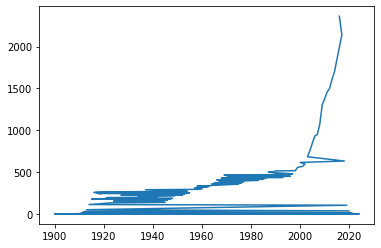

In [206]:
p.plot()
plt.show()

In [207]:
p.sort_index()

1900     2
1905     1
1906     1
1909     3
1910     5
        ..
2020    37
2021     8
2022     5
2023     1
2024     1
Name: year, Length: 119, dtype: int64

In [208]:
p = p.sort_index()

In [209]:
p

1900     2
1905     1
1906     1
1909     3
1910     5
        ..
2020    37
2021     8
2022     5
2023     1
2024     1
Name: year, Length: 119, dtype: int64

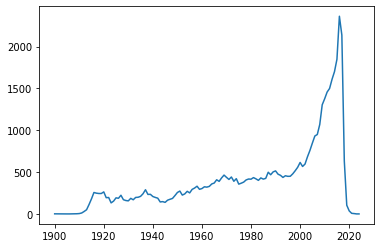

In [210]:
p.plot()
plt.show()

In [211]:
casts

title  year                        name     type  \
0                Closet Monster  2015                    Buffy #1    actor   
1               Suuri illusioni  1985                      Homo $    actor   
2           Battle of the Sexes  2017                     $hutter    actor   
3          Secret in Their Eyes  2015                     $hutter    actor   
4                    Steve Jobs  2015                     $hutter    actor   
...                         ...   ...                         ...      ...   
74996  Mia fora kai ena... moro  2011     Penelope Anastasopoulou  actress   
74997         The Magician King  2004       Tiannah Anastassiades  actress   
74998        Festival of Lights  2010             Zoe Anastassiou  actress   
74999                Toxic Tutu  2016             Zoe Anastassiou  actress   
75000           Fugitive Pieces  2007  Anastassia Anastassopoulou  actress   

                     character     n  
0                      Buffy 4  31.0  
1                       Guests  22.0  
2              Bobby Riggs Fan  10.0  
3              2002 Dodger Fan   0.0  
4      1988 Opera House Patron   0.0  
...                        ...   ...  
74996       Popi voulkanizater  11.0  
74997  Unicycle Race Attendant   0.0  
74998       Guidance Counselor  20.0  
74999        Demon of Toxicity   0.0  
75000             Laundry Girl  25.0  

[75001 rows x 6 columns]

### Groupby : 그룹화 할 수 있다.. (컬럼을 기준으로..)

In [213]:
cg = casts.groupby(['year']).size()

In [214]:
type(cg)

pandas.core.series.Series

In [215]:
cg

year
1912       3
1913      10
1914      61
1915      82
1916     116
        ... 
2017    2159
2018     158
2019      16
2020       4
2023       3
Length: 110, dtype: int64

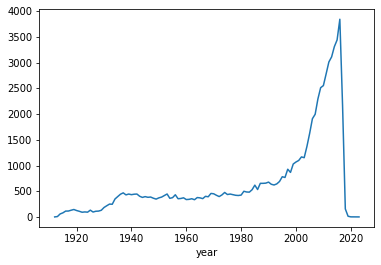

In [216]:
cg.plot()
plt.show()

In [217]:
cg = casts.groupby(['year'])

In [218]:
type(cg)

pandas.core.groupby.generic.DataFrameGroupBy

In [219]:
cg.n.max()

year
1912      6.0
1913     14.0
1914     39.0
1915     14.0
1916     35.0
        ...  
2017    620.0
2018     21.0
2019      6.0
2020      0.0
2023      0.0
Name: n, Length: 110, dtype: float64

In [220]:
cg.n.min()

year
1912    0.0
1913    0.0
1914    0.0
1915    0.0
1916    0.0
       ... 
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2023    0.0
Name: n, Length: 110, dtype: float64

# 배우 Aaron Abrams 출연한 영화를 다 구해보자..

In [221]:
cf = casts[ casts['name'] == 'Aaron Abrams' ]

In [222]:
cf

title  year          name   type  \
5765                         #FromJennifer  2017  Aaron Abrams  actor   
5766                    388 Arletta Avenue  2011  Aaron Abrams  actor   
5767                                Amelia  2009  Aaron Abrams  actor   
5768         At Home by Myself... with You  2009  Aaron Abrams  actor   
5769                        Cinderella Man  2005  Aaron Abrams  actor   
5770                        Closet Monster  2015  Aaron Abrams  actor   
5771                                Code 8  2018  Aaron Abrams  actor   
5772                         Firehouse Dog  2007  Aaron Abrams  actor   
5773                       Flash of Genius  2008  Aaron Abrams  actor   
5774                    It Was You Charlie  2013  Aaron Abrams  actor   
5775                    Jesus Henry Christ  2011  Aaron Abrams  actor   
5776                    Jesus Henry Christ  2011  Aaron Abrams  actor   
5777                            Regression  2015  Aaron Abrams  actor   
5778             Resident Evil: Apocalypse  2004  Aaron Abrams  actor   
5779                                 Sabah  2005  Aaron Abrams  actor   
5780                              Siblings  2004  Aaron Abrams  actor   
5781                       Take This Waltz  2011  Aaron Abrams  actor   
5782                         The Chicago 8  2011  Aaron Abrams  actor   
5783                        The Go-Getters  2017  Aaron Abrams  actor   
5784                           The In-Laws  2003  Aaron Abrams  actor   
5785  The Visual Bible: The Gospel of John  2003  Aaron Abrams  actor   
5786                  Young People Fucking  2007  Aaron Abrams  actor   
5787                                  Zoom  2006  Aaron Abrams  actor   

                   character     n  
5765          Ralph Sinclair   0.0  
5766                    Alex   4.0  
5767             Slim Gordon   8.0  
5768                     Guy   2.0  
5769                1928 Fan  67.0  
5770             Peter Madly   1.0  
5771                   Actor   0.0  
5772     Policeman at Bridge  32.0  
5773             Ian Meillor  44.0  
5774                     Tom   3.0  
5775           Malcolm's Dad  23.0  
5776           Nurse Stewart  23.0  
5777                 Farrell  12.0  
5778               Assistant  20.0  
5779               Paramedic   8.0  
5780                  Pastor   9.0  
5781                   Aaron  10.0  
5782              Lee Weiner   9.0  
5783                    Owen   1.0  
5784                 Student  17.0  
5785  Man in Temple Crowd #3   0.0  
5786                    Matt   1.0  
5787      Corporal Lipscombe   0.0

In [223]:
cf.shape

(23, 6)

In [224]:
len(cf)

23

In [225]:
cf.groupby( ['year'] ).size()

year
2003    2
2004    2
2005    2
2006    1
2007    2
2008    1
2009    2
2011    5
2013    1
2015    2
2017    2
2018    1
dtype: int64

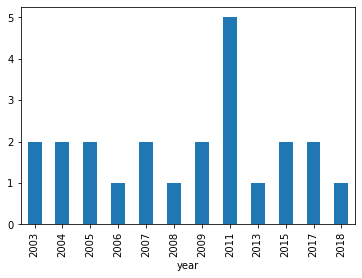

In [226]:
cf2 = cf.groupby( ['year'] ).size()
cf2.plot( kind = 'bar' )
plt.show()

In [227]:
cf

title  year          name   type  \
5765                         #FromJennifer  2017  Aaron Abrams  actor   
5766                    388 Arletta Avenue  2011  Aaron Abrams  actor   
5767                                Amelia  2009  Aaron Abrams  actor   
5768         At Home by Myself... with You  2009  Aaron Abrams  actor   
5769                        Cinderella Man  2005  Aaron Abrams  actor   
5770                        Closet Monster  2015  Aaron Abrams  actor   
5771                                Code 8  2018  Aaron Abrams  actor   
5772                         Firehouse Dog  2007  Aaron Abrams  actor   
5773                       Flash of Genius  2008  Aaron Abrams  actor   
5774                    It Was You Charlie  2013  Aaron Abrams  actor   
5775                    Jesus Henry Christ  2011  Aaron Abrams  actor   
5776                    Jesus Henry Christ  2011  Aaron Abrams  actor   
5777                            Regression  2015  Aaron Abrams  actor   
5778             Resident Evil: Apocalypse  2004  Aaron Abrams  actor   
5779                                 Sabah  2005  Aaron Abrams  actor   
5780                              Siblings  2004  Aaron Abrams  actor   
5781                       Take This Waltz  2011  Aaron Abrams  actor   
5782                         The Chicago 8  2011  Aaron Abrams  actor   
5783                        The Go-Getters  2017  Aaron Abrams  actor   
5784                           The In-Laws  2003  Aaron Abrams  actor   
5785  The Visual Bible: The Gospel of John  2003  Aaron Abrams  actor   
5786                  Young People Fucking  2007  Aaron Abrams  actor   
5787                                  Zoom  2006  Aaron Abrams  actor   

                   character     n  
5765          Ralph Sinclair   0.0  
5766                    Alex   4.0  
5767             Slim Gordon   8.0  
5768                     Guy   2.0  
5769                1928 Fan  67.0  
5770             Peter Madly   1.0  
5771                   Actor   0.0  
5772     Policeman at Bridge  32.0  
5773             Ian Meillor  44.0  
5774                     Tom   3.0  
5775           Malcolm's Dad  23.0  
5776           Nurse Stewart  23.0  
5777                 Farrell  12.0  
5778               Assistant  20.0  
5779               Paramedic   8.0  
5780                  Pastor   9.0  
5781                   Aaron  10.0  
5782              Lee Weiner   9.0  
5783                    Owen   1.0  
5784                 Student  17.0  
5785  Man in Temple Crowd #3   0.0  
5786                    Matt   1.0  
5787      Corporal Lipscombe   0.0

In [228]:
cf.groupby( ['year', 'title' ]).size()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
      Sabah                                   1
2006  Zoom                                    1
2007  Firehouse Dog                           1
      Young People Fucking                    1
2008  Flash of Genius                         1
2009  Amelia                                  1
      At Home by Myself... with You           1
2011  388 Arletta Avenue                      1
      Jesus Henry Christ                      2
      Take This Waltz                         1
      The Chicago 8                           1
2013  It Was You Charlie                      1
2015  Closet Monster                          1
      Regression                              1
2017  #FromJennifer                          